In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 网格搜索
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 用最佳模型预测
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# 重新计算误差
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"优化后测试集均方误差 (MSE): {mse_optimized:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  15.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.5s
[CV] END max_d

In [ ]:
# 初始化随机森林模型
rf_best_1 = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# 训练模型
rf_best_1.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_1 = rf_best_1.predict(X_test)

# 计算均方误差
mse_1 = mean_squared_error(y_test, y_pred_1)
print(f"测试集均方误差 (MSE): {mse_1:.4f}")


测试集均方误差 (MSE): 4.5652


In [ ]:
# 初始化随机森林模型
rf_best_2 = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# 训练模型
rf_best_2.fit(X_train_2, y_train_2)

# 在测试集上进行预测
y_pred_2 = rf_best_2.predict(X_test_2)

# 计算均方误差
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print(f"测试集均方误差 (MSE): {mse_2:.4f}")


测试集均方误差 (MSE): 4.9526


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.2s
[CV] END max_d

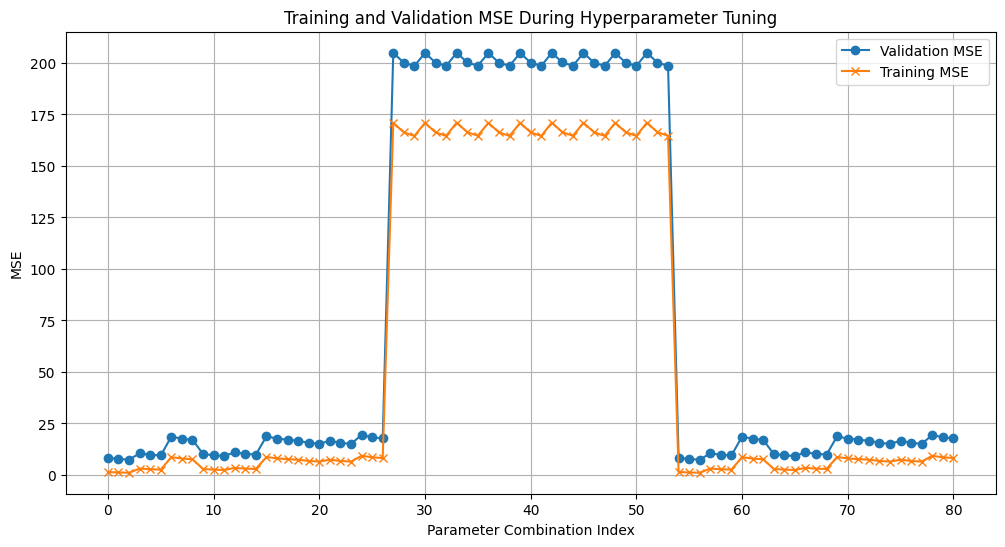

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    return_train_score=True  # 返回训练过程中的分数
)

# 开始训练
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 用最佳模型预测
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# 重新计算误差
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"优化后测试集均方误差 (MSE): {mse_optimized:.4f}")

# 提取训练和验证分数
results = pd.DataFrame(grid_search.cv_results_)

# 计算正的均方误差
results['mean_train_mse'] = -results['mean_train_score']
results['mean_test_mse'] = -results['mean_test_score']

# 显示训练和验证过程中的 MSE
print(results[['params', 'mean_train_mse', 'mean_test_mse']])

# 可视化
import matplotlib.pyplot as plt

# 绘制验证误差随参数变化的趋势
plt.figure(figsize=(12, 6))
plt.plot(results['mean_test_mse'], label='Validation MSE', marker='o')
plt.plot(results['mean_train_mse'], label='Training MSE', marker='x')
plt.xlabel('Parameter Combination Index')
plt.ylabel('MSE')
plt.title('Training and Validation MSE During Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 初始化随机森林
n_estimators_list = np.arange(1, 201, 10)  # 树的数量
mse_values = []

# 记录不同树数量的 MSE
for n_estimators in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-')
plt.title("MSE vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.grid()
plt.show()


NameError: name 'plt' is not defined

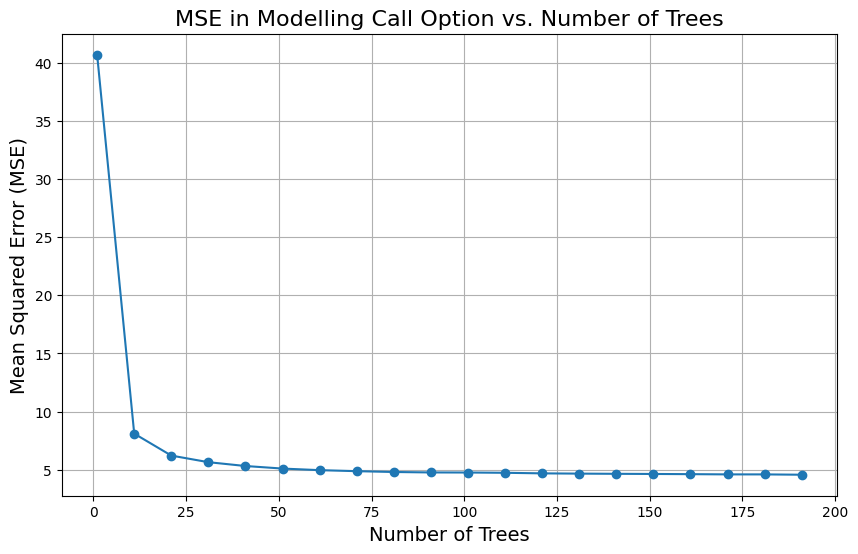

In [ ]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-')
plt.title("MSE in Modelling Call Option vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 网格搜索
grid_search_2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search_2.fit(X_train_2, y_train_2)

# 输出最佳参数
print("最佳参数: ", grid_search_2.best_params_)

# 用最佳模型预测
best_rf_2 = grid_search_2.best_estimator_
y_pred_optimized_2 = best_rf_2.predict(X_test_2)

# 重新计算误差
mse_optimized_2 = mean_squared_error(y_test_2, y_pred_optimized_2)
print(f"优化后测试集均方误差 (MSE): {mse_optimized_2:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.5s
[CV] END max_d

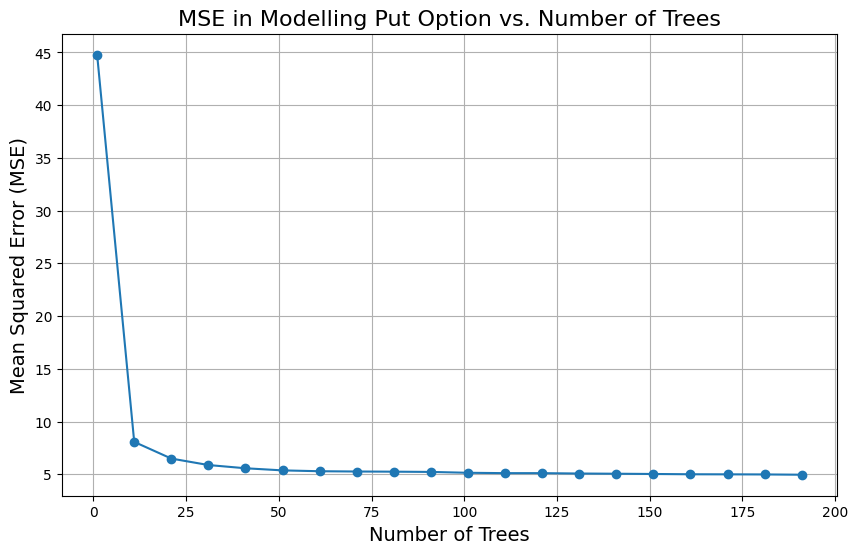

In [ ]:
# 初始化随机森林
n_estimators_list = np.arange(1, 201, 10)  # 树的数量
mse_values_2 = []

# 记录不同树数量的 MSE
for n_estimators in n_estimators_list:
    rf_2 = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_2.fit(X_train_2, y_train_2)
    y_pred_2 = rf_2.predict(X_test_2)
    mse_2 = mean_squared_error(y_test_2, y_pred_2)
    mse_values_2.append(mse_2)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values_2, marker='o', linestyle='-')
plt.title("MSE in Modelling Put Option vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.grid()
plt.show()


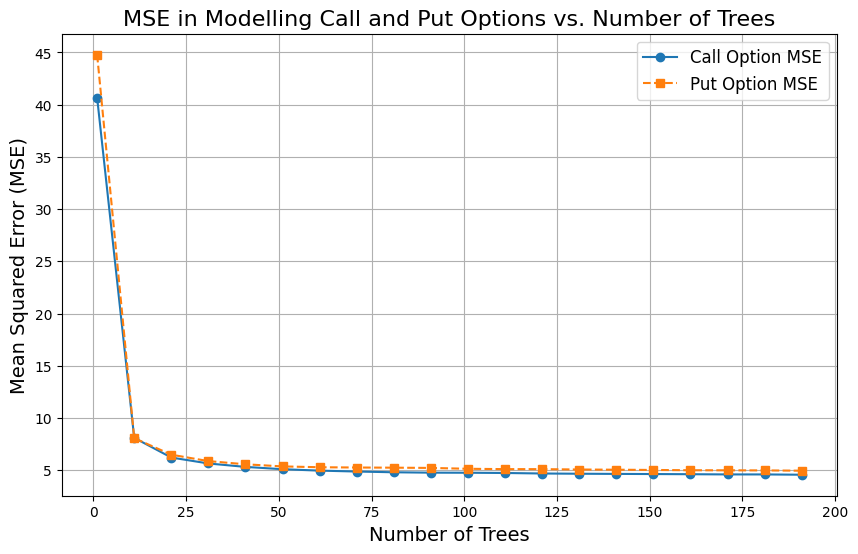

In [ ]:
import matplotlib.pyplot as plt

# 假设 n_estimators_list 是树的数量列表
# mse_values 是 Call 期权的 MSE，mse_values_2 是 Put 期权的 MSE

# 生成绘图
plt.figure(figsize=(10, 6))

# 绘制 Call 期权的 MSE 曲线
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-', label='Call Option MSE')

# 绘制 Put 期权的 MSE 曲线
plt.plot(n_estimators_list, mse_values_2, marker='s', linestyle='--', label='Put Option MSE')

# 设置图例
plt.legend(fontsize=12)

# 设置标题和坐标轴标签
plt.title("MSE in Modelling Call and Put Options vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)

# 网格和展示
plt.grid()
plt.show()


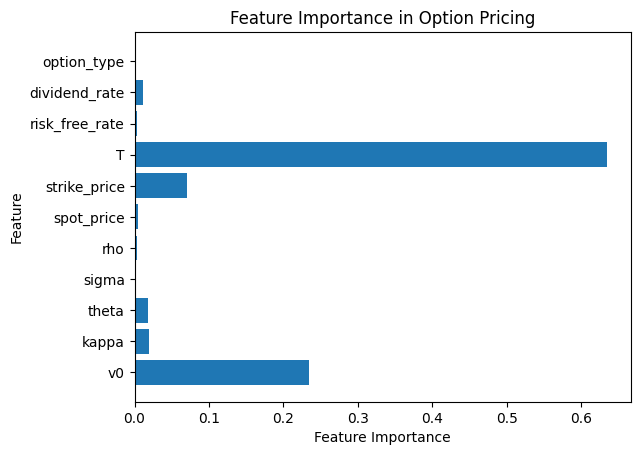

In [ ]:
import matplotlib.pyplot as plt

# 提取特征重要性
feature_importances = best_rf.feature_importances_
features = X.columns

# 可视化特征重要性
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Option Pricing")
plt.show()


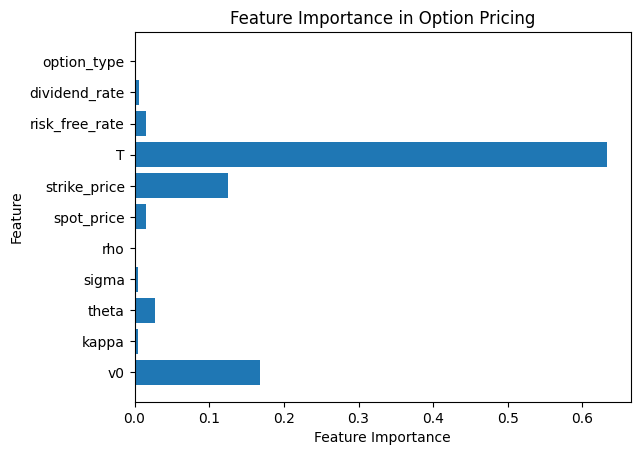

In [ ]:
import matplotlib.pyplot as plt

# 提取特征重要性
feature_importances = best_rf_2.feature_importances_
features = X_2.columns

# 可视化特征重要性
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Option Pricing")
plt.show()


In [ ]:
# 新数据示例
new_data = pd.DataFrame({
    'v0': [0.05],
    'kappa': [6.0],
    'theta': [0.7],
    'sigma': [0.4],
    'rho': [-0.5],
    'spot_price': [3900],
    'strike_price': [4000],
    'T': [30 / 365],
    'risk_free_rate': [0.04],
    'dividend_rate': [0.02],
    'option_type': [1]  # 看涨期权
})

# 标准化新数据
new_data_scaled = scaler.transform(new_data)

# 预测价格
predicted_price = best_rf.predict(new_data_scaled)
print(f"预测的期权价格: {predicted_price[0]:.2f}")


预测的期权价格: 228.72


In [ ]:
import time

# 新数据示例
new_data = pd.DataFrame({
    'v0': [0.05],
    'kappa': [6.0],
    'theta': [0.7],
    'sigma': [0.4],
    'rho': [-0.5],
    'spot_price': [3900],
    'strike_price': [4000],
    'T': [30 / 365],
    'risk_free_rate': [0.04],
    'dividend_rate': [0.02],
    'option_type': [1]  # 看涨期权
})

# 标准化新数据
new_data_scaled = scaler.transform(new_data)

# 开始计时
start_time = time.time()

# 预测价格
predicted_price = best_rf.predict(new_data_scaled)

# 结束计时
end_time = time.time()

# 打印结果
print(f"预测的期权价格: {predicted_price[0]:.2f}")
print(f"预测所用时间: {end_time - start_time:.6f} 秒")


NameError: name 'best_rf' is not defined

In [ ]:
# 新数据示例
new_data = pd.DataFrame({
    'v0': [0.05],
    'kappa': [6.0],
    'theta': [0.7],
    'sigma': [0.4],
    'rho': [-0.5],
    'spot_price': [3900],
    'strike_price': [3000],
    'T': [30 / 365],
    'risk_free_rate': [0.04],
    'dividend_rate': [0.02],
    'option_type': [0]  # 看跌期权
})

# 标准化新数据
new_data_scaled = scaler.transform(new_data)

# 预测价格
predicted_price = best_rf_2.predict(new_data_scaled)
print(f"预测的期权价格: {predicted_price[0]:.2f}")


预测的期权价格: 66.63


In [ ]:
# 查看数据结构
print(data.head())

# 提取需要的字段
S0 = data["UNDERLYING_LAST"].values[0]  # 当前标的资产价格
r = data["rf"].values[0]  # 无风险利率
q = data["div"].values[0]  # 股息收益率

# 筛选有效数据
market_prices = data["C_price"].values  # 市场欧式看涨期权价格
strikes = data["STRIKE"].values  # 执行价格
maturities = data["DTE"].values / 365  # 到期时间（以年为单位）

# 只选取非零价格和有效期限的数据
valid_indices = (market_prices > 0) & (maturities > 0)
market_prices = market_prices[valid_indices]
strikes = strikes[valid_indices]
maturities = maturities[valid_indices]

# 检查处理后的数据
print(f"有效市场价格数量: {len(market_prices)}")


   QUOTE_DATE EXPIRE_DATE  DTE  UNDERLYING_LAST  STRIKE  P_BID  P_ASK  \
0  2023-01-04  2023-01-04  0.0          3853.39  1000.0    0.0   0.05   
1  2023-01-04  2023-01-04  0.0          3853.39  1200.0    0.0   0.05   
2  2023-01-04  2023-01-04  0.0          3853.39  1400.0    0.0   0.05   
3  2023-01-04  2023-01-04  0.0          3853.39  1600.0    0.0   0.05   
4  2023-01-04  2023-01-04  0.0          3853.39  1800.0    0.0   0.05   

      P_IV   C_BID   C_ASK  C_IV  P_price  C_price     rf  Log-Strike     div  
0  8.17536  2846.8  2848.3   NaN    0.025  2847.55  0.042   -1.348953  0.0171  
1  7.06724  2646.8  2648.3   NaN    0.025  2647.55  0.042   -1.166632  0.0171  
2  6.13893  2427.6  2471.0   NaN    0.025  2449.30  0.042   -1.012481  0.0171  
3  5.33125  2246.8  2248.3   NaN    0.025  2247.55  0.042   -0.878950  0.0171  
4  4.61644  2046.8  2048.3   NaN    0.025  2047.55  0.042   -0.761167  0.0171  
有效市场价格数量: 1419592


In [ ]:
# 定义单次计算的函数
def compute_error(i, params, strikes, maturities, market_prices, S0, r, q):
    v0, theta, kappa, sigma, rho = params
    K = strikes[i]
    T = maturities[i]
    market_price = market_prices[i]

    # 定义 Heston 过程
    heston_process = ql.HestonProcess(
        ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), r, ql.Actual365Fixed())),
        ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), q, ql.Actual365Fixed())),
        ql.QuoteHandle(ql.SimpleQuote(S0)),
        v0, kappa, theta, sigma, rho
    )
    heston_model = ql.HestonModel(heston_process)
    heston_engine = ql.AnalyticHestonEngine(heston_model)

    # 定义欧式期权
    option = ql.VanillaOption(
        ql.PlainVanillaPayoff(ql.Option.Call, K),
        ql.EuropeanExercise(ql.Date().todaysDate() + int(T * 365))
    )
    option.setPricingEngine(heston_engine)

    # 计算理论价格
    model_price = option.NPV()

    # 返回单项误差平方
    return (market_price - model_price) ** 2

# 并行化误差函数
def calibration_loss(params, market_prices, strikes, maturities, S0, r, q):
    errors = Parallel(n_jobs=-1)(  # 使用所有可用的 CPU 核心
        delayed(compute_error)(i, params, strikes, maturities, market_prices, S0, r, q)
        for i in range(len(market_prices))
    )
    return sum(errors)



In [ ]:
# 取一小部分数据用于测试
subset_size = 1000  # 设置较小的规模
market_prices = market_prices[:subset_size]
strikes = strikes[:subset_size]
maturities = maturities[:subset_size]

# 初始参数
initial_params = [0.05, 0.2, 1.0, 0.3, -0.5]  # v0, theta, kappa, sigma, rho

def callback_function(xk):
    print("当前参数:", xk)

# 优化器设置
result = minimize(
    calibration_loss,
    initial_params,
    args=(market_prices, strikes, maturities, S0, r, q),
    method="L-BFGS-B",
    bounds=[(0.01, 1), (0.01, 1), (0.01, 3), (0.01, 1), (-0.99, 0.99)],
    options={"maxiter": 200, "ftol": 1e-4},  # 容忍误差设置为 1e-4
    callback=callback_function
)

# 输出结果
calibrated_params = result.x
print("校准后的 Heston 参数:", calibrated_params)


当前参数: [ 0.04380662  0.17058146  0.84671391  0.40838411 -0.26929669]
当前参数: [ 0.04273216  0.16677312  0.82682316  0.42245033 -0.23936371]
当前参数: [ 0.04270135  0.17303095  0.85924754  0.39952983 -0.2881849 ]
当前参数: [ 0.0418127   0.21296083  1.06577573  0.25356452 -0.59914766]
当前参数: [ 0.0410332   0.24737812  1.2400983   0.13080342 -0.86143801]
当前参数: [ 0.04084218  0.29539468  1.26914101  0.1494851  -0.90024301]
当前参数: [ 0.03810866  0.56781343  1.55810515  0.14525598 -0.99      ]
当前参数: [ 0.03778587  0.53010631  1.49255411  0.16846199 -0.99      ]
当前参数: [ 0.03470019  0.66205734  1.56487865  0.22628925 -0.99      ]
当前参数: [ 0.03053833  0.85801814  1.77388492  0.22209512 -0.99      ]
当前参数: [ 0.02911246  0.89371868  1.84515587  0.19156132 -0.99      ]
当前参数: [ 0.02876543  0.89739351  1.86682127  0.17563474 -0.99      ]
当前参数: [ 0.02866225  0.90329949  1.87068003  0.17767677 -0.99      ]
校准后的 Heston 参数: [ 0.02866225  0.90329949  1.87068003  0.17767677 -0.99      ]


In [ ]:
import numpy as np

# 校准后的 Heston 参数
v0, theta, kappa, sigma, rho = calibrated_params

# 市场参数
S0 = 100  # 标的资产初始价格
r = 0.03  # 无风险利率
q = 0.01  # 股息收益率

# 生成范围
strike_prices = np.linspace(80, 120, 100)  # 执行价格范围
maturities = np.linspace(0.25, 2, 100)  # 到期时间范围

# 保存结果
generated_data = []


In [ ]:
print("theta = %.4f, kappa = %.4f, sigma = %.4f, rho = %.4f, vO = %.4f" % (theta, kappa, sigma, rho, v0))

theta = 0.9033, kappa = 1.8707, sigma = 0.1777, rho = -0.9900, vO = 0.0287


In [ ]:
# 设置 Heston 模型
heston_process = ql.HestonProcess(
    ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), r, ql.Actual365Fixed())),
    ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), q, ql.Actual365Fixed())),
    ql.QuoteHandle(ql.SimpleQuote(S0)),
    v0, kappa, theta, sigma, rho
)
heston_model = ql.HestonModel(heston_process)
heston_engine = ql.AnalyticHestonEngine(heston_model, 64)

# 生成期权价格
for K in strike_prices:
    for T in maturities:
        # 定义欧式期权
        option = ql.VanillaOption(
            ql.PlainVanillaPayoff(ql.Option.Call, K),
            ql.EuropeanExercise(ql.Date().todaysDate() + int(T * 365))
        )
        option.setPricingEngine(heston_engine)

        # 计算价格
        price = option.NPV()

        # 保存数据
        generated_data.append({
            "S0": S0,
            "K": K,
            "T": T,
            "Price": price,
            "v0": v0,
            "theta": theta,
            "kappa": kappa,
            "sigma": sigma,
            "rho": rho
        })

# 转换为 DataFrame
df_generated = pd.DataFrame(generated_data)

# 查看生成的数据
print(df_generated.head())

# 保存为 CSV 文件
# df_generated.to_csv("generated_heston_data.csv", index=False)


    S0     K         T      Price        v0     theta    kappa     sigma   rho
0  100  80.0  0.250000  22.109928  0.028662  0.903299  1.87068  0.177677 -0.99
1  100  80.0  0.267677  22.411357  0.028662  0.903299  1.87068  0.177677 -0.99
2  100  80.0  0.285354  22.774386  0.028662  0.903299  1.87068  0.177677 -0.99
3  100  80.0  0.303030  23.093467  0.028662  0.903299  1.87068  0.177677 -0.99
4  100  80.0  0.320707  23.473070  0.028662  0.903299  1.87068  0.177677 -0.99


In [ ]:
df_generated

S0      K         T      Price        v0     theta    kappa     sigma  \
0     100   80.0  0.250000  22.109928  0.028662  0.903299  1.87068  0.177677   
1     100   80.0  0.267677  22.411357  0.028662  0.903299  1.87068  0.177677   
2     100   80.0  0.285354  22.774386  0.028662  0.903299  1.87068  0.177677   
3     100   80.0  0.303030  23.093467  0.028662  0.903299  1.87068  0.177677   
4     100   80.0  0.320707  23.473070  0.028662  0.903299  1.87068  0.177677   
...   ...    ...       ...        ...       ...       ...      ...       ...   
9995  100  120.0  1.929293  37.336221  0.028662  0.903299  1.87068  0.177677   
9996  100  120.0  1.946970  37.560723  0.028662  0.903299  1.87068  0.177677   
9997  100  120.0  1.964646  37.820686  0.028662  0.903299  1.87068  0.177677   
9998  100  120.0  1.982323  38.041855  0.028662  0.903299  1.87068  0.177677   
9999  100  120.0  2.000000  38.297975  0.028662  0.903299  1.87068  0.177677   

       rho  
0    -0.99  
1    -0.99  
2    -0.99  
3    -0.99  
4    -0.99  
...    ...  
9995 -0.99  
9996 -0.99  
9997 -0.99  
9998 -0.99  
9999 -0.99  

[10000 rows x 9 columns]

In [ ]:
from scipy.optimize import brentq

def calculate_implied_volatility(price, option_type, S0, strike, r, q, maturity):
    """
    计算隐含波动率 (Implied Volatility)

    参数：
        price: 期权市场价格
        option_type: 'Call' 或 'Put'
        S0: 标的资产当前价格
        strike: 执行价格
        r: 无风险利率
        q: 股息收益率
        maturity: 到期时间 (以年为单位)

    返回：
        隐含波动率 (如果无法求解，则返回 np.nan)
    """
    today = ql.Date().todaysDate()
    expiration_date = today + int(maturity * 365)

    # 设置期权
    option = ql.VanillaOption(
        ql.PlainVanillaPayoff(
            ql.Option.Call if option_type == 'Call' else ql.Option.Put,
            strike
        ),
        ql.EuropeanExercise(expiration_date)
    )

    # 定义目标函数
    def objective_function(sigma):
        bs_process = ql.BlackScholesMertonProcess(
            ql.QuoteHandle(ql.SimpleQuote(S0)),
            ql.YieldTermStructureHandle(ql.FlatForward(today, q, ql.Actual360())),
            ql.YieldTermStructureHandle(ql.FlatForward(today, r, ql.Actual360())),
            ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual360()))
        )
        engine = ql.AnalyticEuropeanEngine(bs_process)
        option.setPricingEngine(engine)
        return option.NPV() - price

    # 使用 scipy 的 brentq 方法求解
    try:
        # 假设波动率在 0% 到 500% 之间
        implied_vol = brentq(objective_function, 1e-8, 5.0, xtol=1e-8)
        return implied_vol
    except ValueError:
        return np.nan  # 如果求解失败，则返回 NaN


In [ ]:
# 计算隐含波动率
df_generated['ImpliedVolatility'] = df_generated.apply(
    lambda row: calculate_implied_volatility(
        row['Price'], 'Call', row['S0'], row['K'], 0.03, 0.01, row['T']
    ),
    axis=1
)

print(df_generated)


       S0      K         T      Price        v0     theta    kappa     sigma  \
0     100   80.0  0.250000  22.109928  0.028662  0.903299  1.87068  0.177677   
1     100   80.0  0.267677  22.411357  0.028662  0.903299  1.87068  0.177677   
2     100   80.0  0.285354  22.774386  0.028662  0.903299  1.87068  0.177677   
3     100   80.0  0.303030  23.093467  0.028662  0.903299  1.87068  0.177677   
4     100   80.0  0.320707  23.473070  0.028662  0.903299  1.87068  0.177677   
...   ...    ...       ...        ...       ...       ...      ...       ...   
9995  100  120.0  1.929293  37.336221  0.028662  0.903299  1.87068  0.177677   
9996  100  120.0  1.946970  37.560723  0.028662  0.903299  1.87068  0.177677   
9997  100  120.0  1.964646  37.820686  0.028662  0.903299  1.87068  0.177677   
9998  100  120.0  1.982323  38.041855  0.028662  0.903299  1.87068  0.177677   
9999  100  120.0  2.000000  38.297975  0.028662  0.903299  1.87068  0.177677   

       rho  ImpliedVolatility  
0    -0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 加载生成的数据
df = df_generated

# 定义特征和目标变量
features = ["S0", "K", "T", "v0", "theta", "kappa", "sigma", "rho", "ImpliedVolatility"]
target = "Price"

X = df[features]
y = df[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# 初始化随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 测试模型
y_pred = rf.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"测试集均方误差 (MSE): {mse}")


测试集均方误差 (MSE): 0.004101124059468845


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

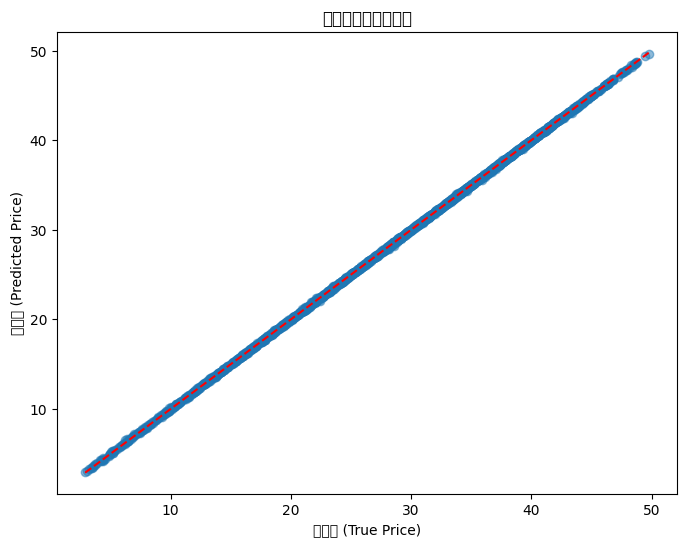

In [ ]:
import matplotlib.pyplot as plt

# 绘制真实值 vs 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("真实值 (True Price)")
plt.ylabel("预测值 (Predicted Price)")
plt.title("真实值与预测值对比")
plt.show()


In [ ]:
 !pip install QuantLib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 57.5 MB/s eta 0:00:00


# Data Filter and Selection

In [ ]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# TSLA American
# tsla_american_data = pd.read_parquet("tsla_clean_2016_to_2023_with_rf.pq")
# SPX European
european_data = pd.read_csv("clean_data2023.csv")

# 设置筛选条件
log_strike_min = np.log(0.9)
log_strike_max = np.log(1.1)
iv_min = 0.1
iv_max = 3.0
dte_min = 30

# 筛选 TSLA American 数据
# sampled_american_data = tsla_american_data[
#     (tsla_american_data['QUOTE_DATE'] >= '2023-01-04') &  # 日期筛选
#     (tsla_american_data['Log-Strike'] >= log_strike_min) &  # log_strike 筛选
#     (tsla_american_data['Log-Strike'] <= log_strike_max) &
#     (
#         ((tsla_american_data['P_IV'] > iv_min) & (tsla_american_data['P_IV'] <= iv_max)) &  # Put 波动率
#         ((tsla_american_data['C_IV'] > iv_min) & (tsla_american_data['C_IV'] <= iv_max))   # Call 波动率
#     ) &
#     (tsla_american_data['DTE'] > dte_min)  # 到期时间筛选
# ].copy()

# 筛选 European 数据
sampled_european_data = european_data[
    (european_data['Log-Strike'] >= log_strike_min) &  # log_strike 筛选
    (european_data['Log-Strike'] <= log_strike_max) &
    (
        ((european_data['P_IV'] > iv_min) & (european_data['P_IV'] <= iv_max))
    ) &
    (european_data['DTE'] > dte_min)  # 到期时间筛选
].copy()


In [ ]:
import QuantLib as ql
import numpy as np
import pandas as pd
from datetime import datetime

def preprocess_and_group_data(data, option_type):
    """
    Preprocess and group data by month, selecting the first available day of each month.
    Args:
        data (DataFrame): Input option data.
        option_type (str): "American" or "European".
    Returns:
        dict: Dictionary with month names as keys and DataFrame as values.
    """
    # Convert QUOTE_DATE to datetime
    data["QUOTE_DATE"] = pd.to_datetime(data["QUOTE_DATE"])

    # Extract year and month for grouping
    data["YEAR_MONTH"] = data["QUOTE_DATE"].dt.to_period("M")

    # Select the first day of each month
    grouped_data = (
        data.groupby("YEAR_MONTH", group_keys=False)
        .apply(lambda x: x.sort_values("QUOTE_DATE"))
    )

    # Create a dictionary to store monthly data
    grouped_dict = {}
    for period, month_data in grouped_data.groupby("YEAR_MONTH"):
        month_name = f"{period.year}-{period.month:02d}"
        grouped_dict[month_name] = month_data

    print(f"{option_type} Data Processed. Found {len(grouped_dict)} months.")
    return grouped_dict

# # Process TSLA American data
# american_grouped = preprocess_and_group_data(sampled_american_data, option_type="American")

# Process SPX European data
european_grouped = preprocess_and_group_data(sampled_european_data, option_type="European")

European Data Processed. Found 9 months.


In [ ]:
european_data

QUOTE_DATE EXPIRE_DATE      DTE  UNDERLYING_LAST   STRIKE   P_BID  \
0        2023-01-04  2023-01-04     0.00          3853.39   1000.0     0.0   
1        2023-01-04  2023-01-04     0.00          3853.39   1200.0     0.0   
2        2023-01-04  2023-01-04     0.00          3853.39   1400.0     0.0   
3        2023-01-04  2023-01-04     0.00          3853.39   1600.0     0.0   
4        2023-01-04  2023-01-04     0.00          3853.39   1800.0     0.0   
...             ...         ...      ...              ...      ...     ...   
1453005  2023-09-29  2028-12-15  1904.04          4286.60   8800.0  2880.7   
1453006  2023-09-29  2028-12-15  1904.04          4286.60   9200.0  3186.3   
1453007  2023-09-29  2028-12-15  1904.04          4286.60   9600.0  3494.7   
1453008  2023-09-29  2028-12-15  1904.04          4286.60  10000.0  3805.0   
1453009  2023-09-29  2028-12-15  1904.04          4286.60  12000.0  5369.4   

           P_ASK     P_IV   C_BID   C_ASK     C_IV   P_price  C_price  \
0           0.05  8.17536  2846.8  2848.3      NaN     0.025  2847.55   
1           0.05  7.06724  2646.8  2648.3      NaN     0.025  2647.55   
2           0.05  6.13893  2427.6  2471.0      NaN     0.025  2449.30   
3           0.05  5.33125  2246.8  2248.3      NaN     0.025  2247.55   
4           0.05  4.61644  2046.8  2048.3      NaN     0.025  2047.55   
...          ...      ...     ...     ...      ...       ...      ...   
1453005  3072.60      NaN     6.3    48.4  0.13139  2976.650    27.35   
1453006  3378.20      NaN     5.0    39.1  0.13457  3282.250    22.05   
1453007  3686.60      NaN     5.0    32.7  0.13909  3590.650    18.85   
1453008  3996.90      NaN     3.1    22.3  0.13708  3900.950    12.70   
1453009  5561.30      NaN     0.0    17.7  0.15954  5465.350     8.85   

               rf  Log-Strike     div  
0        0.042000   -1.348953  0.0171  
1        0.042000   -1.166632  0.0171  
2        0.042000   -1.012481  0.0171  
3        0.042000   -0.878950  0.0171  
4        0.042000   -0.761167  0.0171  
...           ...         ...     ...  
1453005  0.045752    0.480588  0.0156  
1453006  0.045752    0.525040  0.0156  
1453007  0.045752    0.567600  0.0156  
1453008  0.045752    0.608422  0.0156  
1453009  0.045752    0.790743  0.0156  

[1453010 rows x 16 columns]

In [ ]:
sampled_european_data.describe()

QUOTE_DATE            DTE  UNDERLYING_LAST  \
count                         277437  277437.000000    277437.000000   
mean   2023-05-14 05:42:02.713264896     135.858629      4209.070520   
min              2023-01-04 00:00:00      30.960000      3808.190000   
25%              2023-03-08 00:00:00      51.000000      4048.460000   
50%              2023-05-09 00:00:00      94.960000      4148.110000   
75%              2023-07-24 00:00:00     161.000000      4404.070000   
max              2023-09-29 00:00:00    2005.040000      4589.870000   
std                              NaN     148.631069       206.856205   

              STRIKE          P_BID          P_ASK           P_IV  \
count  277437.000000  277426.000000  277426.000000  277437.000000   
mean     4157.967286     128.165560     129.942949       0.172583   
min      3450.000000       0.000000       3.800000       0.100010   
25%      3975.000000      55.200000      55.900000       0.146850   
50%      4160.000000     105.000000     106.200000       0.172640   
75%      4335.000000     178.900000     181.100000       0.197900   
max      5200.000000     839.100000     865.500000       0.303470   
std       251.954098      96.569884      98.597200       0.034545   

               C_BID          C_ASK           C_IV        P_price  \
count  277426.000000  277426.000000  277437.000000  277426.000000   
mean      235.873152     239.498192       0.173317     129.054255   
min         0.000000       6.600000       0.100030       3.700000   
25%       127.000000     128.600000       0.151320      55.550000   
50%       224.800000     228.100000       0.173030     105.550000   
75%       337.100000     341.900000       0.195340     180.000000   
max       800.500000    1175.000000       0.317430     846.900000   
std       129.422303     132.130633       0.030955      97.567770   

             C_price             rf     Log-Strike            div  \
count  277426.000000  277437.000000  277437.000000  277437.000000   
mean      237.685672       0.051106      -0.031531       0.016415   
min         6.450000       0.033019      -0.105360       0.015300   
25%       127.800000       0.047770      -0.066105       0.015800   
50%       226.500000       0.051870      -0.031488       0.016600   
75%       339.500000       0.055005       0.001089       0.017000   
max       839.700000       0.060017       0.089923       0.017200   
std       130.737218       0.003979       0.041773       0.000645   

             DTE_bin  Log_Strike_bin  
count  275743.000000   277437.000000  
mean        0.535945        2.822709  
min         0.000000        0.000000  
25%         0.000000        1.000000  
50%         0.000000        3.000000  
75%         1.000000        4.000000  
max         8.000000        8.000000  
std         0.980823        1.877376

# Draw Voltaility Surface


In [ ]:
from logging import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def get_vol_surface(data):
    """
    Generate the volatility surface based on the given data.
    """
    # 动态设置 DTE 分箱范围
    dte_min = data["DTE"].min()
    dte_max = np.percentile(data["DTE"], 90)
    dte_bins = np.linspace(dte_min, dte_max, 10)  # DTE 分箱

    log_strike_min = data["Log-Strike"].min()
    log_strike_max = data["Log-Strike"].max()
    log_strike_bins = np.linspace(log_strike_min, log_strike_max, 10)  # Log-Strike 分箱

    # 添加分箱标签
    data["DTE_bin"] = pd.cut(data["DTE"], bins=dte_bins, labels=False)
    data["Log_Strike_bin"] = pd.cut(data["Log-Strike"], bins=log_strike_bins, labels=False)

    # 分组并计算均值
    grouped = data.groupby(["DTE_bin", "Log_Strike_bin"]).mean(numeric_only=True).reset_index()

    # 初始化波动率矩阵
    volatility_surface = np.zeros((len(dte_bins) - 1, len(log_strike_bins) - 1))

    # 填充波动率矩阵
    for _, row in grouped.iterrows():
        dte_idx = int(row["DTE_bin"])
        log_strike_idx = int(row["Log_Strike_bin"])
        volatility_surface[dte_idx, log_strike_idx] = row["P_IV"]

    return volatility_surface, dte_bins, log_strike_bins


def draw_volatility_surface(vol_surface, dte_bins, log_strike_bins):
    """
    Plot the volatility surface.
    """
    # 获取中心值
    dte_centers = (dte_bins[:-1] + dte_bins[1:]) / 2
    log_strike_centers = (log_strike_bins[:-1] + log_strike_bins[1:]) / 2
    X, Y = np.meshgrid(log_strike_centers, dte_centers)

    # 绘制 3D 图形
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X, Y, vol_surface, cmap="viridis", edgecolor="k")

    ax.set_xlabel("Log-Strike")
    ax.set_ylabel("DTE (Days to Expiration)")
    ax.set_zlabel("Implied Volatility")
    ax.set_title(f"Implied Volatility Surface")

    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()


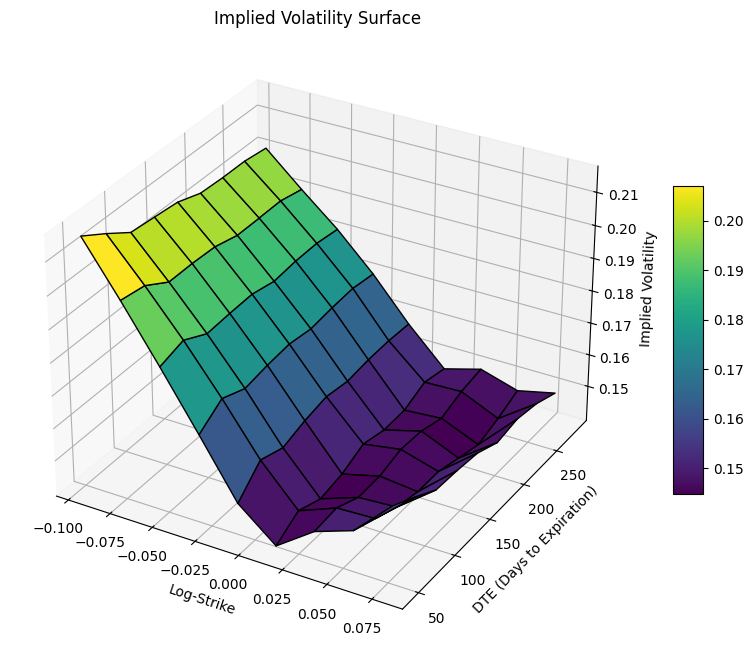

In [ ]:
vol_surface_eu, dte_bins, log_strike_bins = get_vol_surface(sampled_european_data)
draw_volatility_surface(vol_surface_eu, dte_bins, log_strike_bins)

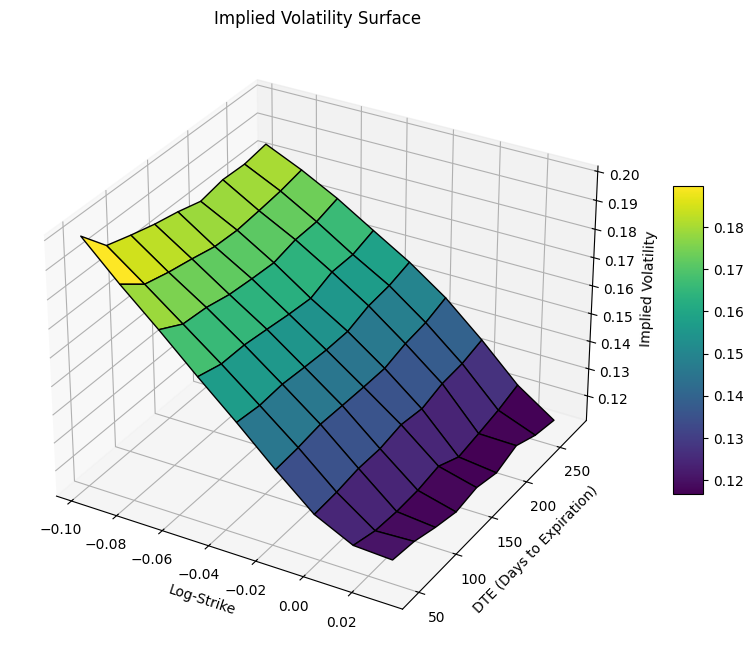

In [ ]:
vol_surface, dte_bins, log_strike_bins = get_vol_surface(european_grouped['2023-09'])
draw_volatility_surface(vol_surface, dte_bins, log_strike_bins)

# Heston Calibration

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution


def calibrate_heston_for_surface(vol_surface, dte_bins, log_strike_bins, spot_price, risk_free_rate, dividend, eu_or_am):
    """
    Calibrate Heston model using implied volatility surface with scipy.optimize.minimize.
    """
    print("Starting Heston model calibration for the surface...")

    # 配置利率和股息曲线
    calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
    day_count = ql.Actual365Fixed()
    risk_free_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), day_count)
    )
    dividend_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(dividend)), day_count)
    )
    print("Yield and dividend curves created.")

    # 定义目标函数
    def objective_function(params):
      v0, kappa, theta, sigma, rho = params

      # 初始化 Heston 模型
      heston_process = ql.HestonProcess(
          risk_free_curve,
          dividend_curve,
          ql.QuoteHandle(ql.SimpleQuote(spot_price)),
          v0, kappa, theta, sigma, rho
      )
      heston_model = ql.HestonModel(heston_process)
      engine = ql.AnalyticHestonEngine(heston_model) if eu_or_am == "EU" else ql.FdHestonVanillaEngine(heston_model)

      # 创建 GeneralizedBlackScholesProcess
      bs_process = ql.BlackScholesMertonProcess(
          ql.QuoteHandle(ql.SimpleQuote(spot_price)),
          dividend_curve,
          risk_free_curve,
          ql.BlackVolTermStructureHandle(ql.BlackConstantVol(0, calendar, sigma, day_count))
      )

      # 计算误差平方和
      error_sum = 0
      for i, dte in enumerate((dte_bins[:-1] + dte_bins[1:]) / 2):
          for j, log_strike in enumerate((log_strike_bins[:-1] + log_strike_bins[1:]) / 2):
              implied_vol = vol_surface[i, j]
              if np.isnan(implied_vol) or implied_vol <= 0 or implied_vol > 3:
                  continue  # 跳过无效数据

              strike = spot_price * np.exp(log_strike)
              maturity_days = int(dte)
              maturity_date = ql.Date().todaysDate() + ql.Period(maturity_days, ql.Days)

              # 定价期权并计算误差
              option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, strike),
                                        ql.EuropeanExercise(maturity_date))
              option.setPricingEngine(engine)

              try:
                  model_vol = option.impliedVolatility(implied_vol, bs_process)
                  error_sum += (model_vol - implied_vol) ** 2
              except RuntimeError:
                  continue  # 跳过无法定价的点

      return error_sum

    # 参数初始值和边界
    initial_guess = [0.02, 2.0, 0.02, 0.3, -0.2]
    bounds = [(0.0, 1.0),  # v0
              (0.1, 10.0),  # kappa
              (0.0, 1.0),  # theta
              (0.0, 2.0),  # sigma
              (-1.0, 0.0)]  # rho

    # 使用 scipy.optimize.minimize 进行优化
    result = differential_evolution(objective_function, bounds=bounds)

    # 提取校准参数
    calibrated_params = {
        "v0": result.x[0],
        "kappa": result.x[1],
        "theta": result.x[2],
        "sigma": result.x[3],
        "rho": result.x[4],
        "rf": risk_free_rate,
        "div": dividend,
        "spot": spot_price,
        "dte_bins": dte_bins,
        "log_strike_bins": log_strike_bins
    }

    print("Calibration completed.")
    print(f"Calibrated parameters: {calibrated_params}")
    return calibrated_params


# Define a function to calibrate Heston model for all months
def calibrate_all_months(grouped_data, eu_or_am):
    calibration_results = {}
    for month, month_data in grouped_data.items():
        print(f"Calibrating {eu_or_am} model for {month}...")
        vol_surface, dte_bins, log_strike_bins = get_vol_surface(month_data)
        spot_price = month_data["UNDERLYING_LAST"].iloc[0]
        risk_free_rate = month_data["rf"].iloc[0]
        if eu_or_am == "EU":
          dividend = month_data["div"].iloc[0]
        if eu_or_am == "AM":
          dividend = 0.02
        calibrated_params = calibrate_heston_for_surface(vol_surface, dte_bins, log_strike_bins,
                                spot_price, risk_free_rate, dividend, eu_or_am)
        calibration_results[month] = calibrated_params

    return calibration_results

In [ ]:
# Use all data to calibrate
vol_surface_eu, dte_bins, log_strike_bins = get_vol_surface(sampled_european_data)
spot_price = sampled_european_data["UNDERLYING_LAST"].iloc[0]
risk_free_rate = sampled_european_data["rf"].iloc[0]
dividend = sampled_european_data["div"].iloc[0]

a = calibrate_heston_for_surface(vol_surface_eu, dte_bins, log_strike_bins, spot_price, risk_free_rate, dividend, eu_or_am ='EU')
a

Starting Heston model calibration for the surface...
Yield and dividend curves created.
Calibration completed.
Calibrated parameters: {'v0': 0.5810954552454857, 'kappa': 7.439038020394664, 'theta': 0.21033060668265507, 'sigma': 1.4118786138107686, 'rho': -0.8057088317051799, 'rf': 0.0422199999999999, 'div': 0.0171, 'spot': 3853.39, 'dte_bins': array([ 30.96      ,  60.19111111,  89.42222222, 118.65333333,
       147.88444444, 177.11555556, 206.34666667, 235.57777778,
       264.80888889, 294.04      ]), 'log_strike_bins': array([-0.10535967, -0.0836616 , -0.06196352, -0.04026545, -0.01856737,
        0.0031307 ,  0.02482878,  0.04652685,  0.06822492,  0.089923  ])}


{'v0': 0.5810954552454857,
 'kappa': 7.439038020394664,
 'theta': 0.21033060668265507,
 'sigma': 1.4118786138107686,
 'rho': -0.8057088317051799,
 'rf': 0.0422199999999999,
 'div': 0.0171,
 'spot': 3853.39,
 'dte_bins': array([ 30.96      ,  60.19111111,  89.42222222, 118.65333333,
        147.88444444, 177.11555556, 206.34666667, 235.57777778,
        264.80888889, 294.04      ]),
 'log_strike_bins': array([-0.10535967, -0.0836616 , -0.06196352, -0.04026545, -0.01856737,
         0.0031307 ,  0.02482878,  0.04652685,  0.06822492,  0.089923  ])}

In [ ]:
# Calibrate by month
heston_paras_eu = calibrate_all_months(european_grouped, eu_or_am = "EU")

Calibrating EU model for 2023-01...
Starting Heston model calibration for the surface...
Yield and dividend curves created.
Calibration completed.
Calibrated parameters: {'v0': 0.057660738086210084, 'kappa': 6.1845834654771705, 'theta': 0.7405546826563274, 'sigma': 0.05835243491152253, 'rho': -0.4666615530783236, 'rf': 0.0422199999999999, 'div': 0.0171, 'spot': 3853.39, 'dte_bins': array([ 31.        ,  64.22222222,  97.44444444, 130.66666667,
       163.88888889, 197.11111111, 230.33333333, 263.55555556,
       296.77777778, 330.        ]), 'log_strike_bins': array([-0.10535608, -0.0836584 , -0.06196073, -0.04026305, -0.01856538,
        0.0031323 ,  0.02482997,  0.04652765,  0.06822532,  0.089923  ])}
Calibrating EU model for 2023-02...
Starting Heston model calibration for the surface...
Yield and dividend curves created.
Calibration completed.
Calibrated parameters: {'v0': 0.11609473383895796, 'kappa': 7.471859502718912, 'theta': 0.6717183081008156, 'sigma': 0.3991794309632497, 'rh

# Data Generation by Heston

In [ ]:
import numpy as np


heston_paras_eu = {'2023-01': {'v0': 0.5112786501920784,
  'kappa': 5.205080369114581,
  'theta': 0.8693778219773991,
  'sigma': 0.3494381296477418,
  'rho': -0.7127687869696401,
  'rf': 0.0422199999999999,
  'div': 0.0171,
  'spot': 3853.39,
  'dte_bins': np.array([ 31.        ,  64.22222222,  97.44444444, 130.66666667,
         163.88888889, 197.11111111, 230.33333333, 263.55555556,
         296.77777778, 330.        ]),
  'log_strike_bins': np.array([-0.10535608, -0.0836584 , -0.06196073, -0.04026305, -0.01856538,
          0.0031323 ,  0.02482997,  0.04652765,  0.06822532,  0.089923  ])},
 '2023-02': {'v0': 0.737071449956831,
  'kappa': 8.968249468551038,
  'theta': 0.36076152213323587,
  'sigma': 0.6708230315690908,
  'rho': -0.9824561997727077,
  'rf': 0.0459399999999999,
  'div': 0.017,
  'spot': 4119.88,
  'dte_bins': np.array([ 30.96      ,  61.08666667,  91.21333333, 121.34      ,
         151.46666667, 181.59333333, 211.72      , 241.84666667,
         271.97333333, 302.1       ]),
  'log_strike_bins': np.array([-0.10535708, -0.08650522, -0.06765336, -0.04880149, -0.02994963,
         -0.01109776,  0.0077541 ,  0.02660596,  0.04545783,  0.06430969])},
 '2023-03': {'v0': 0.5949577967979858,
  'kappa': 3.7151593468780213,
  'theta': 0.44252314026686473,
  'sigma': 0.4814253605140465,
  'rho': -0.4735856400730245,
  'rf': 0.04695,
  'div': 0.0166,
  'spot': 3952.01,
  'dte_bins': np.array([ 30.96      ,  58.96888889,  86.97777778, 114.98666667,
         142.99555556, 171.00444444, 199.01333333, 227.02222222,
         255.03111111, 283.04      ]),
  'log_strike_bins': np.array([-0.105356  , -0.08445106, -0.06354611, -0.04264117, -0.02173622,
         -0.00083127,  0.02007367,  0.04097862,  0.06188356,  0.08278851])},
 '2023-04': {'v0': 0.053356968677561345,
  'kappa': 3.404383217683533,
  'theta': 0.6278055651870587,
  'sigma': 1.5951255926386263,
  'rho': -0.4262941455866316,
  'rf': 0.04706,
  'div': 0.0172,
  'spot': 4123.95,
  'dte_bins': np.array([ 31.  ,  60.56,  90.12, 119.68, 149.24, 178.8 , 208.36, 237.92,
         267.48, 297.04]),
  'log_strike_bins': np.array([-0.10535575, -0.08707415, -0.06879256, -0.05051096, -0.03222936,
         -0.01394777,  0.00433383,  0.02261543,  0.04089703,  0.05917862])},
 '2023-05': {'v0': 0.8937222490647451,
  'kappa': 8.666379365518347,
  'theta': 0.012227082798875077,
  'sigma': 1.965144325815373,
  'rho': -0.9621985243322229,
  'rf': 0.0453533333333333,
  'div': 0.0166,
  'spot': 4167.33,
  'dte_bins': np.array([ 31.        ,  59.77777778,  88.55555556, 117.33333333,
         146.11111111, 174.88888889, 203.66666667, 232.44444444,
         261.22222222, 290.        ]),
  'log_strike_bins': np.array([-0.10535365, -0.08667552, -0.06799739, -0.04931926, -0.03064112,
         -0.01196299,  0.00671514,  0.02539327,  0.0440714 ,  0.06274953])},
 '2023-06': {'v0': 0.9168984541052656,
  'kappa': 7.343068670859061,
  'theta': 0.6843062044989234,
  'sigma': 0.24618339394798217,
  'rho': -0.12903603915360073,
  'rf': 0.0530599999999999,
  'div': 0.0165,
  'spot': 4221.32,
  'dte_bins': np.array([ 31.        ,  58.66666667,  86.33333333, 114.        ,
         141.66666667, 169.33333333, 197.        , 224.66666667,
         252.33333333, 280.        ]),
  'log_strike_bins': np.array([-0.10535874, -0.09009713, -0.07483553, -0.05957393, -0.04431232,
         -0.02905072, -0.01378912,  0.00147248,  0.01673409,  0.03199569])},
 '2023-07': {'v0': 0.7294116201278877,
  'kappa': 5.429711829313144,
  'theta': 0.6629496388269693,
  'sigma': 1.7502360784796018,
  'rho': -0.7635791839910442,
  'rf': 0.0527433333333333,
  'div': 0.0158,
  'spot': 4455.59,
  'dte_bins': np.array([ 31.        ,  61.33333333,  91.66666667, 122.        ,
         152.33333333, 182.66666667, 213.        , 243.33333333,
         273.66666667, 304.        ]),
  'log_strike_bins': np.array([-0.10534835, -0.09105339, -0.07675842, -0.06246346, -0.04816849,
         -0.03387353, -0.01957856, -0.0052836 ,  0.00901137,  0.02330633])},
 '2023-08': {'v0': 0.7099653682261028,
  'kappa': 2.9535560396423497,
  'theta': 0.5185274984631361,
  'sigma': 0.9738327824931627,
  'rho': -0.2486829696345788,
  'rf': 0.0549166666666666,
  'div': 0.0153,
  'spot': 4576.94,
  'dte_bins': np.array([ 31.        ,  59.44444444,  87.88888889, 116.33333333,
         144.77777778, 173.22222222, 201.66666667, 230.11111111,
         258.55555556, 287.        ]),
  'log_strike_bins': np.array([-0.10535967, -0.08962384, -0.073888  , -0.05815217, -0.04241634,
         -0.0266805 , -0.01094467,  0.00479116,  0.020527  ,  0.03626283])},
 '2023-09': {'v0': 0.28261933762552294,
  'kappa': 0.18882926901921593,
  'theta': 0.2725999780425667,
  'sigma': 1.2144271262741295,
  'rho': -0.5631953225242101,
  'rf': 0.0551133333333332,
  'div': 0.0156,
  'spot': 4516.02,
  'dte_bins': np.array([ 31.        ,  59.55555556,  88.11111111, 116.66666667,
         145.22222222, 173.77777778, 202.33333333, 230.88888889,
         259.44444444, 288.        ]),
  'log_strike_bins': np.array([-0.10534898, -0.08927368, -0.07319839, -0.0571231 , -0.0410478 ,
         -0.02497251, -0.00889721,  0.00717808,  0.02325337,  0.03932867])}}

heston_paras_eu = pd.DataFrame(heston_paras_eu)
# Display the DataFrame
heston_paras_eu.reset_index(inplace=True)
heston_paras_eu.rename(columns={"index": "Month"}, inplace=True)
heston_paras_eu

Month                                            2023-01  \
0               v0                                           0.511279   
1            kappa                                            5.20508   
2            theta                                           0.869378   
3            sigma                                           0.349438   
4              rho                                          -0.712769   
5               rf                                            0.04222   
6              div                                             0.0171   
7             spot                                            3853.39   
8         dte_bins  [31.0, 64.22222222, 97.44444444, 130.66666667,...   
9  log_strike_bins  [-0.10535608, -0.0836584, -0.06196073, -0.0402...   

                                             2023-02  \
0                                           0.737071   
1                                           8.968249   
2                                           0.360762   
3                                           0.670823   
4                                          -0.982456   
5                                            0.04594   
6                                              0.017   
7                                            4119.88   
8  [30.96, 61.08666667, 91.21333333, 121.34, 151....   
9  [-0.10535708, -0.08650522, -0.06765336, -0.048...   

                                             2023-03  \
0                                           0.594958   
1                                           3.715159   
2                                           0.442523   
3                                           0.481425   
4                                          -0.473586   
5                                            0.04695   
6                                             0.0166   
7                                            3952.01   
8  [30.96, 58.96888889, 86.97777778, 114.98666667...   
9  [-0.105356, -0.08445106, -0.06354611, -0.04264...   

                                             2023-04  \
0                                           0.053357   
1                                           3.404383   
2                                           0.627806   
3                                           1.595126   
4                                          -0.426294   
5                                            0.04706   
6                                             0.0172   
7                                            4123.95   
8  [31.0, 60.56, 90.12, 119.68, 149.24, 178.8, 20...   
9  [-0.10535575, -0.08707415, -0.06879256, -0.050...   

                                             2023-05  \
0                                           0.893722   
1                                           8.666379   
2                                           0.012227   
3                                           1.965144   
4                                          -0.962199   
5                                           0.045353   
6                                             0.0166   
7                                            4167.33   
8  [31.0, 59.77777778, 88.55555556, 117.33333333,...   
9  [-0.10535365, -0.08667552, -0.06799739, -0.049...   

                                             2023-06  \
0                                           0.916898   
1                                           7.343069   
2                                           0.684306   
3                                           0.246183   
4                                          -0.129036   
5                                            0.05306   
6                                             0.0165   
7                                            4221.32   
8  [31.0, 58.66666667, 86.33333333, 114.0, 141.66...   
9  [-0.10535874, -0.09009713, -0.07483553, -0.059...   

                                             2023-07  \
0                                           0.729412   
1           

In [ ]:
import QuantLib as ql


def generate_heston_option(
    num_samples, heston_params, dte_bins, log_strike_bins, range_factor=0.5, option_type=ql.Option.Call
):
    """
    使用 Heston 模型生成期权定价训练数据，参数在范围内随机取样。

    :param num_samples: 样本数量
    :param heston_params: Heston 最优参数 (v0, kappa, theta, sigma, rho, rf, div, spot)
    :param range_factor: 参数范围控制因子（比例或绝对偏差）
    :param dte_bins: 到期时间范围，格式为 [min_dte, max_dte]
    :param log_strike_bins: 对数行权价范围，格式为 [min_log_strike, max_log_strike]
    :param option_type: 期权类型，ql.Option.Call 或 ql.Option.Put
    :return: 包含样本数据的 Pandas DataFrame
    """
    data = []
    # 获取 Heston 参数
    v0_opt, kappa_opt, theta_opt, sigma_opt, rho_opt, rf_opt, div_opt, spot_opt = heston_params

    # 定义随机范围
    v0_range = [v0_opt * (1 - range_factor), v0_opt * (1 + range_factor)]
    kappa_range = [kappa_opt * (1 - range_factor), kappa_opt * (1 + range_factor)]
    theta_range = [theta_opt * (1 - range_factor), theta_opt * (1 + range_factor)]
    sigma_range = [sigma_opt * (1 - range_factor), sigma_opt * (1 + range_factor)]
    rho_range = [max(-1, rho_opt - range_factor), min(1, rho_opt + range_factor)]  # 确保范围在 [-1, 1]

    # 配置 Heston 过程
    calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
    day_count = ql.Actual365Fixed()
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_opt))
    risk_free_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(rf_opt)), day_count)
    )
    dividend_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(div_opt)), day_count)
    )

    for _ in range(num_samples):
        # 在范围内随机采样参数
        v0 = np.random.uniform(*v0_range)
        kappa = np.random.uniform(*kappa_range)
        theta = np.random.uniform(*theta_range)
        sigma = np.random.uniform(*sigma_range)
        rho = np.random.uniform(*rho_range)

        # 随机采样到期时间和对数行权价
        maturity_days = np.random.randint(dte_bins[0], dte_bins[-1])
        log_strike = np.random.uniform(log_strike_bins[0], log_strike_bins[-1])
        strike_price = spot_opt * np.exp(log_strike)

        # 配置 Heston 模型
        heston_process = ql.HestonProcess(
            risk_free_curve,
            dividend_curve,
            spot_handle,
            v0, kappa, theta, sigma, rho
        )
        heston_model = ql.HestonModel(heston_process)
        engine = ql.AnalyticHestonEngine(heston_model)

        # 设置期权参数并定价
        maturity_date = ql.Date.todaysDate() + ql.Period(maturity_days, ql.Days)
        payoff = ql.PlainVanillaPayoff(option_type, strike_price)
        exercise = ql.EuropeanExercise(maturity_date)
        option = ql.VanillaOption(payoff, exercise)
        option.setPricingEngine(engine)

        try:
            price = option.NPV()
            if price > 0:  # 确保价格有效
                data.append([v0, kappa, theta, sigma, rho, spot_opt, strike_price,
                             maturity_days, rf_opt, div_opt, price,
                             "call" if option_type == ql.Option.Call else "put"])
        except RuntimeError:
            continue  # 跳过无法定价的样本

    # 返回 DataFrame
    return pd.DataFrame(data, columns=[
        "v0", "kappa", "theta", "sigma", "rho", "spot_price", "strike_price",
        "maturity_days", "risk_free_rate", "dividend_rate", "price", "option_type"
    ])



def generate_heston_option_monthly(num_samples, params):
    """
    使用 Heston 模型每月参数生成期权定价训练数据。

    :param num_samples: 每月生成的样本数量
    :param params: 每月的 Heston 参数
    :return: 包含所有月份数据的 Pandas DataFrame
    """
    all_put = []
    all_call = []

    for month, param in params.items():
        print(f"Generating option data for {month}...")
        heston_params = [
            param['v0'], param['kappa'], param['theta'], param['sigma'], param['rho'],
            param['rf'], param['div'], param['spot']
        ]
        dte_bins = param['dte_bins']
        log_strike_bins = param['log_strike_bins']

        # 为当前月份生成看涨期权数据
        df_call = generate_heston_option(num_samples, heston_params, dte_bins, log_strike_bins, option_type=ql.Option.Call)
        df_call['month'] = month

        # 为当前月份生成看跌期权数据
        df_put = generate_heston_option(num_samples, heston_params, dte_bins, log_strike_bins, option_type=ql.Option.Put)
        df_put['month'] = month

        # 合并看涨和看跌期权数据
        all_put.append(df_put)
        all_call.append(df_call)

    # 合并所有月份的数据
    return pd.concat(all_call, ignore_index=True), pd.concat(all_put, ignore_index=True)


# 示例调用
num_samples = 10000  # 每月生成10000个样本
call_data, put_data = generate_heston_option_monthly(num_samples, heston_paras_eu)
call_data.to_csv("heston_data_with_call.csv", index=False)
put_data.to_csv("heston_data_with_put.csv", index=False)


Generating option data for 2023-01...
Generating option data for 2023-02...
Generating option data for 2023-03...
Generating option data for 2023-04...
Generating option data for 2023-05...
Generating option data for 2023-06...
Generating option data for 2023-07...
Generating option data for 2023-08...
Generating option data for 2023-09...


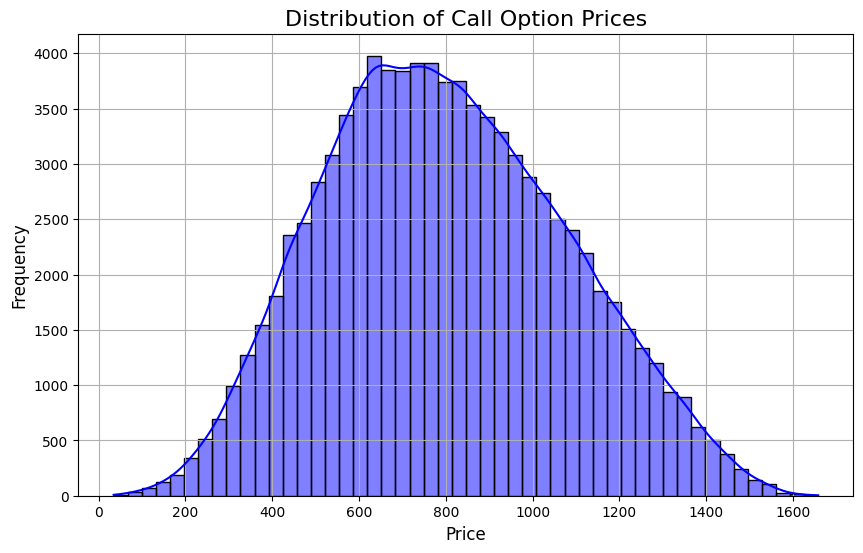

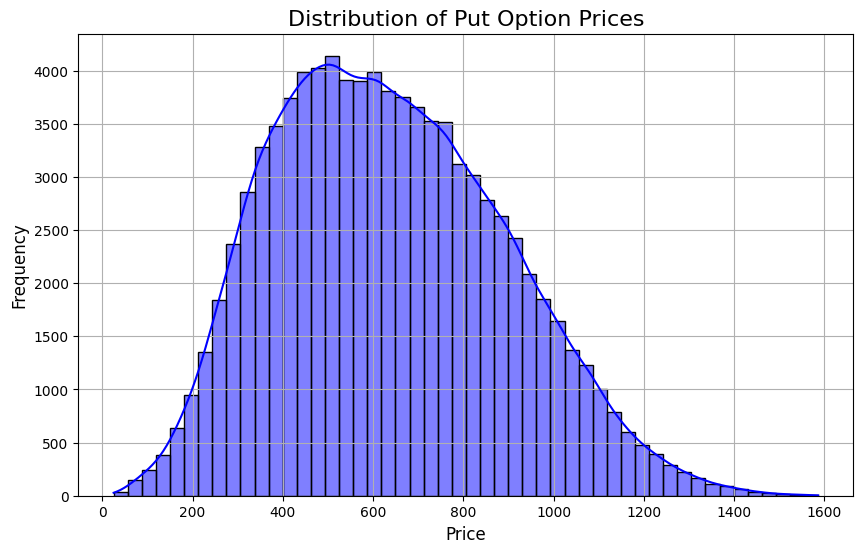

<ipython-input-9-a2cc8c122d65>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='price', data=put_data, palette='Set3')


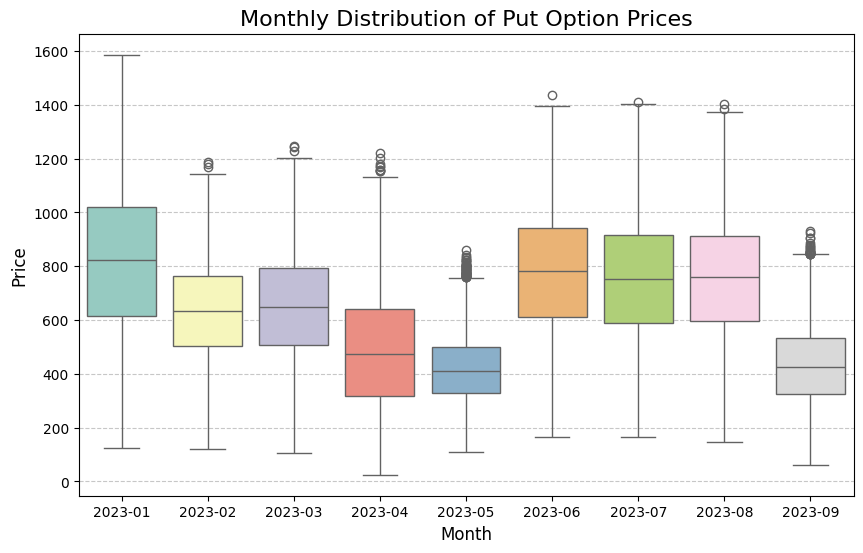

<ipython-input-9-a2cc8c122d65>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='price', data=call_data, palette='Set3')


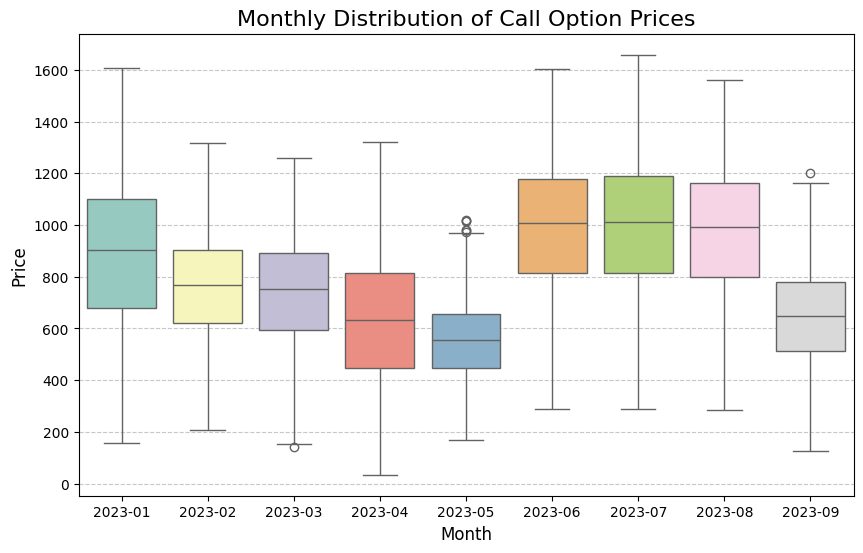

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. 绘制 price 分布图
plt.figure(figsize=(10, 6))
sns.histplot(call_data['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of Call Option Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(put_data['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of Put Option Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# 2. 按月份绘制 price 的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=put_data, palette='Set3')
plt.title('Monthly Distribution of Put Option Prices', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=call_data, palette='Set3')
plt.title('Monthly Distribution of Call Option Prices', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


# MNN Model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, TensorDataset
from torch.optim.lr_scheduler import ExponentialLR
from sklearn.preprocessing import StandardScaler


# 定义 MNN 模型
class MNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MNN, self).__init__()
        self.network = nn.Sequential(
          nn.Linear(input_size, hidden_size),
          nn.LeakyReLU(negative_slope=0.5),
          nn.Linear(hidden_size, hidden_size),
          nn.LeakyReLU(negative_slope=0.5),
          nn.Linear(hidden_size, hidden_size),
          nn.LeakyReLU(negative_slope=0.5),
          nn.Linear(hidden_size, output_size)
      )
    def forward(self, x):
        return self.network(x)


In [ ]:
import matplotlib.pyplot as plt

# 修改 train_mnn_model 函数以返回训练和验证损失记录
def train_mnn_model_with_loss(X, y, hidden_size, output_size, lr=0.001, epochs=20, batch_size=64, validation_split=0.2, patience=1000):
    """
    训练 MNN 模型并返回训练和验证损失记录。
    """
    # 划分训练集和验证集
    dataset = TensorDataset(X, y)
    train_size = int((1 - validation_split) * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # 转换为 DataLoader
    train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

    # 提取数据并进行标准化
    train_X, train_y = next(iter(train_loader))
    val_X, val_y = next(iter(val_loader))
    scaler_X = StandardScaler().fit(train_X)
    train_X = torch.tensor(scaler_X.transform(train_X), dtype=torch.float32)
    val_X = torch.tensor(scaler_X.transform(val_X), dtype=torch.float32)
    # scaler_y = StandardScaler().fit(train_y)
    # train_y = torch.tensor(scaler_y.transform(train_y), dtype=torch.float32)
    # val_y = torch.tensor(scaler_y.transform(val_y), dtype=torch.float32)

    # 初始化模型
    input_size = X.shape[1]
    model = MNN(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    #scheduler = ExponentialLR(optimizer, gamma=0.997)

    # Early Stopping 初始化
    best_val_loss = float("inf")
    patience_counter = 0

    # 用于记录损失的列表
    train_losses = []
    val_losses = []

    # 训练模型
    for epoch in range(epochs):
        # 训练阶段
        model.train()
        optimizer.zero_grad()
        predictions = model(train_X)
        loss = criterion(predictions, train_y)
        loss.backward()

        # for name, param in model.named_parameters():
        #   if param.grad is not None:
        #       print(f"{name}: grad mean={param.grad.mean().item():.6f}, grad norm={param.grad.norm().item():.6f}")
        #   else:
        #       print(f"{name}: grad=None")  # 有些层可能没有梯度

        optimizer.step()
        train_loss = loss.item()
        train_losses.append(train_loss)

        # 验证阶段
        model.eval()
        with torch.no_grad():
            predictions = model(val_X)
            val_loss = criterion(predictions, val_y).item()
            val_losses.append(val_loss)

        # 打印日志
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # 早停检查
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_mnn_model.pth")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered. Stopping training.")
                break

    print("Training completed.")
    print(f"Best Validation Loss: {best_val_loss:.4f}")
    return model, scaler_X, train_losses, val_losses #scaler_y


In [ ]:
import pandas as pd
import torch

# 加载数据
put_data = pd.read_csv("heston_data_with_put.csv")
call_data = pd.read_csv("heston_data_with_call.csv")

# 提取特征和目标
X_put = torch.tensor(put_data.iloc[:, 0:8].values, dtype=torch.float32)
y_put = torch.tensor(put_data.iloc[:, 10].values, dtype=torch.float32).view(-1, 1)
X_call = torch.tensor(call_data.iloc[:, 0:8].values, dtype=torch.float32)
y_call = torch.tensor(call_data.iloc[:, 10].values, dtype=torch.float32).view(-1, 1)

# 训练模型并记录损失
put_model, put_scaler_X, put_train_losses, put_val_losses = train_mnn_model_with_loss(
    X_put, y_put, hidden_size=64, output_size=1, lr=0.02, epochs=5000, batch_size=64, validation_split=0.2
)

call_model, call_scaler_X, call_train_losses, call_val_losses = train_mnn_model_with_loss(
    X_call, y_call, hidden_size=64, output_size=1, lr=0.02, epochs=5000, batch_size=64, validation_split=0.2
)


流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 3/5000, Train Loss: 708744.9375, Val Loss: 698172.2500
Epoch 4/5000, Train Loss: 698110.4375, Val Loss: 678930.8750
Epoch 5/5000, Train Loss: 678833.0000, Val Loss: 647051.9375
Epoch 6/5000, Train Loss: 646885.0000, Val Loss: 598305.2500
Epoch 7/5000, Train Loss: 598028.5625, Val Loss: 528860.3125
Epoch 8/5000, Train Loss: 528426.1875, Val Loss: 436897.4375
Epoch 9/5000, Train Loss: 436260.4062, Val Loss: 326271.1562
Epoch 10/5000, Train Loss: 325438.3438, Val Loss: 212288.6875
Epoch 11/5000, Train Loss: 211434.9844, Val Loss: 127010.9141
Epoch 12/5000, Train Loss: 126618.9766, Val Loss: 107712.1406
Epoch 13/5000, Train Loss: 108204.6094, Val Loss: 136752.7031
Epoch 14/5000, Train Loss: 137606.5625, Val Loss: 134735.5156
Epoch 15/5000, Train Loss: 134944.0156, Val Loss: 98924.4609
Epoch 16/5000, Train Loss: 98221.6562, Val Loss: 62008.3750
Epoch 17/5000, Train Loss: 60929.8125, Val Loss: 42182.1016
Epoch 18/5000, Train Loss: 41328.8594, Val Loss: 41140.

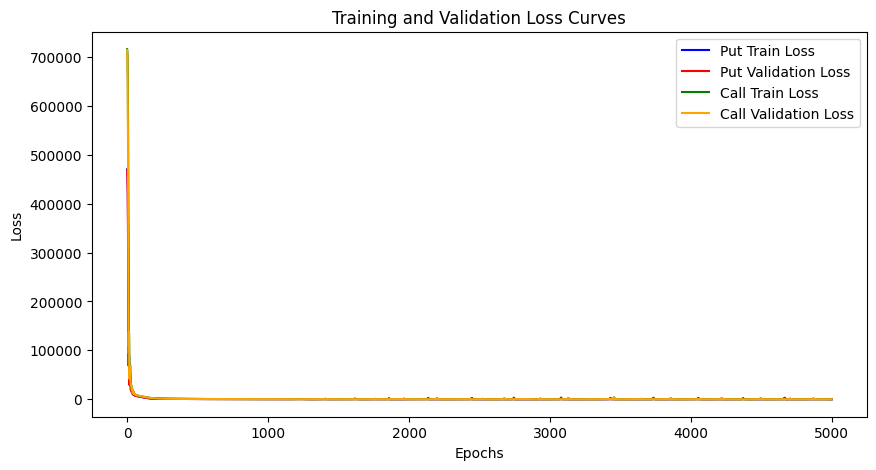

In [ ]:
# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(put_train_losses, label="Put Train Loss", color="blue")
plt.plot(put_val_losses, label="Put Validation Loss", color="red")
plt.plot(call_train_losses, label="Call Train Loss", color="green")
plt.plot(call_val_losses, label="Call Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.show()


# Model Save

In [ ]:
import torch
import joblib

def save_model_and_scaler(model, scaler_X, model_path, scaler_path):
    """
    保存模型和标准化器。

    :param model: 训练好的模型。
    :param scaler_X: 输入特征的标准化器。
    :param model_path: 模型保存路径。
    :param scaler_path: 标准化器保存路径。
    """
    # 保存模型参数
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

    # 保存标准化器
    joblib.dump(scaler_X, scaler_path)
    print(f"Scaler saved to {scaler_path}")


def load_model_and_scaler(model_class, input_size, hidden_size, output_size, model_path, scaler_path):
    """
    加载模型和标准化器。

    :param model_class: 模型的类定义。
    :param input_size: 输入特征维度。
    :param hidden_size: 隐藏层神经元数量。
    :param output_size: 输出特征维度。
    :param model_path: 模型加载路径。
    :param scaler_path: 标准化器加载路径。
    :return: 加载的模型和标准化器。
    """
    # 加载模型
    model = model_class(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    model.load_state_dict(torch.load(model_path))
    model.eval()  # 切换到评估模式
    print(f"Model loaded from {model_path}")

    # 加载标准化器
    scaler_X = joblib.load(scaler_path)
    print(f"Scaler loaded from {scaler_path}")

    return model, scaler_X


# 保存 Put 和 Call 模型
save_model_and_scaler(put_model, put_scaler_X, "put_model.pth", "put_scaler_X.pkl")
save_model_and_scaler(call_model, call_scaler_X, "call_model.pth", "call_scaler_X.pkl")
# 定义 MNN 类
# 假设 MNN 类已定义

# 加载模型和标准化器
put_model, put_scaler_X = load_model_and_scaler(
    MNN, input_size=8, hidden_size=64, output_size=1,
    model_path="put_model.pth", scaler_path="put_scaler_X.pkl"
)

call_model, call_scaler_X = load_model_and_scaler(
    MNN, input_size=8, hidden_size=64, output_size=1,
    model_path="call_model.pth", scaler_path="call_scaler_X.pkl"
)


Model saved to put_model.pth
Scaler saved to put_scaler_X.pkl
Model saved to call_model.pth
Scaler saved to call_scaler_X.pkl
Model loaded from put_model.pth
Scaler loaded from put_scaler_X.pkl
Model loaded from call_model.pth
Scaler loaded from call_scaler_X.pkl


<ipython-input-135-377ed26e151d>:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


# Price Prediction


In [ ]:
def predict_option_price(model, scaler_X, raw_params):
    """
    使用训练好的模型预测期权价格。

    :param model: 训练好的神经网络模型。
    :param scaler_X: 输入特征的标准化器 (StandardScaler)。
    :param raw_params: 未经标准化的特征向量 (list or numpy array)。
    :return: 反标准化后的预测期权价格。
    """
    # 验证输入
    if len(raw_params) != scaler_X.mean_.shape[0]:
        raise ValueError(f"Expected {scaler_X.mean_.shape[0]} input features, got {len(raw_params)}.")

    # 标准化输入特征
    inputs = scaler_X.transform([raw_params])  # 标准化为 2D 数组
    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)

    # 模型预测
    model.eval()
    with torch.no_grad():
        predicted_price= model(inputs_tensor).item()

    return predicted_price


# 示例特征向量
sample_params = [2.57661, 0.4583, 0.915, 0.5, -0.7, 1200, 1200, 36]


put_price = predict_option_price(put_model, put_scaler_X, sample_params)
call_price = predict_option_price(call_model, call_scaler_X, sample_params)

print(f"Predicted Put Option Price: {put_price}")
print(f"Predicted Call Option Price: {call_price}")


Predicted Put Option Price: 546.8297729492188
Predicted Call Option Price: 539.3612060546875


Put Option Prediction Time: 2.3356 seconds
Put Option: Predicted vs True Prices - Mean Squared Error (MSE): 32.0989


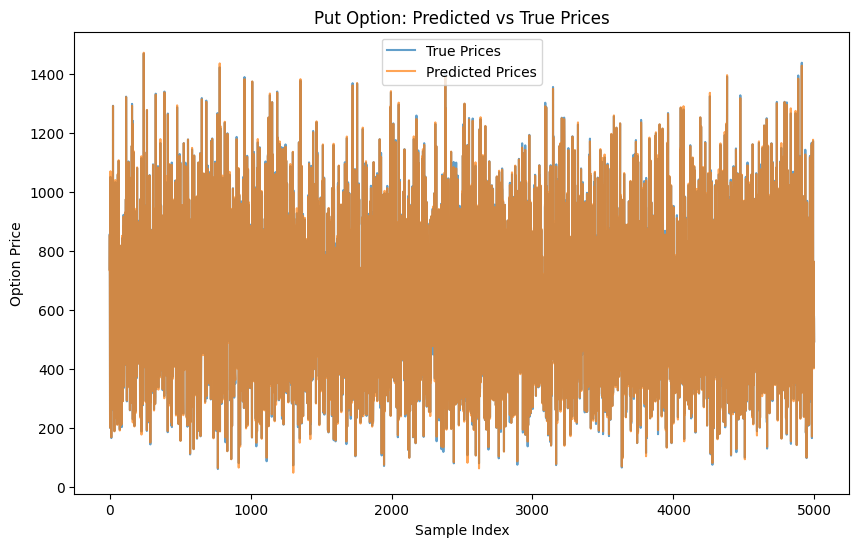

Call Option Prediction Time: 2.4746 seconds
Call Option: Predicted vs True Prices - Mean Squared Error (MSE): 44.3756


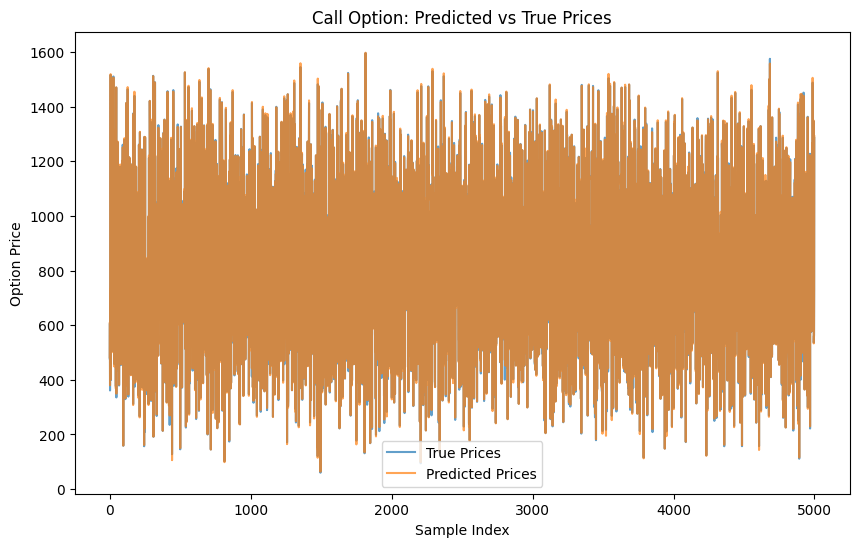

In [ ]:
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd


def predict_option_price(model, scaler_X, raw_params):
    """
    使用训练好的模型预测期权价格。

    :param model: 训练好的神经网络模型。
    :param scaler_X: 输入特征的标准化器 (StandardScaler)。
    :param raw_params: 未经标准化的特征向量 (list or numpy array)。
    :return: 模型预测的期权价格。
    """
    # 验证输入
    if len(raw_params) != scaler_X.mean_.shape[0]:
        raise ValueError(f"Expected {scaler_X.mean_.shape[0]} input features, got {len(raw_params)}.")

    # 标准化输入特征
    inputs = scaler_X.transform([raw_params])  # 标准化为 2D 数组
    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)

    # 模型预测
    model.eval()
    with torch.no_grad():
        predicted_price = model(inputs_tensor).item()

    return predicted_price


def predict_subset_dataframe(model, scaler_X, X, y, sample_size=1000):
    """
    使用模型预测期权价格，将预测的输入和输出价格合并为数据框后返回。

    :param model: 训练好的神经网络模型。
    :param scaler_X: 输入特征的标准化器 (StandardScaler)。
    :param X: 原始输入特征 (未标准化)。
    :param y: 真实目标值。
    :param sample_size: 抽样的样本数量。
    :return: 包含输入特征、真实值和预测值的数据框，以及运行时间。
    """
    # 随机抽样部分数据
    indices = np.random.choice(len(X), size=min(sample_size, len(X)), replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    predictions = []

    start_time = time.time()  # 开始计时
    for params in X_sample.numpy():
        predicted_price = predict_option_price(model, scaler_X, params)
        predictions.append(predicted_price)
    elapsed_time = time.time() - start_time  # 计算运行时间

    # 构建 DataFrame
    df = pd.DataFrame(X_sample.numpy(), columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
    df["True_Price"] = y_sample.numpy()
    df["Predicted_Price"] = predictions

    return df, elapsed_time


def analyze_predictions(df, title):
    """
    分析预测值与真实值的差异，绘制图像并计算误差指标。

    :param df: 包含真实值和预测值的数据框。
    :param title: 图像标题。
    """
    # 提取真实值和预测值
    y_sample = df["True_Price"]
    predictions = df["Predicted_Price"]

    # 计算误差指标
    mse = mean_squared_error(y_sample, predictions)
    print(f"{title} - Mean Squared Error (MSE): {mse:.4f}")

    # 绘制对比图
    plt.figure(figsize=(10, 6))
    plt.plot(y_sample.values, label="True Prices", alpha=0.7)
    plt.plot(predictions.values, label="Predicted Prices", alpha=0.7)
    plt.xlabel("Sample Index")
    plt.ylabel("Option Price")
    plt.title(title)
    plt.legend()
    plt.show()


# 对 Put 和 Call 分别进行预测和分析
put_predictions_df, elapsed_put = predict_subset_dataframe(put_model, put_scaler_X, X_put, y_put, sample_size=5000)
print(f"Put Option Prediction Time: {elapsed_put:.4f} seconds")
analyze_predictions(put_predictions_df, "Put Option: Predicted vs True Prices")

call_predictions_df, elapsed_call = predict_subset_dataframe(call_model, call_scaler_X, X_call, y_call, sample_size=5000)
print(f"Call Option Prediction Time: {elapsed_call:.4f} seconds")
analyze_predictions(call_predictions_df, "Call Option: Predicted vs True Prices")


# Implied Voltality Calculation

In [ ]:
import QuantLib as ql
import numpy as np
from scipy.optimize import brentq

def calculate_iv(price, S0, strike, r, q, dte, put_or_call="put", tol=1e-5, max_iter=100):
    """
    计算隐含波动率，基于当前日期和到期天数 (DTE)。

    :param price: 期权市场价格。
    :param S0: 当前标的物价格。
    :param strike: 行权价。
    :param r: 无风险利率。
    :param q: 分红率。
    :param dte: 到期天数 (Days to Expiry)。
    :param put_or_call: "put" 或 "call"，指定期权类型。
    :param tol: 收敛容差。
    :param max_iter: 最大迭代次数。
    :return: 隐含波动率或 NaN（若无法求解）。
    """
    # 动态计算到期日期
    today = ql.Date.todaysDate()  # 获取 QuantLib 当前日期
    expire_date = today + int(dte)  # 计算到期日期

    # 将日期转换为 QuantLib 日期
    ql.Settings.instance().evaluationDate = today

    def objective_function(sigma):
        # 定义 Payoff 和 Exercise
        payoff = ql.PlainVanillaPayoff(ql.Option.Call if put_or_call == "call" else ql.Option.Put, strike)
        exercise = ql.EuropeanExercise(expire_date)

        # 构造定价过程
        spot_handle = ql.QuoteHandle(ql.SimpleQuote(S0))
        risk_free_curve = ql.YieldTermStructureHandle(ql.FlatForward(today, r, ql.Actual365Fixed()))
        dividend_curve = ql.YieldTermStructureHandle(ql.FlatForward(today, q, ql.Actual365Fixed()))
        volatility_handle = ql.BlackVolTermStructureHandle(
            ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual365Fixed())
        )
        process = ql.BlackScholesMertonProcess(spot_handle, dividend_curve, risk_free_curve, volatility_handle)

        # 定价引擎
        engine = ql.AnalyticEuropeanEngine(process)

        # 定价
        option = ql.VanillaOption(payoff, exercise)
        option.setPricingEngine(engine)
        return option.NPV() - price

    # 检查输入有效性
    if price <= 0 or S0 <= 0 or strike <= 0:
        print(f"Invalid input values: price={price}, S0={S0}, strike={strike}")
        return np.nan

    # 使用 Brent 方法求解隐含波动率
    try:
        return brentq(objective_function, 0.01, 3.0, xtol=tol, maxiter=max_iter)
    except ValueError:
        # 隐含波动率求解失败
        return np.nan


In [ ]:
def calculate_iv_surface_dynamic_bins(data, put_or_call, num_bins=10):
    """
    计算隐含波动率曲面，动态根据 DTE 和 Log_Strike 范围分组。

    :param data: 包含期权数据的 DataFrame。
    :param put_or_call: "put" 或 "call"，指定计算的期权类型。
    :param num_bins: 动态分组的数量。
    :return: 隐含波动率曲面 (2D numpy array)。
    """
    # 根据 DTE 和 Log_Strike 的范围动态创建分组
    dte_bins = np.linspace(data["DTE"].min(), data["DTE"].max(), num_bins + 1)
    log_strike_bins = np.linspace(data["Log-Strike"].min(), data["Log-Strike"].max(), num_bins + 1)
    volatility_surface = np.zeros((len(dte_bins) - 1, len(log_strike_bins) - 1))

    for i in range(len(dte_bins) - 1):
        for j in range(len(log_strike_bins) - 1):
            # 筛选满足条件的子集
            subset = data[
                (data["DTE"] >= dte_bins[i]) & (data["DTE"] < dte_bins[i + 1]) &
                (data["Log-Strike"] >= log_strike_bins[j]) & (data["Log-Strike"] < log_strike_bins[j + 1])
            ]
            if not subset.empty:
                # 根据期权类型计算隐含波动率
              ivs = subset.apply(
                      lambda row: calculate_iv(
                          price=row["Predicted_Price"],
                          S0=row["UNDERLYING_LAST"],
                          strike=row["STRIKE"],
                          r=row["rf"],
                          q=row['div'],
                          dte=row["DTE"],
                          put_or_call=put_or_call,
                      ),
                      axis=1
                  )

                # 筛选有效的隐含波动率
              ivs = ivs[ivs > 0]
              if not ivs.empty:
                  volatility_surface[i, j] = ivs.mean()
              else:
                  volatility_surface[i, j] = np.nan
            else:
                volatility_surface[i, j] = np.nan

    return volatility_surface, dte_bins, log_strike_bins



In [ ]:
put_predictions_df

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5    Feature_6  \
0      0.763528   2.783122   0.460297   1.341413  -0.145485  4576.939941   
1      0.591050   4.492293   0.803478   0.157577  -0.337836  4221.319824   
2      0.799413   7.972365   0.007108   2.246252  -0.883037  4167.330078   
3      0.198548   0.228475   0.270349   1.612491  -0.384201  4516.020020   
4      1.208931   3.902195   0.546484   0.304156  -0.127085  4221.319824   
...         ...        ...        ...        ...        ...          ...   
4995   0.546671   6.313494   0.388602   0.455404  -0.577934  4119.879883   
4996   1.025558   4.911256   0.540389   1.618414  -0.823996  4455.589844   
4997   0.671315   3.213180   0.584892   0.414315  -0.950296  3952.010010   
4998   1.171008   7.577351   0.821908   0.354372  -0.392252  4221.319824   
4999   0.390831   0.231633   0.268796   0.718870  -0.717061  4516.020020   

        Feature_7  Feature_8  True_Price  Predicted_Price  
0     4529.191406      113.0  737.212036       734.308105  
1     3992.257568      203.0  856.560242       852.368408  
2     4328.419922       75.0  491.462921       488.418152  
3     4147.960449       92.0  199.918747       200.967987  
4     4249.960938      133.0  927.165771       932.956909  
...           ...        ...         ...              ...  
4995  4175.948242      194.0  763.215149       763.448303  
4996  4049.911621       51.0  404.590515       401.240204  
4997  3998.019775       76.0  579.913574       577.937378  
4998  4005.822021       66.0  577.476746       569.541016  
4999  4565.968262       72.0  492.109467       494.156891  

[5000 rows x 10 columns]

In [ ]:
put_data

v0     kappa     theta     sigma       rho  spot_price  \
0      0.309291  5.336360  1.286538  0.211732 -0.830713     3853.39   
1      0.453532  2.619327  1.033266  0.248713 -0.630440     3853.39   
2      0.360860  7.262775  0.646838  0.179395 -0.802614     3853.39   
3      0.339230  2.733793  1.218897  0.489218 -0.463646     3853.39   
4      0.496610  6.939677  1.188985  0.387548 -0.268504     3853.39   
...         ...       ...       ...       ...       ...         ...   
89995  0.318791  0.122792  0.339838  1.520052 -0.307906     4516.02   
89996  0.371996  0.257461  0.347504  0.965634 -0.758687     4516.02   
89997  0.412614  0.262930  0.291503  1.760471 -0.122423     4516.02   
89998  0.336086  0.135412  0.227369  1.142537 -0.516377     4516.02   
89999  0.299027  0.214933  0.274626  1.326191 -0.673363     4516.02   

       strike_price  maturity_days  risk_free_rate  dividend_rate  \
0       3928.633865            202        0.042220         0.0171   
1       4044.676190             73        0.042220         0.0171   
2       3543.899625             79        0.042220         0.0171   
3       3838.524694            237        0.042220         0.0171   
4       3481.231694             90        0.042220         0.0171   
...             ...            ...             ...            ...   
89995   4114.974306            151        0.055113         0.0156   
89996   4556.036305             76        0.055113         0.0156   
89997   4309.301515            212        0.055113         0.0156   
89998   4492.197495            121        0.055113         0.0156   
89999   4291.209347             89        0.055113         0.0156   

             price option_type    month  
0      1100.496629         put  2023-01  
1       618.062944         put  2023-01  
2       335.613805         put  2023-01  
3      1016.984820         put  2023-01  
4       483.542993         put  2023-01  
...            ...         ...      ...  
89995   362.765912         put  2023-09  
89996   480.766734         put  2023-09  
89997   569.218371         put  2023-09  
89998   509.897961         put  2023-09  
89999   333.373836         put  2023-09  

[90000 rows x 13 columns]

In [ ]:
#price, S0, strike, r, q, dte
#put_predictions_df.columns = ['v0', 'kappa',	'theta'	,'sigma','rho',	'UNDERLYING_LAST','STRIKE', 'DTE', 'True_Price','Predicted_Price']
put_predictions_df['rf'] = 0.0422
put_predictions_df['div'] = 0.0171
put_predictions_df['Log-Strike'] = np.log(put_predictions_df['STRIKE']/put_predictions_df['UNDERLYING_LAST'])

#call_predictions_df.columns = ['v0', 'kappa',	'theta'	,'sigma','rho',	'UNDERLYING_LAST','STRIKE', 'DTE', 'True_Price','Predicted_Price']
call_predictions_df['rf'] = 0.0422
call_predictions_df['div'] = 0.0171
call_predictions_df['Log-Strike'] = np.log(call_predictions_df['STRIKE']/call_predictions_df['UNDERLYING_LAST'])


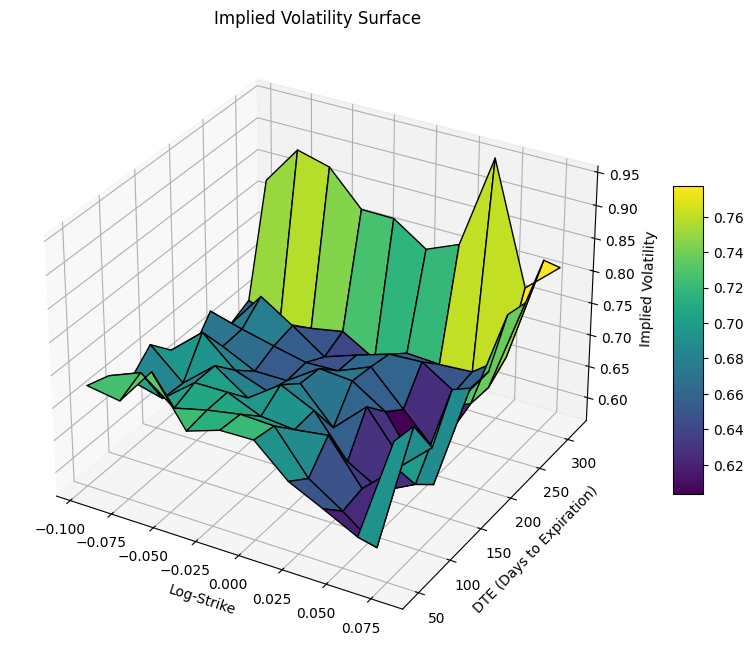

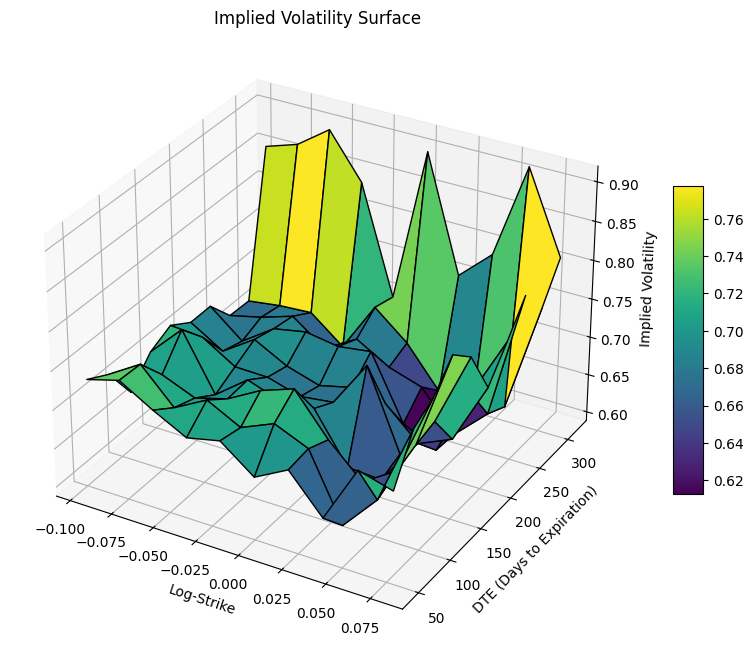

In [ ]:
put_vol_surface = calculate_iv_surface_dynamic_bins(put_predictions_df, "put")
call_vol_surface = calculate_iv_surface_dynamic_bins(call_predictions_df, "call")
draw_volatility_surface(put_vol_surface[0], put_vol_surface[1], put_vol_surface[2])
draw_volatility_surface(call_vol_surface[0], call_vol_surface[1], call_vol_surface[2])

## About other models

In [ ]:
XGBoost_put = pd.read_csv("XGBoost_put.csv")[['spot_price', 'strike_price',
       'maturity_days', 'risk_free_rate', 'dividend_rate', 'Predicted Price']]
XGBoost_call = pd.read_csv("XGBoost_call.csv")[['spot_price', 'strike_price',
       'maturity_days', 'risk_free_rate', 'dividend_rate', 'Predicted Price']]
XGBoost_put.columns = ['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_Price']
XGBoost_call.columns = ['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_Price']
XGBoost_put['Log-Strike'] = np.log(XGBoost_put['STRIKE']/XGBoost_put['UNDERLYING_LAST'])
XGBoost_call['Log-Strike'] = np.log(XGBoost_call['STRIKE']/XGBoost_call['UNDERLYING_LAST'])

LightGBM = pd.read_csv("LightGBM.csv")
LightGBM_put = LightGBM[['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_P_price']]
LightGBM_call = LightGBM[['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' , 'Predicted_C_price']]
LightGBM_put.columns = ['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_Price']
LightGBM_call.columns = ['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_Price']
LightGBM_call['Log-Strike'] = np.log(LightGBM['STRIKE']/LightGBM['UNDERLYING_LAST'])
LightGBM_put['Log-Strike'] = np.log(LightGBM['STRIKE']/LightGBM['UNDERLYING_LAST'])

RandomForest_put = pd.read_csv("Random Forest Put.csv")[['spot_price', 'strike_price',
       'maturity_days', 'risk_free_rate', 'dividend_rate',  'Model_2_Price']]
RandomForest_call = pd.read_csv("Random Forest Call.csv")[['spot_price', 'strike_price',
       'maturity_days', 'risk_free_rate','dividend_rate',  'Model_1_Price']]
RandomForest_put.columns = ['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_Price']
RandomForest_call.columns = ['UNDERLYING_LAST','STRIKE', 'DTE','rf','div' ,'Predicted_Price']
RandomForest_put['Log-Strike'] = np.log(RandomForest_put['STRIKE']/RandomForest_put['UNDERLYING_LAST'])
RandomForest_call['Log-Strike'] = np.log(RandomForest_call['STRIKE']/RandomForest_call['UNDERLYING_LAST'])



<ipython-input-217-78edd3e4f1ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LightGBM_call['Log-Strike'] = np.log(LightGBM['STRIKE']/LightGBM['UNDERLYING_LAST'])
<ipython-input-217-78edd3e4f1ef>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LightGBM_put['Log-Strike'] = np.log(LightGBM['STRIKE']/LightGBM['UNDERLYING_LAST'])


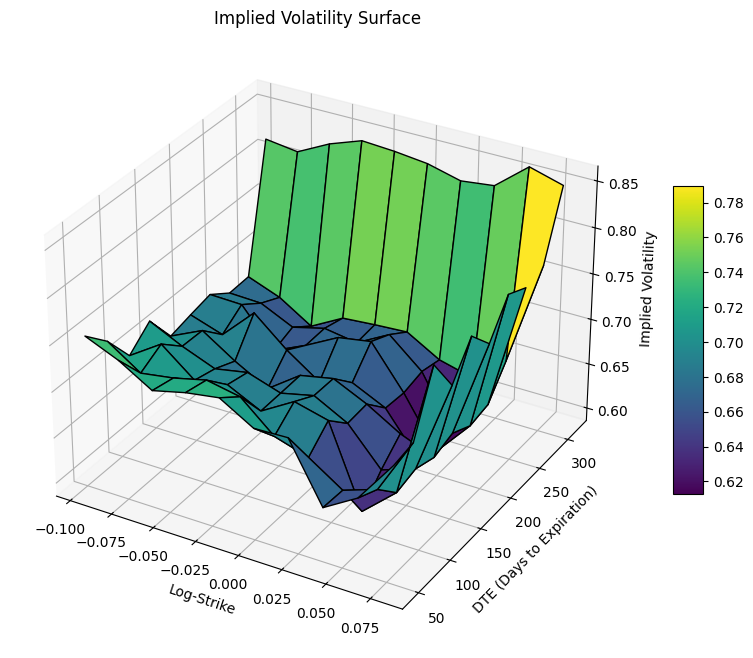

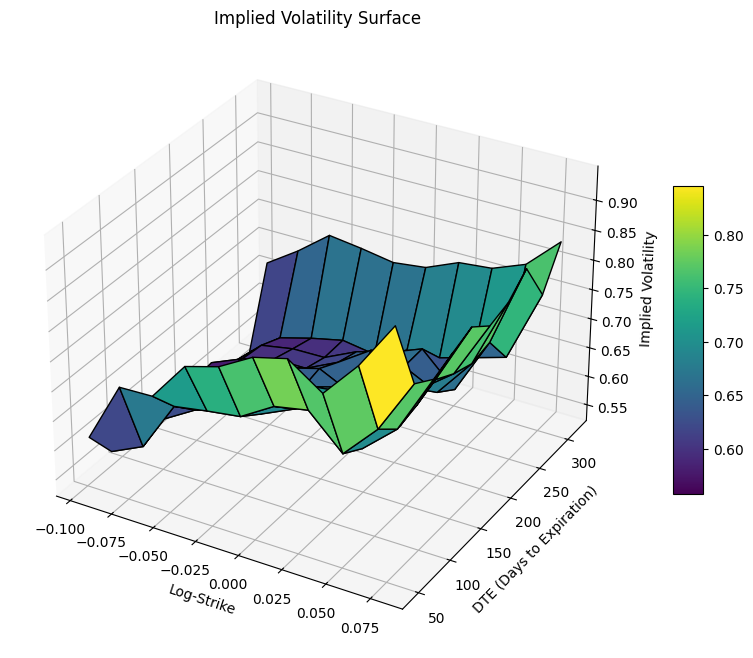

In [ ]:
put_vol_surface = calculate_iv_surface_dynamic_bins(XGBoost_put, "put")
call_vol_surface = calculate_iv_surface_dynamic_bins(XGBoost_call, "call")

draw_volatility_surface(put_vol_surface[0], put_vol_surface[1], put_vol_surface[2])
draw_volatility_surface(call_vol_surface[0], call_vol_surface[1], call_vol_surface[2])

Invalid input values: price=-0.4981583533391382, S0=4449.99, strike=800.0
Invalid input values: price=-0.4327518456252735, S0=3918.94, strike=1800.0
Invalid input values: price=-5.155014853133348, S0=3894.2, strike=3370.0
Invalid input values: price=-58.60784395145386, S0=4449.99, strike=3800.0
Invalid input values: price=-1.4856136171616692, S0=4136.27, strike=3590.0


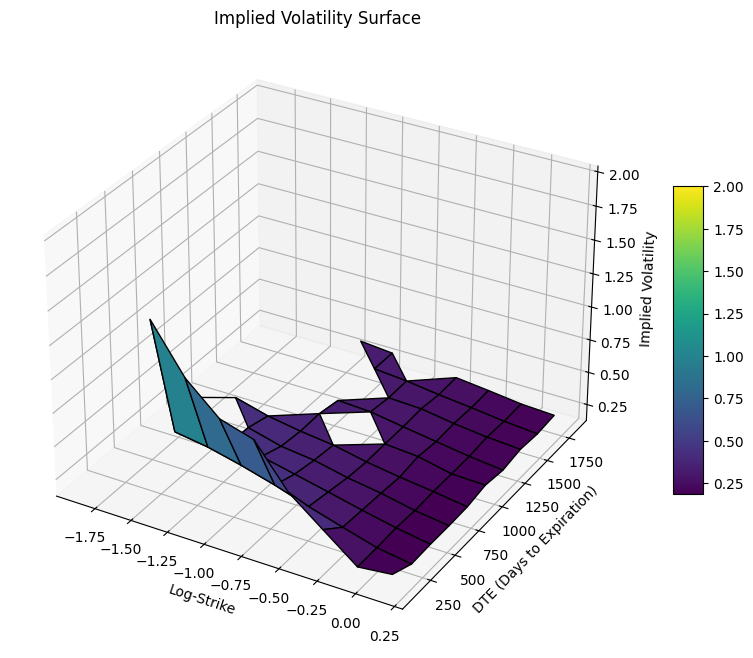

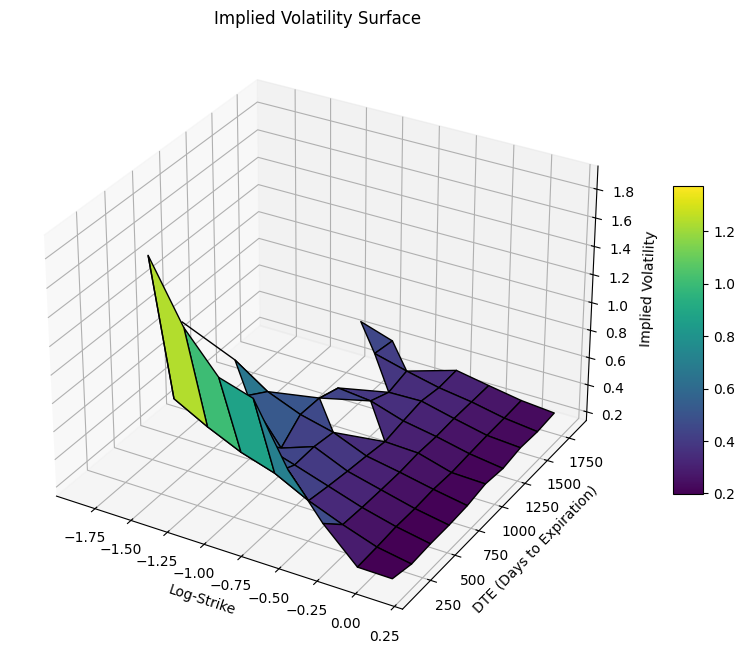

In [ ]:
put_vol_surface = calculate_iv_surface_dynamic_bins(LightGBM_put, "put")
call_vol_surface = calculate_iv_surface_dynamic_bins(LightGBM_call, "call")

draw_volatility_surface(put_vol_surface[0], put_vol_surface[1], put_vol_surface[2])
draw_volatility_surface(call_vol_surface[0], call_vol_surface[1], call_vol_surface[2])

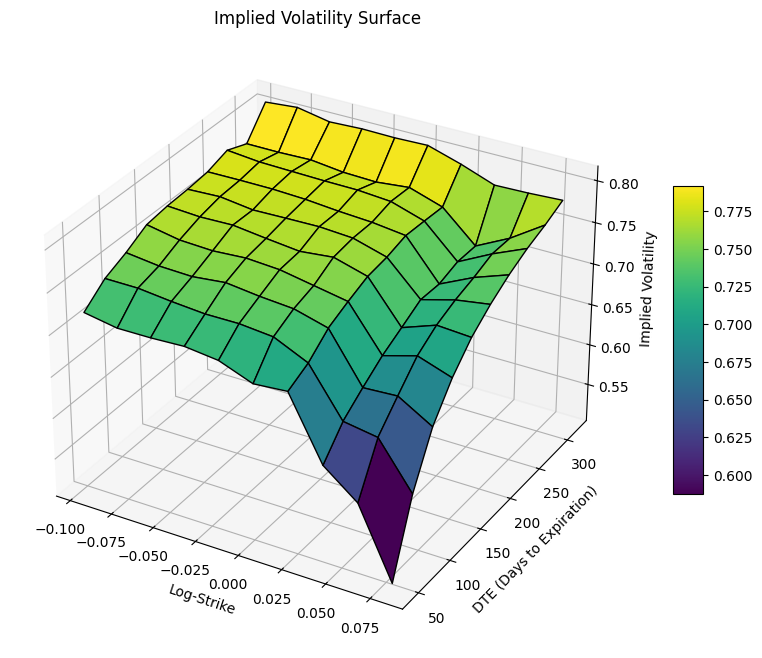

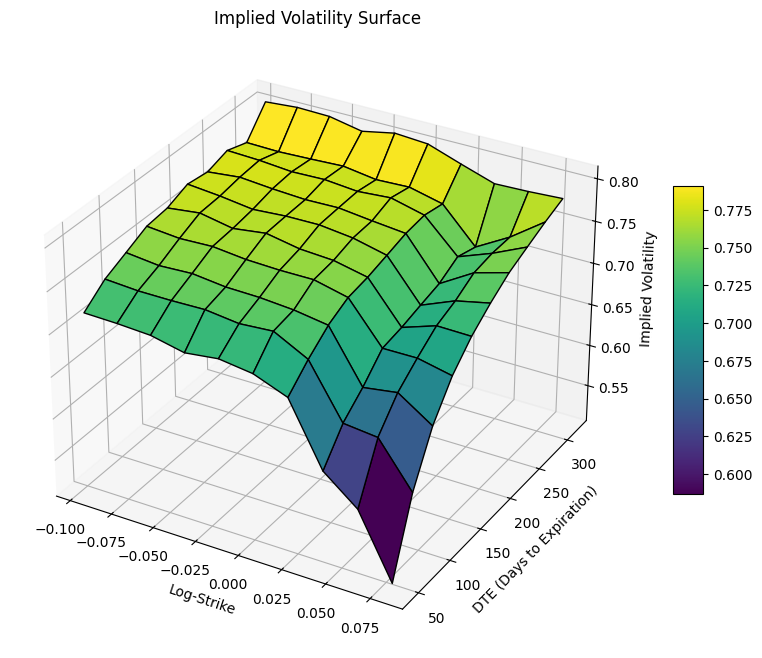

In [ ]:
put_vol_surface = calculate_iv_surface_dynamic_bins(RandomForest_put, "put")
call_vol_surface = calculate_iv_surface_dynamic_bins(RandomForest_call, "call")

draw_volatility_surface(put_vol_surface[0], put_vol_surface[1], put_vol_surface[2])
draw_volatility_surface(call_vol_surface[0], call_vol_surface[1], call_vol_surface[2])

# XGBoost

Saving heston_data_with_call.csv to heston_data_with_call (2).csv
Number of predictions: 18000
Root Mean Squared Error (RMSE): 25.28

Predictions saved to 'all_predicted_prices.csv'.

Feature Importance:
          Feature  Importance
7   maturity_days    0.339493
8  risk_free_rate    0.203215
2           theta    0.186136
5      spot_price    0.110347
0              v0    0.084881
6    strike_price    0.047182
1           kappa    0.010761
9   dividend_rate    0.009463
3           sigma    0.006966
4             rho    0.001558


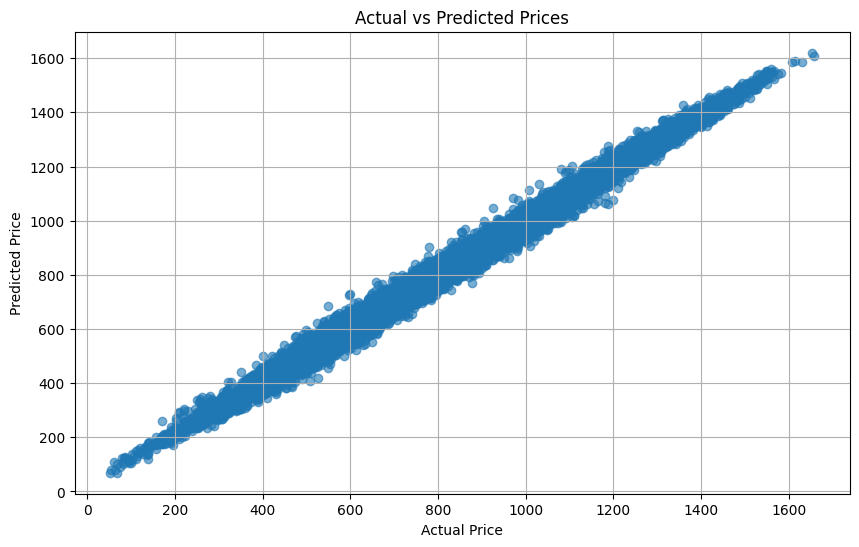

[0]	validation_0-rmse:255.97031	validation_1-rmse:255.83711
[1]	validation_0-rmse:236.01626	validation_1-rmse:235.84747
[2]	validation_0-rmse:218.33388	validation_1-rmse:218.01093
[3]	validation_0-rmse:202.37259	validation_1-rmse:202.14476
[4]	validation_0-rmse:187.88552	validation_1-rmse:187.72678
[5]	validation_0-rmse:175.09363	validation_1-rmse:174.91763
[6]	validation_0-rmse:163.35919	validation_1-rmse:163.21099
[7]	validation_0-rmse:153.21882	validation_1-rmse:153.17406
[8]	validation_0-rmse:143.66967	validation_1-rmse:143.65686
[9]	validation_0-rmse:135.38706	validation_1-rmse:135.35456
[10]	validation_0-rmse:127.73909	validation_1-rmse:127.79575
[11]	validation_0-rmse:121.34491	validation_1-rmse:121.45339
[12]	validation_0-rmse:114.50093	validation_1-rmse:114.73702
[13]	validation_0-rmse:108.64812	validation_1-rmse:108.93265
[14]	validation_0-rmse:103.31131	validation_1-rmse:103.73483
[15]	validation_0-rmse:98.03414	validation_1-rmse:98.52939
[16]	validation_0-rmse:93.87981	vali

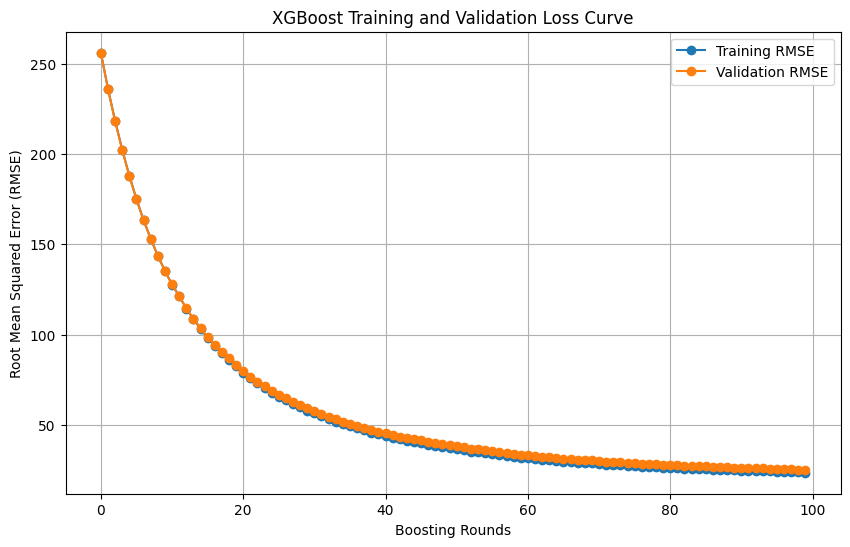


Total runtime of the script: 5.01 seconds


In [ ]:
from google.colab import files
uploaded = files.upload()
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Measure start time
start_time = time.time()

# Read the data
data = pd.read_csv('heston_data_with_call.csv')

# Define features and target
features = [
    'v0', 'kappa', 'theta', 'sigma', 'rho',
    'spot_price', 'strike_price', 'maturity_days',
    'risk_free_rate', 'dividend_rate'
]
target = 'price'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=100,  # Increase the number of trees
    learning_rate=0.1,  # Lower the learning rate
    max_depth=5  # Control the tree depth
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict prices
y_pred = xgb_model.predict(X_test)

# Check the number of predictions
print(f"Number of predictions: {len(y_pred)}")

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Create a DataFrame with actual and predicted values
predictions = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Save the predictions to a CSV file
output_file = 'all_predicted_prices.csv'
predictions.to_csv(output_file, index=False)
print(f"\nPredictions saved to '{output_file}'.")

# Print feature importance
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importances)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# Plot training and validation loss curves
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)
results = xgb_model.evals_result()

plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Training RMSE', marker='o')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE', marker='o')

plt.title('XGBoost Training and Validation Loss Curve')
plt.xlabel('Boosting Rounds')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid()
plt.show()

# Measure end time and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"\nTotal runtime of the script: {runtime:.2f} seconds")

Saving heston_data_with_put.csv to heston_data_with_put.csv
Number of predictions: 18000
Root Mean Squared Error (RMSE): 24.52

Predictions saved to 'all_predicted_prices_put.csv'.

Feature Importance:
          Feature  Importance
7   maturity_days    0.382587
2           theta    0.278624
0              v0    0.107529
3           sigma    0.074981
6    strike_price    0.065787
5      spot_price    0.045224
8  risk_free_rate    0.021098
1           kappa    0.013993
9   dividend_rate    0.007873
4             rho    0.002304


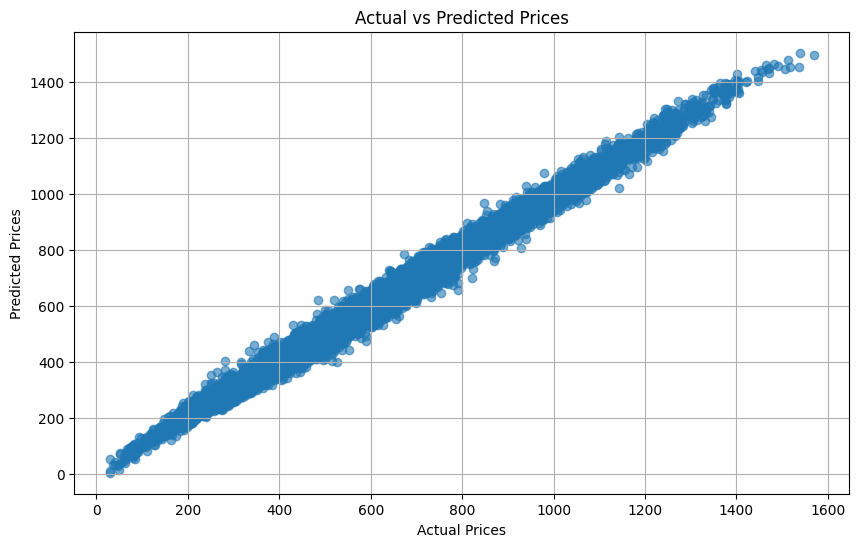

[0]	validation_0-rmse:235.37320	validation_1-rmse:236.69386
[1]	validation_0-rmse:218.13504	validation_1-rmse:219.43920
[2]	validation_0-rmse:202.45620	validation_1-rmse:203.76588
[3]	validation_0-rmse:188.33512	validation_1-rmse:189.66476
[4]	validation_0-rmse:176.00427	validation_1-rmse:177.33446
[5]	validation_0-rmse:164.52785	validation_1-rmse:165.90314
[6]	validation_0-rmse:154.10324	validation_1-rmse:155.55130
[7]	validation_0-rmse:144.98826	validation_1-rmse:146.49422
[8]	validation_0-rmse:136.79436	validation_1-rmse:138.33352
[9]	validation_0-rmse:129.38760	validation_1-rmse:130.96645
[10]	validation_0-rmse:122.34977	validation_1-rmse:123.95792
[11]	validation_0-rmse:116.08716	validation_1-rmse:117.72242
[12]	validation_0-rmse:110.15314	validation_1-rmse:111.83458
[13]	validation_0-rmse:104.34407	validation_1-rmse:106.01795
[14]	validation_0-rmse:99.33345	validation_1-rmse:101.08372
[15]	validation_0-rmse:94.98386	validation_1-rmse:96.74403
[16]	validation_0-rmse:90.83724	valid

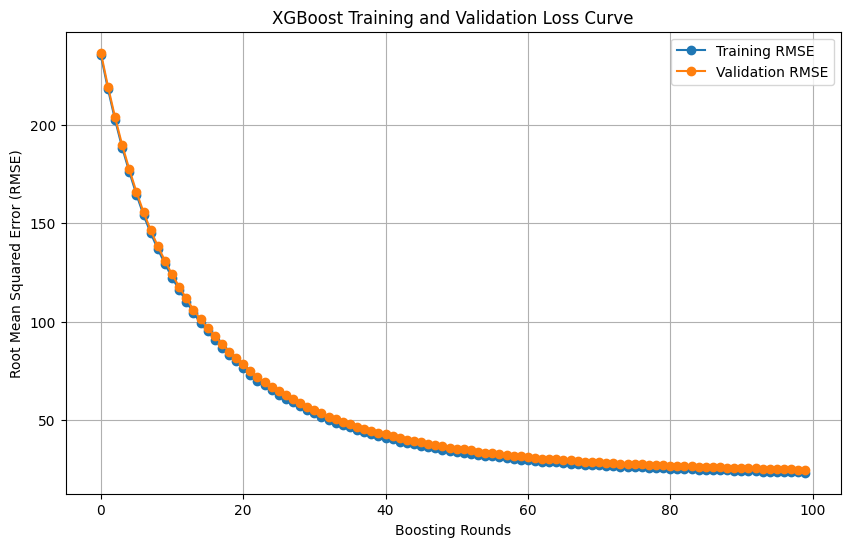


Total runtime of the script: 3.63 seconds


In [ ]:
from google.colab import files
uploaded = files.upload()
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Measure start time
start_time = time.time()

# Load data
data = pd.read_csv('heston_data_with_put.csv')

# Define features and target
features = [
    'v0', 'kappa', 'theta', 'sigma', 'rho',
    'spot_price', 'strike_price', 'maturity_days',
    'risk_free_rate', 'dividend_rate'
]
target = 'price'

X = data[features]
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # Use all data
)

# Initialize XGBoost model
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=100,  # Increase the number of trees
    learning_rate=0.1,  # Lower the learning rate
    max_depth=5  # Control the depth of the tree
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict prices
y_pred = xgb_model.predict(X_test)

# Check the number of predictions
print(f"Number of predictions: {len(y_pred)}")

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Create a DataFrame with actual and predicted values
predictions = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Save predictions to a CSV file
output_file = 'all_predicted_prices_put.csv'
predictions.to_csv(output_file, index=False)
print(f"\nPredictions saved to '{output_file}'.")

# Print feature importance
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importances)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Plot training and validation loss curves
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)
results = xgb_model.evals_result()

plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['rmse'], label='Training RMSE', marker='o')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE', marker='o')

plt.title('XGBoost Training and Validation Loss Curve')
plt.xlabel('Boosting Rounds')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()

# Measure end time and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"\nTotal runtime of the script: {runtime:.2f} seconds")

# LightGBM

In [ ]:
!pip install lightgbm quantlib==1.36 numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 44.7 MB/s eta 0:00:00


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 1.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df2=pd.read_csv('/content/drive/My Drive/EU.csv')
df2.columns
df2

QUOTE_DATE EXPIRE_DATE      DTE  UNDERLYING_LAST   STRIKE   P_BID  \
0        2023-01-04  2023-01-04     0.00          3853.39   1000.0     0.0   
1        2023-01-04  2023-01-04     0.00          3853.39   1200.0     0.0   
2        2023-01-04  2023-01-04     0.00          3853.39   1400.0     0.0   
3        2023-01-04  2023-01-04     0.00          3853.39   1600.0     0.0   
4        2023-01-04  2023-01-04     0.00          3853.39   1800.0     0.0   
...             ...         ...      ...              ...      ...     ...   
1453005  2023-09-29  2028-12-15  1904.04          4286.60   8800.0  2880.7   
1453006  2023-09-29  2028-12-15  1904.04          4286.60   9200.0  3186.3   
1453007  2023-09-29  2028-12-15  1904.04          4286.60   9600.0  3494.7   
1453008  2023-09-29  2028-12-15  1904.04          4286.60  10000.0  3805.0   
1453009  2023-09-29  2028-12-15  1904.04          4286.60  12000.0  5369.4   

           P_ASK     P_IV   C_BID   C_ASK     C_IV   P_price  C_price  \
0           0.05  8.17536  2846.8  2848.3      NaN     0.025  2847.55   
1           0.05  7.06724  2646.8  2648.3      NaN     0.025  2647.55   
2           0.05  6.13893  2427.6  2471.0      NaN     0.025  2449.30   
3           0.05  5.33125  2246.8  2248.3      NaN     0.025  2247.55   
4           0.05  4.61644  2046.8  2048.3      NaN     0.025  2047.55   
...          ...      ...     ...     ...      ...       ...      ...   
1453005  3072.60      NaN     6.3    48.4  0.13139  2976.650    27.35   
1453006  3378.20      NaN     5.0    39.1  0.13457  3282.250    22.05   
1453007  3686.60      NaN     5.0    32.7  0.13909  3590.650    18.85   
1453008  3996.90      NaN     3.1    22.3  0.13708  3900.950    12.70   
1453009  5561.30      NaN     0.0    17.7  0.15954  5465.350     8.85   

               rf  Log-Strike     div  
0        0.042000   -1.348953  0.0171  
1        0.042000   -1.166632  0.0171  
2        0.042000   -1.012481  0.0171  
3        0.042000   -0.878950  0.0171  
4        0.042000   -0.761167  0.0171  
...           ...         ...     ...  
1453005  0.045752    0.480588  0.0156  
1453006  0.045752    0.525040  0.0156  
1453007  0.045752    0.567600  0.0156  
1453008  0.045752    0.608422  0.0156  
1453009  0.045752    0.790743  0.0156  

[1453010 rows x 16 columns]

In [ ]:
for column_name, column_type in df2.dtypes.items():
    print(f"Column Name: {column_name}, Data Type: {column_type}")

Column Name: QUOTE_DATE, Data Type: object
Column Name: EXPIRE_DATE, Data Type: object
Column Name: DTE, Data Type: float64
Column Name: UNDERLYING_LAST, Data Type: float64
Column Name: STRIKE, Data Type: float64
Column Name: P_BID, Data Type: float64
Column Name: P_ASK, Data Type: float64
Column Name: P_IV, Data Type: float64
Column Name: C_BID, Data Type: float64
Column Name: C_ASK, Data Type: float64
Column Name: C_IV, Data Type: float64
Column Name: P_price, Data Type: float64
Column Name: C_price, Data Type: float64
Column Name: rf, Data Type: float64
Column Name: Log-Strike, Data Type: float64
Column Name: div, Data Type: float64


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import QuantLib as ql
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
import logging
import numpy as np
dte_bins = np.linspace(300, 1500, 10)  # DTE
log_strike_bins = np.linspace(-1, 1, 10)  # Log_Strike
volatility_surface = np.zeros((len(dte_bins) - 1, len(log_strike_bins) - 1))


def calculate_iv_surface(data, put_or_call, eu_or_am):
  for i in range(len(dte_bins) - 1):
      for j in range(len(log_strike_bins) - 1):
          subset = data[
              (data["DTE"] >= dte_bins[i]) & (data["DTE"] < dte_bins[i + 1]) &
              (data["Log-Strike"] >= log_strike_bins[j]) & (data["Log-Strike"] < log_strike_bins[j + 1])
          ]
          if not subset.empty:
            if put_or_call == "put":
              ivs = subset.apply(
                  lambda row: calculate_iv(
                      price=row["P_price"],
                      S0=row["UNDERLYING_LAST"],
                      strike=row["STRIKE"],
                      r=row["rf"],
                      q=row['div'],
                      quote_date=row["QUOTE_DATE"],
                      expire_date=row["EXPIRE_DATE"],
                      dte=row["DTE"],
                      put_or_call= put_or_call,
                      eu_or_am=eu_or_am
                  ),
                  axis=1
              )
            elif put_or_call == "call":
              ivs = subset.apply(
                  lambda row: calculate_iv(
                      price=row["C_price"],
                      S0=row["UNDERLYING_LAST"],
                      strike=row["STRIKE"],
                      r=row["rf"],
                      q=row['div'],
                      quote_date=row["QUOTE_DATE"],
                      expire_date=row["EXPIRE_DATE"],
                      dte=row["DTE"],
                      put_or_call= put_or_call,
                      eu_or_am=eu_or_am
                  ),
                  axis=1
              )
            print(ivs)
            ivs = ivs[ivs > 0]

            if not ivs.empty:
                volatility_surface[i, j] = ivs.mean()
            else:
                volatility_surface[i, j] = np.nan
          else:
            volatility_surface[i, j] = np.nan

  return volatility_surface

import numpy as np
from scipy.optimize import differential_evolution


def calibrate_heston_for_surface(vol_surface, dte_bins, log_strike_bins, spot_price, risk_free_rate, dividend, eu_or_am):
    calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
    day_count = ql.Actual365Fixed()
    risk_free_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), day_count)
    )
    dividend_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(dividend)), day_count)
    )

    def objective_function(params):
      v0, kappa, theta, sigma, rho = params

      heston_process = ql.HestonProcess(
          risk_free_curve,
          dividend_curve,
          ql.QuoteHandle(ql.SimpleQuote(spot_price)),
          v0, kappa, theta, sigma, rho
      )
      heston_model = ql.HestonModel(heston_process)
      engine = ql.AnalyticHestonEngine(heston_model) if eu_or_am == "EU" else ql.FdHestonVanillaEngine(heston_model)

      bs_process = ql.BlackScholesMertonProcess(
          ql.QuoteHandle(ql.SimpleQuote(spot_price)),
          dividend_curve,
          risk_free_curve,
          ql.BlackVolTermStructureHandle(ql.BlackConstantVol(0, calendar, sigma, day_count))
      )

      error_sum = 0
      for i, dte in enumerate((dte_bins[:-1] + dte_bins[1:]) / 2):
          for j, log_strike in enumerate((log_strike_bins[:-1] + log_strike_bins[1:]) / 2):
              implied_vol = vol_surface[i, j]
              if np.isnan(implied_vol) or implied_vol <= 0 or implied_vol > 3:
                  continue

              strike = spot_price * np.exp(log_strike)
              maturity_days = int(dte)
              maturity_date = ql.Date().todaysDate() + ql.Period(maturity_days, ql.Days)

              option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, strike),
                                        ql.EuropeanExercise(maturity_date))
              option.setPricingEngine(engine)

              try:
                  model_vol = option.impliedVolatility(implied_vol, bs_process)
                  error_sum += (model_vol - implied_vol) ** 2
              except RuntimeError:
                  continue

      return error_sum

    initial_guess = [0.02, 2.0, 0.02, 0.3, -0.2]
    bounds = [(0.0, 1.0),  # v0
              (0.1, 10.0),  # kappa
              (0.0, 1.0),  # theta
              (0.0, 2.0),  # sigma
              (-1.0, 0.0)]  # rho

    result = differential_evolution(objective_function, bounds=bounds)

    calibrated_params = {
        "v0": result.x[0],
        "kappa": result.x[1],
        "theta": result.x[2],
        "sigma": result.x[3],
        "rho": result.x[4],
        "rf": risk_free_rate,
        "div": dividend,
        "spot": spot_price,
        "dte_bins": dte_bins,
        "log_strike_bins": log_strike_bins
    }

    print("Calibration completed.")
    print(f"Calibrated parameters: {calibrated_params}")
    return calibrated_params

def calibrate_all_months(grouped_data, eu_or_am):
    calibration_results = {}
    for month, month_data in grouped_data.items():
        print(f"Calibrating {eu_or_am} model for {month}...")
        vol_surface, dte_bins, log_strike_bins = get_vol_surface(month_data)
        spot_price = month_data["UNDERLYING_LAST"].iloc[0]
        risk_free_rate = month_data["rf"].iloc[0]
        if eu_or_am == "EU":
          dividend = month_data["div"].iloc[0]
        if eu_or_am == "AM":
          dividend = 0.02
        calibrated_params = calibrate_heston_for_surface(vol_surface, dte_bins, log_strike_bins,
                                spot_price, risk_free_rate, dividend, eu_or_am)
        calibration_results[month] = calibrated_params

    return calibration_results

def generate_heston_option(num_samples, heston_params, dte_bins, log_strike_bins, option_type=ql.Option.Call):
    data = []
    v0, kappa, theta, sigma, rho, risk_free_rate, dividend_rate, spot_price = heston_params

    calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
    day_count = ql.Actual365Fixed()
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
    risk_free_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), day_count)
    )
    dividend_curve = ql.YieldTermStructureHandle(
        ql.FlatForward(0, calendar, ql.QuoteHandle(ql.SimpleQuote(dividend_rate)), day_count)
    )
    heston_process = ql.HestonProcess(
        risk_free_curve,
        dividend_curve,
        spot_handle,
        v0, kappa, theta, sigma, rho
    )
    heston_model = ql.HestonModel(heston_process)
    engine = ql.AnalyticHestonEngine(heston_model)

    for i in range(len(dte_bins) - 1):
        for j in range(len(log_strike_bins) - 1):
            dte_min, dte_max = dte_bins[i], dte_bins[i + 1]
            log_strike_min, log_strike_max = log_strike_bins[j], log_strike_bins[j + 1]

            samples_per_group = num_samples // ((len(dte_bins) - 1) * (len(log_strike_bins) - 1))

            for _ in range(samples_per_group):
                maturity_days = np.random.randint(dte_min, dte_max + 1)
                log_strike = np.random.uniform(log_strike_min, log_strike_max)
                strike_price = spot_price * np.exp(log_strike)
                maturity_date = ql.Date.todaysDate() + ql.Period(maturity_days, ql.Days)
                payoff = ql.PlainVanillaPayoff(option_type, strike_price)
                exercise = ql.EuropeanExercise(maturity_date)
                option = ql.VanillaOption(payoff, exercise)
                option.setPricingEngine(engine)

                try:
                    price = option.NPV()
                    if price > 0:
                        data.append([v0, kappa, theta, sigma, rho, spot_price, strike_price,
                                     maturity_days, risk_free_rate, dividend_rate, price,
                                     "call" if option_type == ql.Option.Call else "put"])
                except RuntimeError:
                    continue

    return pd.DataFrame(data, columns=[
        "v0", "kappa", "theta", "sigma", "rho", "spot_price", "strike_price",
        "maturity_days", "risk_free_rate", "dividend_rate", "price", "option_type"
    ])


def generate_heston_option_monthly(num_samples, params):
    all_put = []
    all_call = []

    for month, param in params.items():
        print(f"Generating option data for {month}...")
        heston_params = [
            param['v0'], param['kappa'], param['theta'], param['sigma'], param['rho'],
            param['rf'], param['div'], param['spot']
        ]
        dte_bins = param['dte_bins']
        log_strike_bins = param['log_strike_bins']

        df_call = generate_heston_option(num_samples, heston_params, dte_bins, log_strike_bins, option_type=ql.Option.Call)
        df_call['month'] = month

        df_put = generate_heston_option(num_samples, heston_params, dte_bins, log_strike_bins, option_type=ql.Option.Put)
        df_put['month'] = month

        all_put.append(df_put)
        all_call.append(df_call)

    return pd.concat(all_call, ignore_index=True), pd.concat(all_put, ignore_index=True)


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class QuantLibSetup:
    def __init__(self, risk_free_rate=0.01, dividend_rate=0.0):
        self.risk_free_rate = risk_free_rate
        self.dividend_rate = dividend_rate
        self.calculation_date = ql.Date(6, 11, 2015)
        self.spot = 659.37
        self.day_count = ql.Actual365Fixed()
        self.calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond())
        ql.Settings.instance().evaluationDate = self.calculation_date

    def setup_yield_terms(self):
        flat_ts = ql.YieldTermStructureHandle(
            ql.FlatForward(self.calculation_date, self.risk_free_rate, self.day_count)
        )
        dividend_ts = ql.YieldTermStructureHandle(
            ql.FlatForward(self.calculation_date, self.dividend_rate, self.day_count)
        )
        return flat_ts, dividend_ts

class QuantLibDataGenerator:
    def __init__(self, setup: QuantLibSetup):
        self.setup = setup
        self.flat_ts, self.dividend_ts = self.setup.setup_yield_terms()

    def generate_data(self, strikes, expiration_dates, implied_vols, spot=None):
        spot = spot or self.setup.spot

        try:
            v0, kappa, theta, sigma, rho = 0.01, 0.2, 0.02, 0.5, -0.75
            process = ql.HestonProcess(self.flat_ts, self.dividend_ts, ql.QuoteHandle(ql.SimpleQuote(spot)),
                                       v0, kappa, theta, sigma, rho)
            model = ql.HestonModel(process)
            engine = ql.AnalyticHestonEngine(model)

            heston_helpers = []
            for strike in strikes:
                for expiration_date in expiration_dates:
                    t = (expiration_date - self.setup.calculation_date) / 365.0  # Convert to years
                    sigma = implied_vols[strike]
                    helper = ql.HestonModelHelper(ql.Period(t, ql.Days), self.setup.calendar, spot, strike,
                                                  ql.QuoteHandle(ql.SimpleQuote(sigma)),
                                                  self.flat_ts, self.dividend_ts)
                    helper.setPricingEngine(engine)
                    heston_helpers.append(helper)

            model_values = [helper.modelValue() for helper in heston_helpers]
            market_values = [helper.marketValue() for helper in heston_helpers]

            return model_values, market_values
        except Exception as e:
            return None, None

class DataPreprocessor:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def preprocess(self):
        try:
            self.df['QUOTE_DATE'] = pd.to_datetime(self.df['QUOTE_DATE'])
            self.df['EXPIRE_DATE'] = pd.to_datetime(self.df['EXPIRE_DATE'])
            self.df['DTE'] = (self.df['EXPIRE_DATE'] - self.df['QUOTE_DATE']).dt.days
            self.df['Log-Strike'] = np.log(self.df['STRIKE'] / self.df['UNDERLYING_LAST'])
            X = self.df[['DTE', 'UNDERLYING_LAST', 'STRIKE', 'P_BID', 'P_ASK', 'P_IV', 'C_BID', 'C_ASK', 'C_IV', 'Log-Strike']]
            y = self.df['P_price']
            self.df.dropna(subset=['DTE', 'UNDERLYING_LAST', 'STRIKE', 'P_BID', 'P_ASK', 'P_IV', 'C_BID', 'C_ASK', 'C_IV', 'Log-Strike', 'P_price'], inplace=True)

            X = self.df[['DTE', 'UNDERLYING_LAST', 'STRIKE', 'P_BID', 'P_ASK', 'P_IV', 'C_BID', 'C_ASK', 'C_IV', 'Log-Strike']]
            y = self.df['P_price']
            return X, y
        except Exception as e:
            logging.error(f"Error preprocessing data: {e}")
            return None, None

class SMOTEGenerator:
    def __init__(self):
        self.smote = SMOTE(random_state=42)

    def generate_data(self, X, y,**kwargs):
        try:
            sampling_strategy = {1: 50000}
            X_resampled, y_resampled = self.smote.fit_resample(X, y,sampling_strategy=sampling_strategy)
            return X_resampled, y_resampled
        except Exception as e:
            return X, y

import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import logging
import matplotlib.pyplot as plt
import time

class LGBMModel:
    def __init__(self, params=None):
        self.params = params if params else {
            'objective': 'regression',
            'metric': 'rmse',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'verbosity': -1
        }

    def train(self, X_train, y_train, X_test, y_test, num_round=1000):
        try:
            start_time = time.time()

            train_data = lgb.Dataset(X_train, label=y_train)
            test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

            eval_results = {}

            model = lgb.train(
                self.params,
                train_data,
                valid_sets=[train_data, test_data],
                valid_names=['train', 'test'],
                num_boost_round=num_round,
                callbacks=[lgb.record_evaluation(eval_results)]
            )

            training_time = time.time() - start_time

            plt.figure(figsize=(10, 6))
            plt.plot(eval_results['train']['rmse'], label='Train RMSE')
            plt.plot(eval_results['test']['rmse'], label='Test RMSE')
            plt.xlabel('Iterations')
            plt.ylabel('RMSE')
            plt.title(f'LightGBM Learning Curves (Training Time: {training_time:.2f}s)')
            plt.legend()
            plt.grid(True)
            plt.show()

            y_pred = model.predict(X_test, num_iteration=model.best_iteration)

            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            return rmse, mae, model
        except Exception as e:
            logging.error(f"Error during LightGBM training: {e}")
            return None, None, None


class ModelTrainer:
    def __init__(self, df: pd.DataFrame, num_samples=50000):
        self.df = df
        self.num_samples = num_samples
        try:
            self.quantlib_setup = QuantLibSetup()
            self.data_generator = QuantLibDataGenerator(self.quantlib_setup)
        except:
            self.data_generator = SMOTEGenerator()
        self.data_preprocessor = DataPreprocessor(df)

    def run(self):
        strikes = self.df['STRIKE'].unique()
        expiration_dates = pd.to_datetime(self.df['EXPIRE_DATE']).dt.date.unique()
        implied_vols = np.random.rand(len(strikes), len(expiration_dates))

        try:
            model_values, market_values = self.data_generator.generate_data(strikes, expiration_dates, implied_vols)
        except:
            model_values, market_values = None, None
            model_values, market_values = self.data_generator.generate_data(
                self.df[self.df.columns.difference(['P_price', 'C_price'])], self.df['P_price']
            )

        X, y_p = self.data_preprocessor.preprocess()
        y_c = self.df['C_price']

        if X is None or y_p is None or y_c is None:
            return


        X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, test_size=0.2, random_state=42)

        lgbm_model_p = LGBMModel()
        rmse_p, mae_p, model_p = lgbm_model_p.train(X_train_p, y_train_p, X_test_p, y_test_p)

        if rmse_p is not None and mae_p is not None:
            logging.info(f"P_price Model RMSE: {rmse_p}")
            logging.info(f"P_price Model MAE: {mae_p}")
            print(f"P_price Model RMSE: {rmse_p}")
            print(f"P_price Model MAE: {mae_p}")
            print(f"P_price Model MSE: {rmse_p ** 2}")

            predicted_p_prices = model_p.predict(X, num_iteration=model_p.best_iteration)
            self.df['Predicted_P_price'] = predicted_p_prices

        X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, test_size=0.2, random_state=42)

        lgbm_model_c = LGBMModel()
        rmse_c, mae_c, model_c = lgbm_model_c.train(X_train_c, y_train_c, X_test_c, y_test_c)

        if rmse_c is not None and mae_c is not None:
            logging.info(f"C_price Model RMSE: {rmse_c}")
            logging.info(f"C_price Model MAE: {mae_c}")
            print(f"C_price Model RMSE: {rmse_c}")
            print(f"C_price Model MAE: {mae_c}")
            print(f"C_price Model MSE: {rmse_c ** 2}")

            predicted_c_prices = model_c.predict(X, num_iteration=model_c.best_iteration)
            self.df['Predicted_C_price'] = predicted_c_prices

        print(self.df.head())
        return self.df


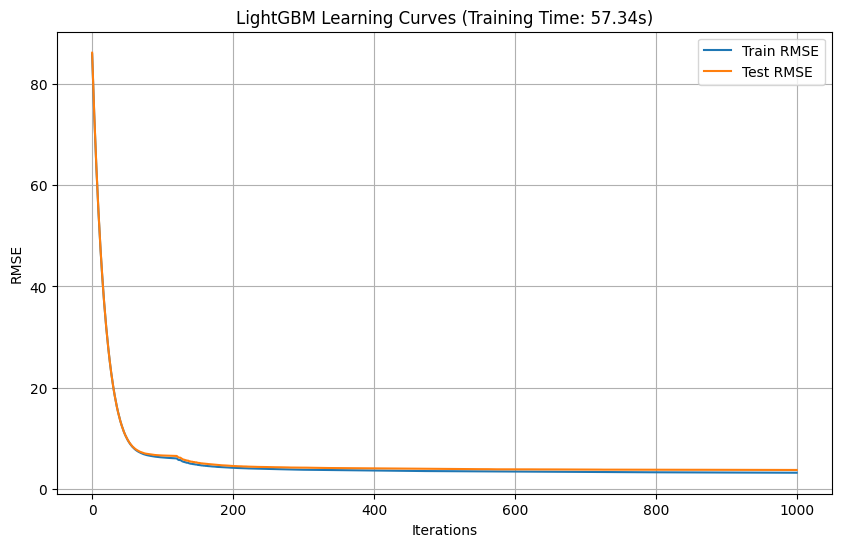

P_price Model RMSE: 3.813886523229015
P_price Model MAE: 0.36209356113543034
P_price Model MSE: 14.545730412067902


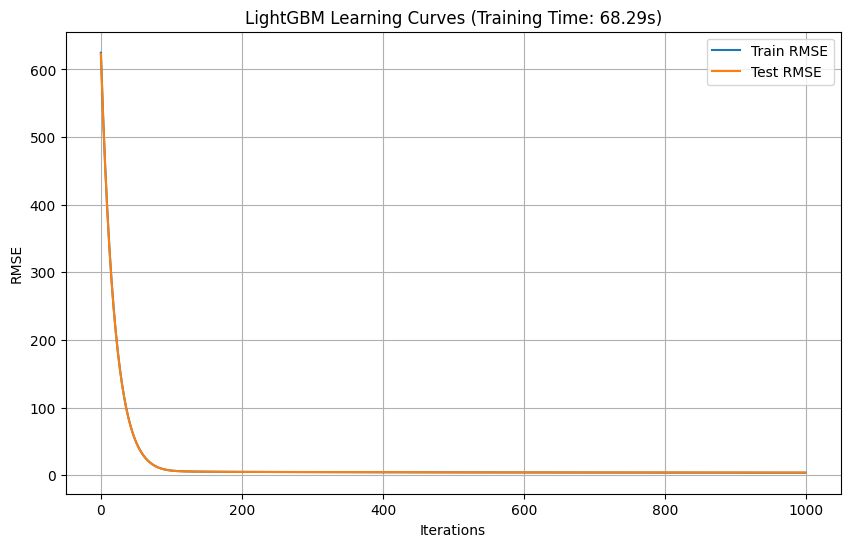

C_price Model RMSE: 3.9203672923880273
C_price Model MAE: 1.8147145728718415
C_price Model MSE: 15.369279707225832
   QUOTE_DATE EXPIRE_DATE  DTE  UNDERLYING_LAST  STRIKE  P_BID  P_ASK  \
77 2023-01-04  2023-01-04    0          3853.39  3855.0    5.1    6.7   
78 2023-01-04  2023-01-04    0          3853.39  3860.0    4.0    9.5   
79 2023-01-04  2023-01-04    0          3853.39  3865.0   10.5   14.5   
80 2023-01-04  2023-01-04    0          3853.39  3870.0   19.1   21.8   
81 2023-01-04  2023-01-04    0          3853.39  3875.0   24.3   26.7   

       P_IV  C_BID  C_ASK     C_IV  P_price  C_price     rf  Log-Strike  \
77  0.00257    0.0   0.05  0.31948     5.90    0.025  0.042    0.000418   
78  0.00260    0.0   0.05  0.31912     6.75    0.025  0.042    0.001714   
79  0.00267    0.0   0.05  0.31939    12.50    0.025  0.042    0.003008   
80  0.00259    0.0   0.05  0.32008    20.45    0.025  0.042    0.004301   
81  0.00247    0.0   0.05  0.31959    25.50    0.025  0.042    0.005592

QUOTE_DATE EXPIRE_DATE   DTE  UNDERLYING_LAST  STRIKE  P_BID  P_ASK  \
77      2023-01-04  2023-01-04     0          3853.39  3855.0    5.1    6.7   
78      2023-01-04  2023-01-04     0          3853.39  3860.0    4.0    9.5   
79      2023-01-04  2023-01-04     0          3853.39  3865.0   10.5   14.5   
80      2023-01-04  2023-01-04     0          3853.39  3870.0   19.1   21.8   
81      2023-01-04  2023-01-04     0          3853.39  3875.0   24.3   26.7   
...            ...         ...   ...              ...     ...    ...    ...   
1452982 2023-09-29  2028-12-15  1904          4286.60  4500.0  462.1  516.5   
1452983 2023-09-29  2028-12-15  1904          4286.60  4600.0  492.5  546.8   
1452984 2023-09-29  2028-12-15  1904          4286.60  4700.0  524.0  578.2   
1452985 2023-09-29  2028-12-15  1904          4286.60  4800.0  556.3  610.6   
1452986 2023-09-29  2028-12-15  1904          4286.60  4900.0  593.8  664.1   

            P_IV  C_BID    C_ASK     C_IV  P_price   C_price        rf  \
77       0.00257    0.0     0.05  0.31948     5.90     0.025  0.042000   
78       0.00260    0.0     0.05  0.31912     6.75     0.025  0.042000   
79       0.00267    0.0     0.05  0.31939    12.50     0.025  0.042000   
80       0.00259    0.0     0.05  0.32008    20.45     0.025  0.042000   
81       0.00247    0.0     0.05  0.31959    25.50     0.025  0.042000   
...          ...    ...      ...      ...      ...       ...       ...   
1452982  0.17520  926.2  1106.10  0.20640   489.30  1016.150  0.045752   
1452983  0.16741  877.9  1057.60  0.20384   519.65   967.750  0.045752   
1452984  0.15786  722.7  1073.10  0.19426   551.10   897.900  0.045752   
1452985  0.14588  676.3  1026.50  0.19183   583.45   851.400  0.045752   
1452986  0.13165  631.0   980.90  0.18876   628.95   805.950  0.045752   

         Log-Strike     div  Predicted_P_price  Predicted_C_price  
77         0.000418  0.0171           6.066436           0.736406  
78         0.001714  0.0171           7.089657           0.171566  
79         0.003008  0.0171          11.651915           0.171566  
80         0.004301  0.0171          20.816677           0.171566  
81         0.005592  0.0171          25.077071           0.171566  
...             ...     ...                ...                ...  
1452982    0.048584  0.0156         492.645129        1026.760861  
1452983    0.070562  0.0156         518.966103         969.075442  
1452984    0.092069  0.0156         539.556970         905.411266  
1452985    0.113122  0.0156         591.608851         823.139693  
1452986    0.133741  0.0156         632.797653         775.028053  

[1114843 rows x 18 columns]

In [ ]:
model_trainer = ModelTrainer(df2)
model_trainer.run()

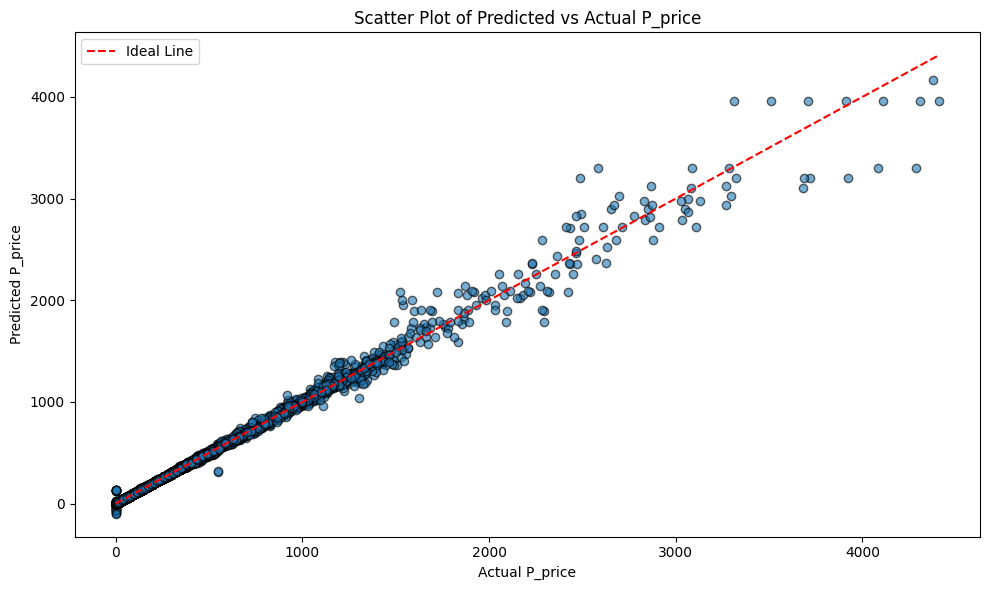

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df2["P_price"], df2["Predicted_P_price"], alpha=0.6, edgecolor='k')

max_value = max(df2["P_price"].max(), df2["Predicted_P_price"].max())
plt.plot([0, max_value], [0, max_value], color="red", linestyle="--", label="Ideal Line")

plt.xlabel("Actual P_price")
plt.ylabel("Predicted P_price")
plt.title("Scatter Plot of Predicted vs Actual P_price")
plt.legend()

plt.tight_layout()
plt.show()

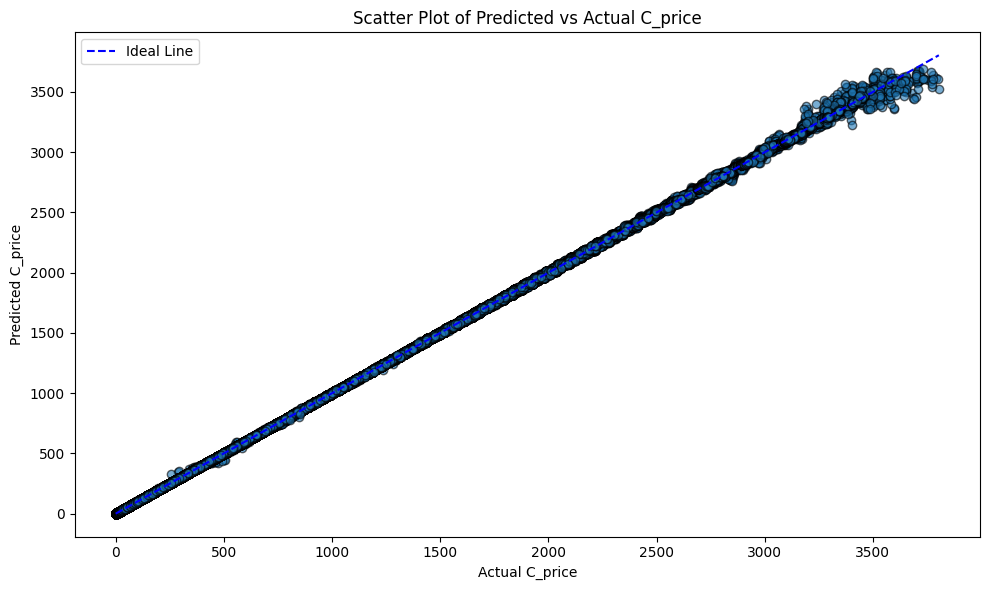

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df2["C_price"], df2["Predicted_C_price"], alpha=0.6, edgecolor='k')

max_value_c = max(df2["C_price"].max(), df2["Predicted_C_price"].max())
plt.plot([0, max_value_c], [0, max_value_c], color="blue", linestyle="--", label="Ideal Line")

plt.xlabel("Actual C_price")
plt.ylabel("Predicted C_price")
plt.title("Scatter Plot of Predicted vs Actual C_price")
plt.legend()

plt.tight_layout()
plt.show()

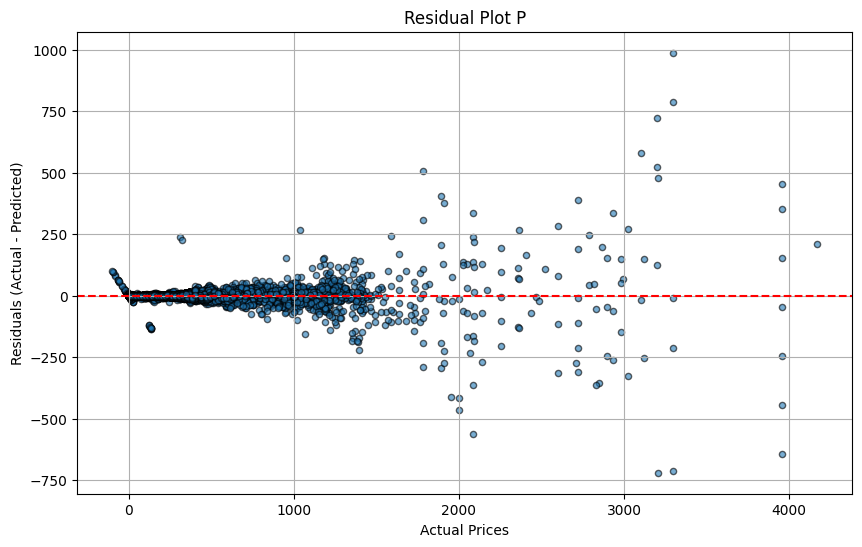

In [ ]:
residuals = df2["P_price"] - df2["Predicted_P_price"]

plt.figure(figsize=(10, 6))
plt.scatter(df2["Predicted_P_price"], residuals, alpha=0.6, edgecolor='k', s=20)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot P')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

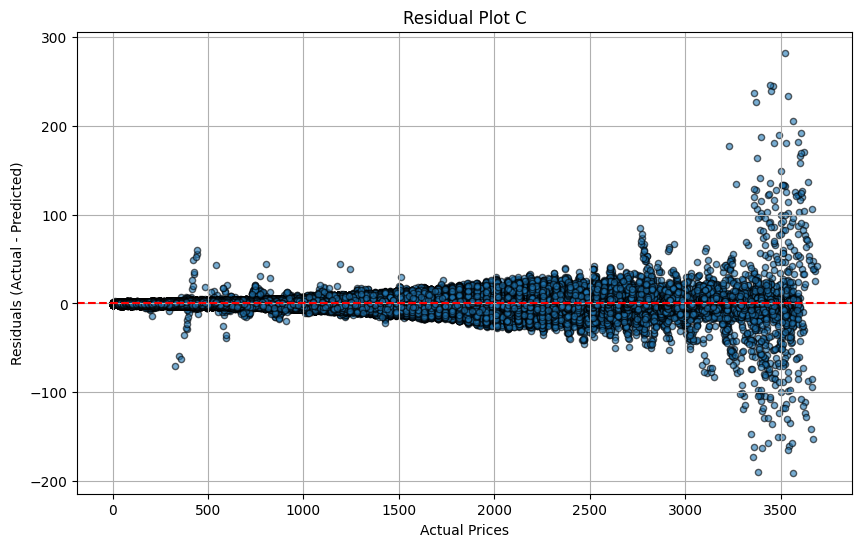

In [ ]:
residuals = df2["C_price"] - df2["Predicted_C_price"]

plt.figure(figsize=(10, 6))
plt.scatter(df2["Predicted_C_price"], residuals, alpha=0.6, edgecolor='k', s=20)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot C')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [ ]:
sampled_df2 = df2.sample(n=90000, random_state=42)

# Display the first few rows of the sampled dataframe
sampled_df2.head()
sampled_df2

sampled_df2.to_csv('sampled_data.csv', index=False)

# Provide a download link for the CSV file
from google.colab import files
files.download('sampled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

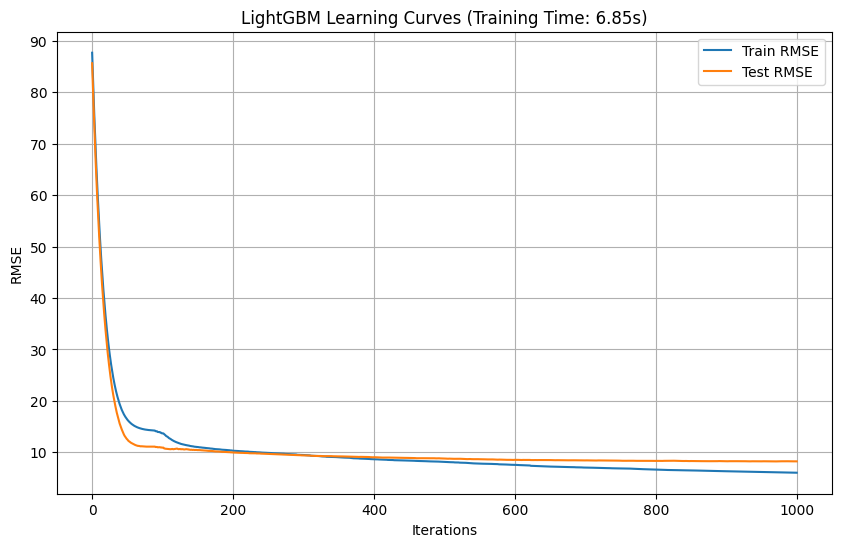

P_price Model RMSE: 8.229443966453234
P_price Model MAE: 0.6032170983452642
P_price Model MSE: 67.72374799699354


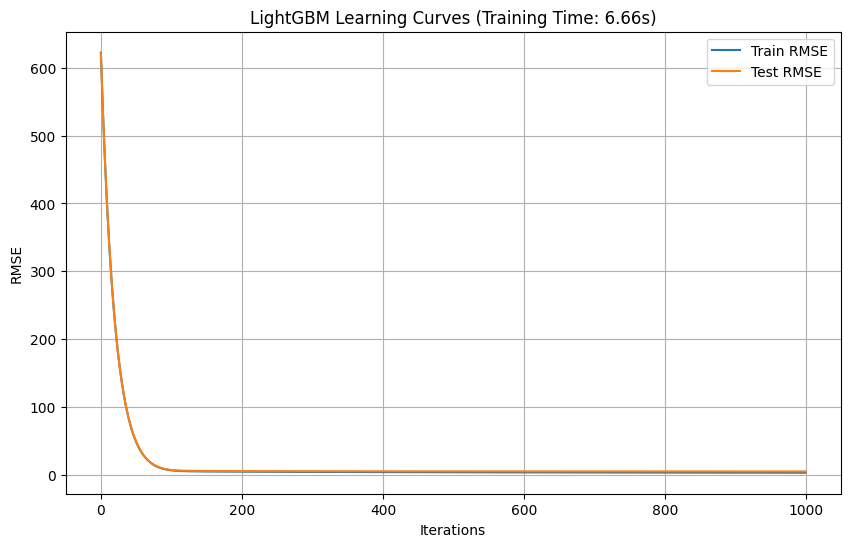

C_price Model RMSE: 5.004892908726313
C_price Model MAE: 2.07494348297777
C_price Model MSE: 25.048953027818932
        QUOTE_DATE EXPIRE_DATE  DTE  UNDERLYING_LAST  STRIKE  P_BID  P_ASK  \
1262593 2023-08-29  2023-09-11   13          4497.70  4275.0   2.65   2.75   
1451296 2023-09-29  2024-03-28  181          4286.60  2200.0   4.30   4.60   
716359  2023-05-19  2023-06-26   38          4191.97  4025.0  28.40  28.80   
29148   2023-01-09  2023-12-15  340          3892.52  1750.0   9.40   9.90   
792750  2023-06-05  2024-01-19  228          4274.80  3250.0  30.70  31.50   

            P_IV   C_BID   C_ASK     C_IV  P_price  C_price        rf  \
1262593  0.16282   228.8   231.2  0.00056     2.70   230.00  0.055400   
1451296  0.44266  2122.2  2132.0  0.00000     4.45  2127.10  0.055296   
716359   0.17070   209.3   219.2  0.19416    28.60   214.25  0.055267   
29148    0.43737  2165.4  2183.9 -0.00038     9.65  2174.65  0.047075   
792750   0.27581  1122.0  1139.6  0.26871    31.10  11

QUOTE_DATE EXPIRE_DATE  DTE  UNDERLYING_LAST  STRIKE   P_BID   P_ASK  \
1262593 2023-08-29  2023-09-11   13          4497.70  4275.0    2.65    2.75   
1451296 2023-09-29  2024-03-28  181          4286.60  2200.0    4.30    4.60   
716359  2023-05-19  2023-06-26   38          4191.97  4025.0   28.40   28.80   
29148   2023-01-09  2023-12-15  340          3892.52  1750.0    9.40    9.90   
792750  2023-06-05  2024-01-19  228          4274.80  3250.0   30.70   31.50   
...            ...         ...  ...              ...     ...     ...     ...   
973470  2023-07-10  2023-10-31  113          4410.22  2700.0    3.50    3.70   
408699  2023-03-22  2023-04-14   23          3936.17  3855.0   45.80   46.40   
950979  2023-07-05  2024-02-16  226          4446.65  2875.0   12.20   12.50   
149982  2023-02-01  2023-12-29  331          4119.88  4375.0  325.70  330.20   
737396  2023-05-24  2023-06-20   27          4115.13  2400.0    0.20    0.30   

            P_IV   C_BID   C_ASK     C_IV  P_price  C_price        rf  \
1262593  0.16282   228.8   231.2  0.00056     2.70   230.00  0.055400   
1451296  0.44266  2122.2  2132.0  0.00000     4.45  2127.10  0.055296   
716359   0.17070   209.3   219.2  0.19416    28.60   214.25  0.055267   
29148    0.43737  2165.4  2183.9 -0.00038     9.65  2174.65  0.047075   
792750   0.27581  1122.0  1139.6  0.26871    31.10  1130.80  0.053838   
...          ...     ...     ...      ...      ...      ...       ...   
973470   0.40854  1740.9  1743.4 -0.00015     3.60  1742.15  0.055183   
408699   0.21352   146.4   152.0  0.24188    46.10   149.20  0.041600   
950979   0.32542  1647.1  1652.8  0.26843    12.35  1649.95  0.054898   
149982   0.15613   199.2   211.6  0.16090   327.95   205.40  0.046827   
737396   0.66514  1715.4  1723.3 -0.00013     0.25  1719.35  0.057300   

         Log-Strike     div  Predicted_P_price  Predicted_C_price  
1262593   -0.050782  0.0153           2.658494         230.023779  
1451296   -0.667037  0.0156           4.677669        2120.029356  
716359    -0.040646  0.0166          28.644802         215.797133  
29148     -0.799441  0.0171           9.687622        2177.121343  
792750    -0.274082  0.0165          30.792828        1133.155878  
...             ...     ...                ...                ...  
973470    -0.490673  0.0158           3.601812        1742.696570  
408699    -0.020837  0.0166          46.028310         148.341176  
950979    -0.436098  0.0158          12.261760        1652.276837  
149982     0.060082  0.0170         325.439921         207.073735  
737396    -0.539202  0.0166           0.268022        1723.010510  

[90000 rows x 18 columns]

In [ ]:
model_trainer = ModelTrainer(sampled_df2)
model_trainer.run()

# Random Forest

In [ ]:
!pip install pandas pyarrow
!pip install QuantLib
!pip install joblib

In [ ]:
import pandas as pd
import QuantLib as ql
from joblib import Parallel, delayed
from scipy.optimize import minimize

In [ ]:
from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# 指定文件路径
file_path1 = "/content/drive/My Drive/heston_data_with_call.csv"
file_path2 = "/content/drive/My Drive/heston_data_with_put.csv"

# 读取文件
data_1 = pd.read_csv(file_path1)
data_2 = pd.read_csv(file_path2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 转换 maturity_days 为年数 (T)
data_1['T'] = data_1['maturity_days'] / 365

# 将 option_type 转换为数值类型（call = 1, put = 0）
data_1['option_type'] = data_1['option_type'].map({'call': 1, 'put': 0})

# 特征和目标变量选择
features = ['v0', 'kappa', 'theta', 'sigma', 'rho', 'spot_price', 'strike_price',
            'T', 'risk_free_rate', 'dividend_rate', 'option_type']
target = 'price'

# 构建特征矩阵 X 和目标变量 y
X = data_1[features]
y = data_1[target]

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 转换 maturity_days 为年数 (T)
data_2['T'] = data_2['maturity_days'] / 365

# 将 option_type 转换为数值类型（call = 1, put = 0）
data_2['option_type'] = data_2['option_type'].map({'call': 1, 'put': 0})

# 特征和目标变量选择
features = ['v0', 'kappa', 'theta', 'sigma', 'rho', 'spot_price', 'strike_price',
            'T', 'risk_free_rate', 'dividend_rate', 'option_type']
target = 'price'

# 构建特征矩阵 X 和目标变量 y
X_2 = data_2[features]
y_2 = data_2[target]

# 数据集划分为训练集和测试集
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

0        546.300765
1        433.585003
2        518.532642
3        472.737615
4        504.707067
            ...    
89662    919.195766
89663    917.186472
89664    913.914460
89665    927.576116
89666    938.841272
Name: price, Length: 89667, dtype: float64

In [ ]:
# 初始化随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"测试集均方误差 (MSE): {mse:.4f}")


测试集均方误差 (MSE): 4.7602


In [ ]:
# 初始化随机森林模型
rf_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_2.fit(X_train_2, y_train_2)

# 在测试集上进行预测
y_pred_2 = rf_2.predict(X_test_2)

# 计算均方误差
mse = mean_squared_error(y_test_2, y_pred_2)
print(f"测试集均方误差 (MSE): {mse:.4f}")


测试集均方误差 (MSE): 5.1622


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

y_pred_1 = rf_best_1.predict(X_scaled)
y_pred_2 = rf_best_2.predict(X_scaled_2)

# 将预测结果添加到原始数据
data_1['Model_1_Price'] = y_pred_1
data_2['Model_2_Price'] = y_pred_2



In [ ]:
data_1

v0     kappa     theta     sigma       rho  spot_price  \
0      0.057661  6.184583  0.740555  0.058352 -0.466662     3853.39   
1      0.057661  6.184583  0.740555  0.058352 -0.466662     3853.39   
2      0.057661  6.184583  0.740555  0.058352 -0.466662     3853.39   
3      0.057661  6.184583  0.740555  0.058352 -0.466662     3853.39   
4      0.057661  6.184583  0.740555  0.058352 -0.466662     3853.39   
...         ...       ...       ...       ...       ...         ...   
89662  0.218019  8.983300  0.411973  0.887771 -0.624828     4516.02   
89663  0.218019  8.983300  0.411973  0.887771 -0.624828     4516.02   
89664  0.218019  8.983300  0.411973  0.887771 -0.624828     4516.02   
89665  0.218019  8.983300  0.411973  0.887771 -0.624828     4516.02   
89666  0.218019  8.983300  0.411973  0.887771 -0.624828     4516.02   

       strike_price  maturity_days  risk_free_rate  dividend_rate       price  \
0       3517.857962             63        0.042220         0.0171  546.300765   
1       3512.011934             35        0.042220         0.0171  433.585003   
2       3472.435891             49        0.042220         0.0171  518.532642   
3       3535.578929             48        0.042220         0.0171  472.737615   
4       3512.084335             52        0.042220         0.0171  504.707067   
...             ...            ...             ...            ...         ...   
89662   4689.419924            277        0.055113         0.0156  919.195766   
89663   4664.897929            271        0.055113         0.0156  917.186472   
89664   4683.080858            273        0.055113         0.0156  913.914460   
89665   4687.694610            281        0.055113         0.0156  927.576116   
89666   4663.872738            282        0.055113         0.0156  938.841272   

       option_type    month         T  Model_1_Price  
0                1  2023-01  0.172603     546.594980  
1                1  2023-01  0.095890     433.610081  
2                1  2023-01  0.134247     516.855444  
3                1  2023-01  0.131507     472.457965  
4                1  2023-01  0.142466     504.818981  
...            ...      ...       ...            ...  
89662            1  2023-09  0.758904     920.471757  
89663            1  2023-09  0.742466     917.135081  
89664            1  2023-09  0.747945     914.663414  
89665            1  2023-09  0.769863     928.187161  
89666            1  2023-09  0.772603     940.208338  

[89667 rows x 15 columns]

In [ ]:
# 保存合并结果到文件
output_file = 'data2_with_predictions.csv'
data_2.to_csv(output_file, index=False)

print(f"数据已保存至: {output_file}")


数据已保存至: data2_with_predictions.csv


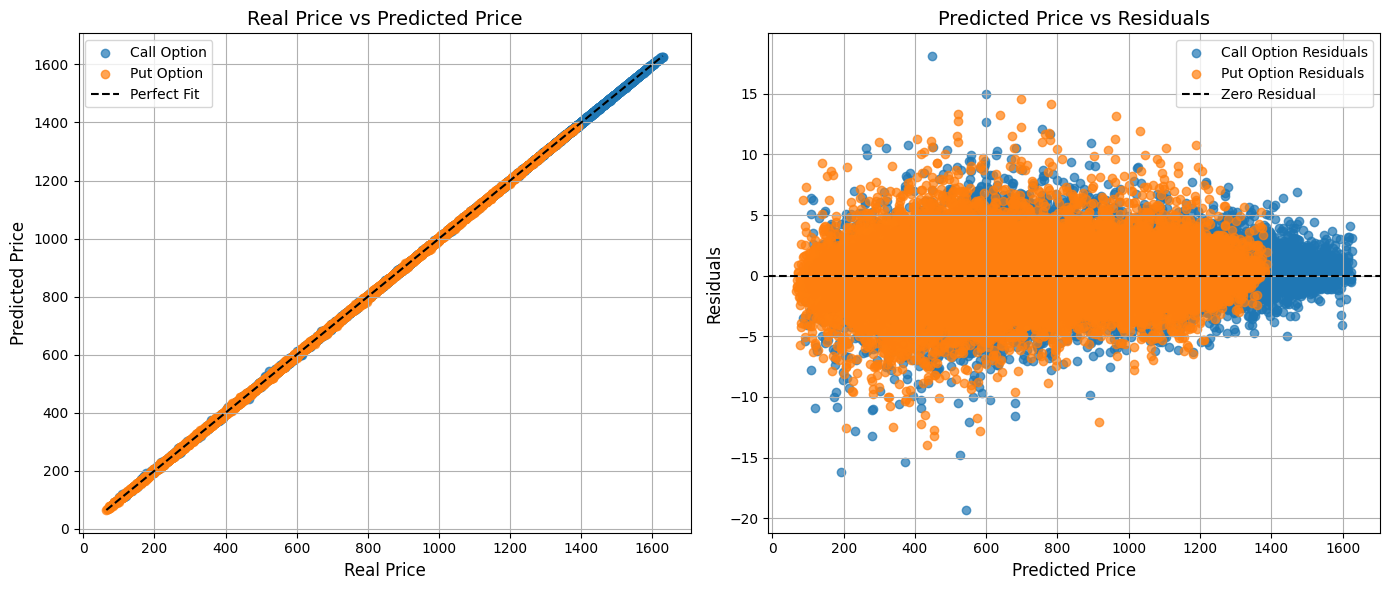

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设以下变量存储了真实价格和预测价格数据
# 请根据实际变量名替换
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_2 = scaler.fit_transform(X_2)


real_price_call = y
predicted_price_call = rf_best_1.predict(X_scaled)
real_price_put = y_2
predicted_price_put = rf_best_2.predict(X_scaled_2)

# 计算残差
residuals_call = real_price_call - predicted_price_call
residuals_put = real_price_put - predicted_price_put

# 绘制真实价格 vs 预测价格的散点图
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(real_price_call, predicted_price_call, label='Call Option', alpha=0.7)
plt.scatter(real_price_put, predicted_price_put, label='Put Option', alpha=0.7)
plt.plot([min(real_price_call.min(), real_price_put.min()), max(real_price_call.max(), real_price_put.max())],
         [min(real_price_call.min(), real_price_put.min()), max(real_price_call.max(), real_price_put.max())],
         linestyle='--', color='black', label='Perfect Fit')
plt.xlabel('Real Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Real Price vs Predicted Price', fontsize=14)
plt.legend()
plt.grid(True)

# 绘制预测价格 vs 残差的散点图

plt.subplot(1, 2, 2)
plt.scatter(predicted_price_call, residuals_call, label='Call Option Residuals', alpha=0.7)
plt.scatter(predicted_price_put, residuals_put, label='Put Option Residuals', alpha=0.7)
plt.axhline(0, linestyle='--', color='black', label='Zero Residual')
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Predicted Price vs Residuals', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


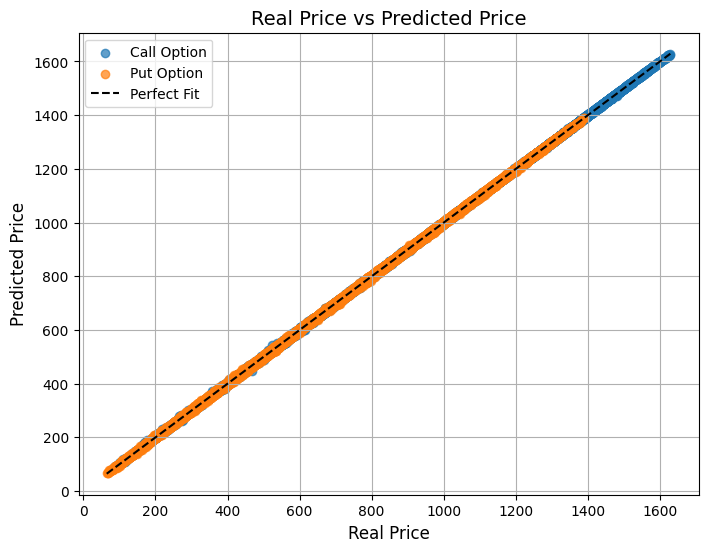

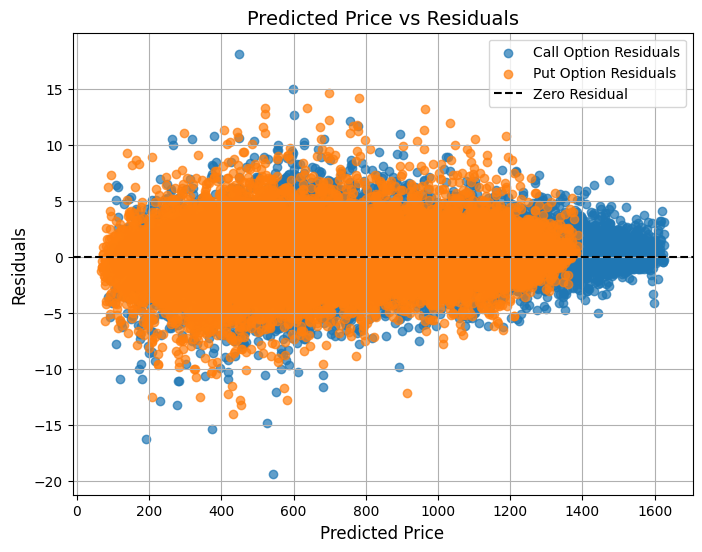

In [ ]:
# 绘制真实价格 vs 预测价格的散点图
plt.figure(figsize=(8, 6))
plt.scatter(real_price_call, predicted_price_call, label='Call Option', alpha=0.7)
plt.scatter(real_price_put, predicted_price_put, label='Put Option', alpha=0.7)
plt.plot([min(real_price_call.min(), real_price_put.min()), max(real_price_call.max(), real_price_put.max())],
         [min(real_price_call.min(), real_price_put.min()), max(real_price_call.max(), real_price_put.max())],
         linestyle='--', color='black', label='Perfect Fit')
plt.xlabel('Real Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Real Price vs Predicted Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 绘制预测价格 vs 残差的散点图
plt.figure(figsize=(8, 6))
plt.scatter(predicted_price_call, residuals_call, label='Call Option Residuals', alpha=0.7)
plt.scatter(predicted_price_put, residuals_put, label='Put Option Residuals', alpha=0.7)
plt.axhline(0, linestyle='--', color='black', label='Zero Residual')
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Predicted Price vs Residuals', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import time
import numpy as np
from sklearn.metrics import mean_squared_error

# 定义计时变量
start_time = time.time()



# 对每一个样本进行逐个预测
predictions = []
predictions = (rf_best_1.predict(X_scaled))  # 逐个样本进行预测

end_time = time.time()

# 计算平均预测时间
total_time = end_time - start_time
average_time = total_time / len(X)

# 输出结果
print(f"总预测时间: {total_time:.4f} 秒")
print(f"平均每次预测时间: {average_time:.6f} 秒")

# 计算MSE（如果需要）
mse = mean_squared_error(y, predictions)
print(f"均方误差 (MSE): {mse:.4f}")


总预测时间: 4.0239 秒
平均每次预测时间: 0.000045 秒
均方误差 (MSE): 1.5594


In [ ]:
import time
import numpy as np
from sklearn.metrics import mean_squared_error

# 定义计时变量
start_time = time.time()

# 对每一个样本进行逐个预测
predictions_2 = []
predictions_2 = (rf_2.predict(X_scaled_2))  # 逐个样本进行预测

end_time = time.time()

# 计算平均预测时间
total_time = end_time - start_time
average_time = total_time / len(X)

# 输出结果
print(f"总预测时间: {total_time:.4f} 秒")
print(f"平均每次预测时间: {average_time:.6f} 秒")

# 计算MSE（如果需要）
mse = mean_squared_error(y_2, predictions_2)
print(f"均方误差 (MSE): {mse:.4f}")


总预测时间: 1.9051 秒
平均每次预测时间: 0.000021 秒
均方误差 (MSE): 1.8014


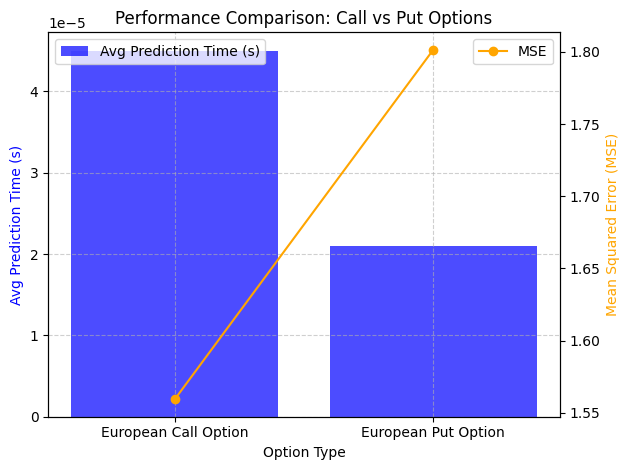

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['European Call Option', 'European Put Option']
avg_time = [0.000045, 0.000021]  # 平均每次预测时间
mse = [1.5594, 1.8014]           # 均方误差 (MSE)

# 创建子图
fig, ax1 = plt.subplots()

# 平均预测时间的柱状图
ax1.bar(categories, avg_time, alpha=0.7, label='Avg Prediction Time (s)', color='blue')
ax1.set_ylabel('Avg Prediction Time (s)', color='blue')
ax1.set_xlabel('Option Type')
ax1.set_title('Performance Comparison: Call vs Put Options')

# 在右侧添加均方误差的折线图
ax2 = ax1.twinx()
ax2.plot(categories, mse, marker='o', label='MSE', color='orange')
ax2.set_ylabel('Mean Squared Error (MSE)', color='orange')

# 添加图例和网格
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 网格搜索
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 用最佳模型预测
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# 重新计算误差
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"优化后测试集均方误差 (MSE): {mse_optimized:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  15.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.5s
[CV] END max_d

In [ ]:
# 初始化随机森林模型
rf_best_1 = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# 训练模型
rf_best_1.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_1 = rf_best_1.predict(X_test)

# 计算均方误差
mse_1 = mean_squared_error(y_test, y_pred_1)
print(f"测试集均方误差 (MSE): {mse_1:.4f}")


测试集均方误差 (MSE): 4.5652


In [ ]:
# 初始化随机森林模型
rf_best_2 = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# 训练模型
rf_best_2.fit(X_train_2, y_train_2)

# 在测试集上进行预测
y_pred_2 = rf_best_2.predict(X_test_2)

# 计算均方误差
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print(f"测试集均方误差 (MSE): {mse_2:.4f}")


测试集均方误差 (MSE): 4.9526


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.2s
[CV] END max_d

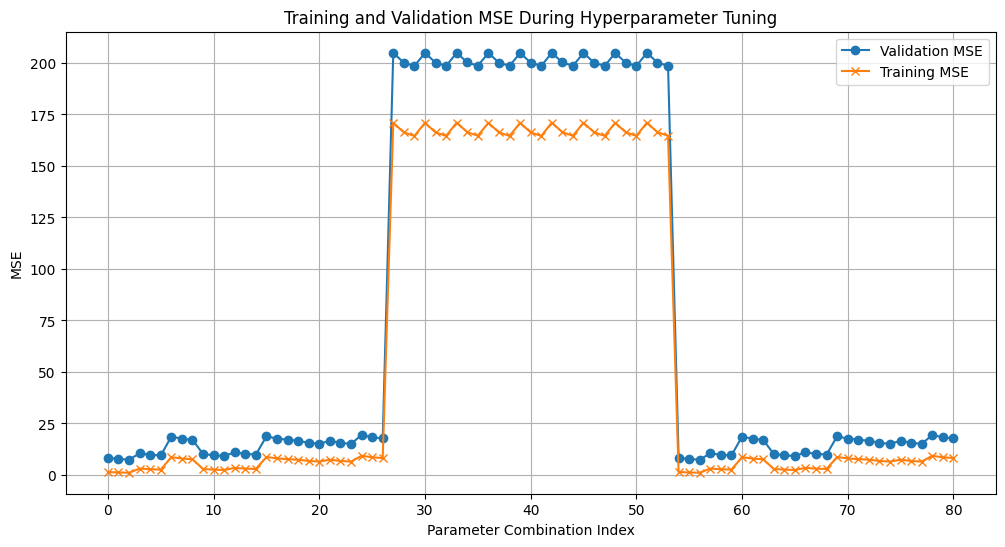

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    return_train_score=True  # 返回训练过程中的分数
)

# 开始训练
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 用最佳模型预测
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# 重新计算误差
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"优化后测试集均方误差 (MSE): {mse_optimized:.4f}")

# 提取训练和验证分数
results = pd.DataFrame(grid_search.cv_results_)

# 计算正的均方误差
results['mean_train_mse'] = -results['mean_train_score']
results['mean_test_mse'] = -results['mean_test_score']

# 显示训练和验证过程中的 MSE
print(results[['params', 'mean_train_mse', 'mean_test_mse']])

# 可视化
import matplotlib.pyplot as plt

# 绘制验证误差随参数变化的趋势
plt.figure(figsize=(12, 6))
plt.plot(results['mean_test_mse'], label='Validation MSE', marker='o')
plt.plot(results['mean_train_mse'], label='Training MSE', marker='x')
plt.xlabel('Parameter Combination Index')
plt.ylabel('MSE')
plt.title('Training and Validation MSE During Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 初始化随机森林
n_estimators_list = np.arange(1, 201, 10)  # 树的数量
mse_values = []

# 记录不同树数量的 MSE
for n_estimators in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-')
plt.title("MSE vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.grid()
plt.show()


NameError: name 'plt' is not defined

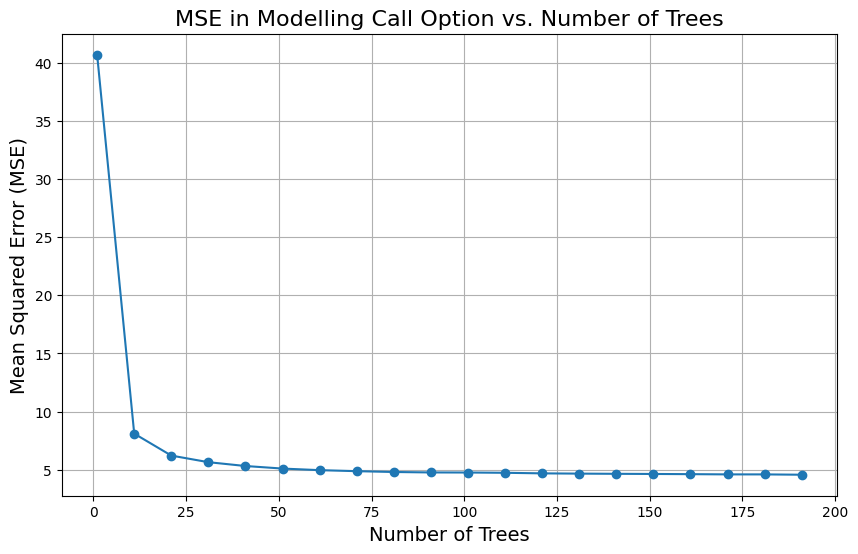

In [ ]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-')
plt.title("MSE in Modelling Call Option vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 网格搜索
grid_search_2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search_2.fit(X_train_2, y_train_2)

# 输出最佳参数
print("最佳参数: ", grid_search_2.best_params_)

# 用最佳模型预测
best_rf_2 = grid_search_2.best_estimator_
y_pred_optimized_2 = best_rf_2.predict(X_test_2)

# 重新计算误差
mse_optimized_2 = mean_squared_error(y_test_2, y_pred_optimized_2)
print(f"优化后测试集均方误差 (MSE): {mse_optimized_2:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.5s
[CV] END max_d

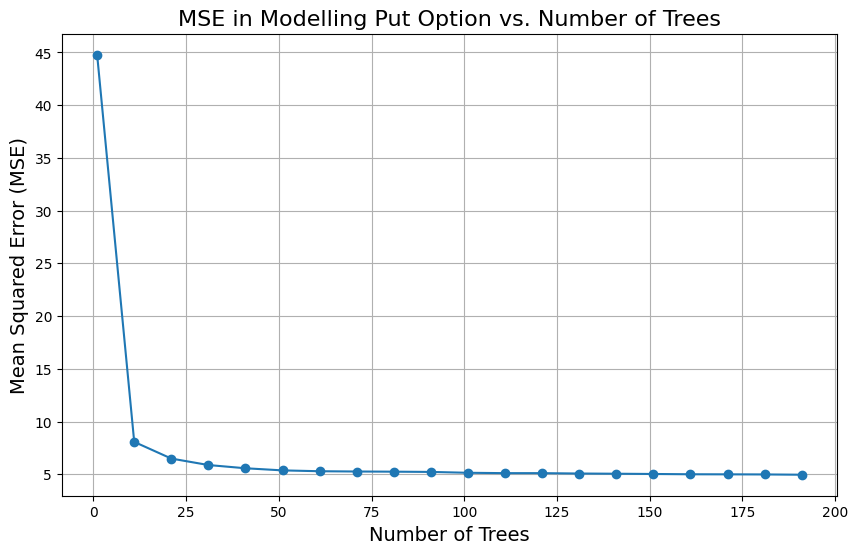

In [ ]:
# 初始化随机森林
n_estimators_list = np.arange(1, 201, 10)  # 树的数量
mse_values_2 = []

# 记录不同树数量的 MSE
for n_estimators in n_estimators_list:
    rf_2 = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_2.fit(X_train_2, y_train_2)
    y_pred_2 = rf_2.predict(X_test_2)
    mse_2 = mean_squared_error(y_test_2, y_pred_2)
    mse_values_2.append(mse_2)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values_2, marker='o', linestyle='-')
plt.title("MSE in Modelling Put Option vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.grid()
plt.show()


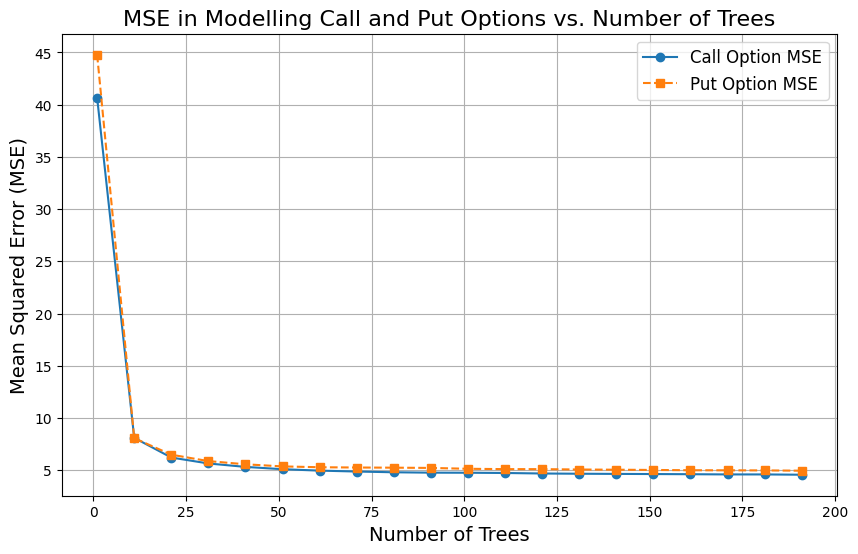

In [ ]:
import matplotlib.pyplot as plt

# 假设 n_estimators_list 是树的数量列表
# mse_values 是 Call 期权的 MSE，mse_values_2 是 Put 期权的 MSE

# 生成绘图
plt.figure(figsize=(10, 6))

# 绘制 Call 期权的 MSE 曲线
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-', label='Call Option MSE')

# 绘制 Put 期权的 MSE 曲线
plt.plot(n_estimators_list, mse_values_2, marker='s', linestyle='--', label='Put Option MSE')

# 设置图例
plt.legend(fontsize=12)

# 设置标题和坐标轴标签
plt.title("MSE in Modelling Call and Put Options vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)

# 网格和展示
plt.grid()
plt.show()


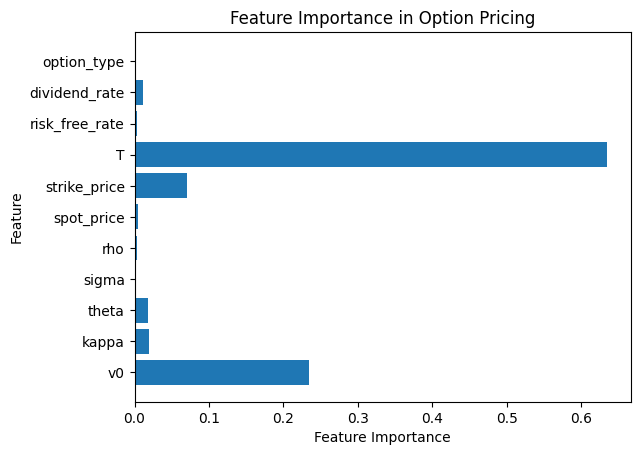

In [ ]:
import matplotlib.pyplot as plt

# 提取特征重要性
feature_importances = best_rf.feature_importances_
features = X.columns

# 可视化特征重要性
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Option Pricing")
plt.show()


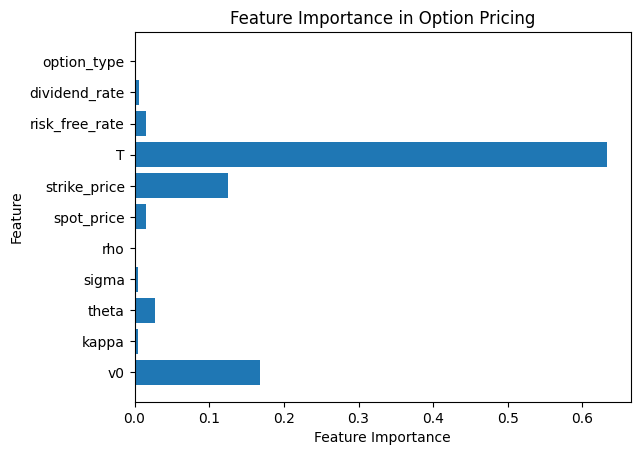

In [ ]:
import matplotlib.pyplot as plt

# 提取特征重要性
feature_importances = best_rf_2.feature_importances_
features = X_2.columns

# 可视化特征重要性
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Option Pricing")
plt.show()


In [ ]:
# 新数据示例
new_data = pd.DataFrame({
    'v0': [0.05],
    'kappa': [6.0],
    'theta': [0.7],
    'sigma': [0.4],
    'rho': [-0.5],
    'spot_price': [3900],
    'strike_price': [4000],
    'T': [30 / 365],
    'risk_free_rate': [0.04],
    'dividend_rate': [0.02],
    'option_type': [1]  # 看涨期权
})

# 标准化新数据
new_data_scaled = scaler.transform(new_data)

# 预测价格
predicted_price = best_rf.predict(new_data_scaled)
print(f"预测的期权价格: {predicted_price[0]:.2f}")


预测的期权价格: 228.72


In [ ]:
import time

# 新数据示例
new_data = pd.DataFrame({
    'v0': [0.05],
    'kappa': [6.0],
    'theta': [0.7],
    'sigma': [0.4],
    'rho': [-0.5],
    'spot_price': [3900],
    'strike_price': [4000],
    'T': [30 / 365],
    'risk_free_rate': [0.04],
    'dividend_rate': [0.02],
    'option_type': [1]  # 看涨期权
})

# 标准化新数据
new_data_scaled = scaler.transform(new_data)

# 开始计时
start_time = time.time()

# 预测价格
predicted_price = best_rf.predict(new_data_scaled)

# 结束计时
end_time = time.time()

# 打印结果
print(f"预测的期权价格: {predicted_price[0]:.2f}")
print(f"预测所用时间: {end_time - start_time:.6f} 秒")


NameError: name 'best_rf' is not defined

In [ ]:
# 新数据示例
new_data = pd.DataFrame({
    'v0': [0.05],
    'kappa': [6.0],
    'theta': [0.7],
    'sigma': [0.4],
    'rho': [-0.5],
    'spot_price': [3900],
    'strike_price': [3000],
    'T': [30 / 365],
    'risk_free_rate': [0.04],
    'dividend_rate': [0.02],
    'option_type': [0]  # 看跌期权
})

# 标准化新数据
new_data_scaled = scaler.transform(new_data)

# 预测价格
predicted_price = best_rf_2.predict(new_data_scaled)
print(f"预测的期权价格: {predicted_price[0]:.2f}")


预测的期权价格: 66.63


In [ ]:
# 查看数据结构
print(data.head())

# 提取需要的字段
S0 = data["UNDERLYING_LAST"].values[0]  # 当前标的资产价格
r = data["rf"].values[0]  # 无风险利率
q = data["div"].values[0]  # 股息收益率

# 筛选有效数据
market_prices = data["C_price"].values  # 市场欧式看涨期权价格
strikes = data["STRIKE"].values  # 执行价格
maturities = data["DTE"].values / 365  # 到期时间（以年为单位）

# 只选取非零价格和有效期限的数据
valid_indices = (market_prices > 0) & (maturities > 0)
market_prices = market_prices[valid_indices]
strikes = strikes[valid_indices]
maturities = maturities[valid_indices]

# 检查处理后的数据
print(f"有效市场价格数量: {len(market_prices)}")


   QUOTE_DATE EXPIRE_DATE  DTE  UNDERLYING_LAST  STRIKE  P_BID  P_ASK  \
0  2023-01-04  2023-01-04  0.0          3853.39  1000.0    0.0   0.05   
1  2023-01-04  2023-01-04  0.0          3853.39  1200.0    0.0   0.05   
2  2023-01-04  2023-01-04  0.0          3853.39  1400.0    0.0   0.05   
3  2023-01-04  2023-01-04  0.0          3853.39  1600.0    0.0   0.05   
4  2023-01-04  2023-01-04  0.0          3853.39  1800.0    0.0   0.05   

      P_IV   C_BID   C_ASK  C_IV  P_price  C_price     rf  Log-Strike     div  
0  8.17536  2846.8  2848.3   NaN    0.025  2847.55  0.042   -1.348953  0.0171  
1  7.06724  2646.8  2648.3   NaN    0.025  2647.55  0.042   -1.166632  0.0171  
2  6.13893  2427.6  2471.0   NaN    0.025  2449.30  0.042   -1.012481  0.0171  
3  5.33125  2246.8  2248.3   NaN    0.025  2247.55  0.042   -0.878950  0.0171  
4  4.61644  2046.8  2048.3   NaN    0.025  2047.55  0.042   -0.761167  0.0171  
有效市场价格数量: 1419592


In [ ]:
# 定义单次计算的函数
def compute_error(i, params, strikes, maturities, market_prices, S0, r, q):
    v0, theta, kappa, sigma, rho = params
    K = strikes[i]
    T = maturities[i]
    market_price = market_prices[i]

    # 定义 Heston 过程
    heston_process = ql.HestonProcess(
        ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), r, ql.Actual365Fixed())),
        ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), q, ql.Actual365Fixed())),
        ql.QuoteHandle(ql.SimpleQuote(S0)),
        v0, kappa, theta, sigma, rho
    )
    heston_model = ql.HestonModel(heston_process)
    heston_engine = ql.AnalyticHestonEngine(heston_model)

    # 定义欧式期权
    option = ql.VanillaOption(
        ql.PlainVanillaPayoff(ql.Option.Call, K),
        ql.EuropeanExercise(ql.Date().todaysDate() + int(T * 365))
    )
    option.setPricingEngine(heston_engine)

    # 计算理论价格
    model_price = option.NPV()

    # 返回单项误差平方
    return (market_price - model_price) ** 2

# 并行化误差函数
def calibration_loss(params, market_prices, strikes, maturities, S0, r, q):
    errors = Parallel(n_jobs=-1)(  # 使用所有可用的 CPU 核心
        delayed(compute_error)(i, params, strikes, maturities, market_prices, S0, r, q)
        for i in range(len(market_prices))
    )
    return sum(errors)



In [ ]:
# 取一小部分数据用于测试
subset_size = 1000  # 设置较小的规模
market_prices = market_prices[:subset_size]
strikes = strikes[:subset_size]
maturities = maturities[:subset_size]

# 初始参数
initial_params = [0.05, 0.2, 1.0, 0.3, -0.5]  # v0, theta, kappa, sigma, rho

def callback_function(xk):
    print("当前参数:", xk)

# 优化器设置
result = minimize(
    calibration_loss,
    initial_params,
    args=(market_prices, strikes, maturities, S0, r, q),
    method="L-BFGS-B",
    bounds=[(0.01, 1), (0.01, 1), (0.01, 3), (0.01, 1), (-0.99, 0.99)],
    options={"maxiter": 200, "ftol": 1e-4},  # 容忍误差设置为 1e-4
    callback=callback_function
)

# 输出结果
calibrated_params = result.x
print("校准后的 Heston 参数:", calibrated_params)


当前参数: [ 0.04380662  0.17058146  0.84671391  0.40838411 -0.26929669]
当前参数: [ 0.04273216  0.16677312  0.82682316  0.42245033 -0.23936371]
当前参数: [ 0.04270135  0.17303095  0.85924754  0.39952983 -0.2881849 ]
当前参数: [ 0.0418127   0.21296083  1.06577573  0.25356452 -0.59914766]
当前参数: [ 0.0410332   0.24737812  1.2400983   0.13080342 -0.86143801]
当前参数: [ 0.04084218  0.29539468  1.26914101  0.1494851  -0.90024301]
当前参数: [ 0.03810866  0.56781343  1.55810515  0.14525598 -0.99      ]
当前参数: [ 0.03778587  0.53010631  1.49255411  0.16846199 -0.99      ]
当前参数: [ 0.03470019  0.66205734  1.56487865  0.22628925 -0.99      ]
当前参数: [ 0.03053833  0.85801814  1.77388492  0.22209512 -0.99      ]
当前参数: [ 0.02911246  0.89371868  1.84515587  0.19156132 -0.99      ]
当前参数: [ 0.02876543  0.89739351  1.86682127  0.17563474 -0.99      ]
当前参数: [ 0.02866225  0.90329949  1.87068003  0.17767677 -0.99      ]
校准后的 Heston 参数: [ 0.02866225  0.90329949  1.87068003  0.17767677 -0.99      ]


In [ ]:
import numpy as np

# 校准后的 Heston 参数
v0, theta, kappa, sigma, rho = calibrated_params

# 市场参数
S0 = 100  # 标的资产初始价格
r = 0.03  # 无风险利率
q = 0.01  # 股息收益率

# 生成范围
strike_prices = np.linspace(80, 120, 100)  # 执行价格范围
maturities = np.linspace(0.25, 2, 100)  # 到期时间范围

# 保存结果
generated_data = []


In [ ]:
print("theta = %.4f, kappa = %.4f, sigma = %.4f, rho = %.4f, vO = %.4f" % (theta, kappa, sigma, rho, v0))

theta = 0.9033, kappa = 1.8707, sigma = 0.1777, rho = -0.9900, vO = 0.0287


In [ ]:
# 设置 Heston 模型
heston_process = ql.HestonProcess(
    ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), r, ql.Actual365Fixed())),
    ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), q, ql.Actual365Fixed())),
    ql.QuoteHandle(ql.SimpleQuote(S0)),
    v0, kappa, theta, sigma, rho
)
heston_model = ql.HestonModel(heston_process)
heston_engine = ql.AnalyticHestonEngine(heston_model, 64)

# 生成期权价格
for K in strike_prices:
    for T in maturities:
        # 定义欧式期权
        option = ql.VanillaOption(
            ql.PlainVanillaPayoff(ql.Option.Call, K),
            ql.EuropeanExercise(ql.Date().todaysDate() + int(T * 365))
        )
        option.setPricingEngine(heston_engine)

        # 计算价格
        price = option.NPV()

        # 保存数据
        generated_data.append({
            "S0": S0,
            "K": K,
            "T": T,
            "Price": price,
            "v0": v0,
            "theta": theta,
            "kappa": kappa,
            "sigma": sigma,
            "rho": rho
        })

# 转换为 DataFrame
df_generated = pd.DataFrame(generated_data)

# 查看生成的数据
print(df_generated.head())

# 保存为 CSV 文件
# df_generated.to_csv("generated_heston_data.csv", index=False)


    S0     K         T      Price        v0     theta    kappa     sigma   rho
0  100  80.0  0.250000  22.109928  0.028662  0.903299  1.87068  0.177677 -0.99
1  100  80.0  0.267677  22.411357  0.028662  0.903299  1.87068  0.177677 -0.99
2  100  80.0  0.285354  22.774386  0.028662  0.903299  1.87068  0.177677 -0.99
3  100  80.0  0.303030  23.093467  0.028662  0.903299  1.87068  0.177677 -0.99
4  100  80.0  0.320707  23.473070  0.028662  0.903299  1.87068  0.177677 -0.99


In [ ]:
df_generated

S0      K         T      Price        v0     theta    kappa     sigma  \
0     100   80.0  0.250000  22.109928  0.028662  0.903299  1.87068  0.177677   
1     100   80.0  0.267677  22.411357  0.028662  0.903299  1.87068  0.177677   
2     100   80.0  0.285354  22.774386  0.028662  0.903299  1.87068  0.177677   
3     100   80.0  0.303030  23.093467  0.028662  0.903299  1.87068  0.177677   
4     100   80.0  0.320707  23.473070  0.028662  0.903299  1.87068  0.177677   
...   ...    ...       ...        ...       ...       ...      ...       ...   
9995  100  120.0  1.929293  37.336221  0.028662  0.903299  1.87068  0.177677   
9996  100  120.0  1.946970  37.560723  0.028662  0.903299  1.87068  0.177677   
9997  100  120.0  1.964646  37.820686  0.028662  0.903299  1.87068  0.177677   
9998  100  120.0  1.982323  38.041855  0.028662  0.903299  1.87068  0.177677   
9999  100  120.0  2.000000  38.297975  0.028662  0.903299  1.87068  0.177677   

       rho  
0    -0.99  
1    -0.99  
2    -0.99  
3    -0.99  
4    -0.99  
...    ...  
9995 -0.99  
9996 -0.99  
9997 -0.99  
9998 -0.99  
9999 -0.99  

[10000 rows x 9 columns]

In [ ]:
from scipy.optimize import brentq

def calculate_implied_volatility(price, option_type, S0, strike, r, q, maturity):
    """
    计算隐含波动率 (Implied Volatility)

    参数：
        price: 期权市场价格
        option_type: 'Call' 或 'Put'
        S0: 标的资产当前价格
        strike: 执行价格
        r: 无风险利率
        q: 股息收益率
        maturity: 到期时间 (以年为单位)

    返回：
        隐含波动率 (如果无法求解，则返回 np.nan)
    """
    today = ql.Date().todaysDate()
    expiration_date = today + int(maturity * 365)

    # 设置期权
    option = ql.VanillaOption(
        ql.PlainVanillaPayoff(
            ql.Option.Call if option_type == 'Call' else ql.Option.Put,
            strike
        ),
        ql.EuropeanExercise(expiration_date)
    )

    # 定义目标函数
    def objective_function(sigma):
        bs_process = ql.BlackScholesMertonProcess(
            ql.QuoteHandle(ql.SimpleQuote(S0)),
            ql.YieldTermStructureHandle(ql.FlatForward(today, q, ql.Actual360())),
            ql.YieldTermStructureHandle(ql.FlatForward(today, r, ql.Actual360())),
            ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual360()))
        )
        engine = ql.AnalyticEuropeanEngine(bs_process)
        option.setPricingEngine(engine)
        return option.NPV() - price

    # 使用 scipy 的 brentq 方法求解
    try:
        # 假设波动率在 0% 到 500% 之间
        implied_vol = brentq(objective_function, 1e-8, 5.0, xtol=1e-8)
        return implied_vol
    except ValueError:
        return np.nan  # 如果求解失败，则返回 NaN


In [ ]:
# 计算隐含波动率
df_generated['ImpliedVolatility'] = df_generated.apply(
    lambda row: calculate_implied_volatility(
        row['Price'], 'Call', row['S0'], row['K'], 0.03, 0.01, row['T']
    ),
    axis=1
)

print(df_generated)


       S0      K         T      Price        v0     theta    kappa     sigma  \
0     100   80.0  0.250000  22.109928  0.028662  0.903299  1.87068  0.177677   
1     100   80.0  0.267677  22.411357  0.028662  0.903299  1.87068  0.177677   
2     100   80.0  0.285354  22.774386  0.028662  0.903299  1.87068  0.177677   
3     100   80.0  0.303030  23.093467  0.028662  0.903299  1.87068  0.177677   
4     100   80.0  0.320707  23.473070  0.028662  0.903299  1.87068  0.177677   
...   ...    ...       ...        ...       ...       ...      ...       ...   
9995  100  120.0  1.929293  37.336221  0.028662  0.903299  1.87068  0.177677   
9996  100  120.0  1.946970  37.560723  0.028662  0.903299  1.87068  0.177677   
9997  100  120.0  1.964646  37.820686  0.028662  0.903299  1.87068  0.177677   
9998  100  120.0  1.982323  38.041855  0.028662  0.903299  1.87068  0.177677   
9999  100  120.0  2.000000  38.297975  0.028662  0.903299  1.87068  0.177677   

       rho  ImpliedVolatility  
0    -0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 加载生成的数据
df = df_generated

# 定义特征和目标变量
features = ["S0", "K", "T", "v0", "theta", "kappa", "sigma", "rho", "ImpliedVolatility"]
target = "Price"

X = df[features]
y = df[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# 初始化随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 测试模型
y_pred = rf.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"测试集均方误差 (MSE): {mse}")


测试集均方误差 (MSE): 0.004101124059468845


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

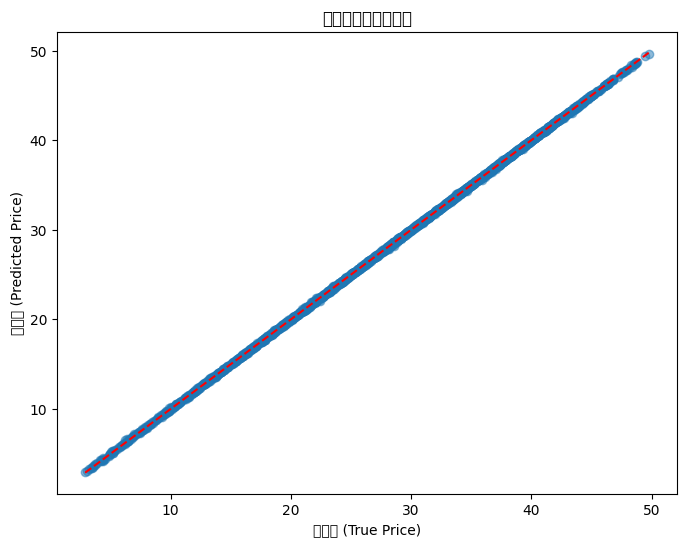

In [ ]:
import matplotlib.pyplot as plt

# 绘制真实值 vs 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("真实值 (True Price)")
plt.ylabel("预测值 (Predicted Price)")
plt.title("真实值与预测值对比")
plt.show()
